In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
df = pd.read_excel('/Users/yolanda/Downloads/excel_file1.xlsx')
df.set_index('year_month', inplace=True)

p = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_3.xlsx')
p.set_index('year_month', inplace=True)
v = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_2.xlsx')
v.set_index('year_month', inplace=True)
w = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_4.xlsx')
w.set_index('year_month', inplace=True)
z = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_5.xlsx')
z.set_index('year_month', inplace=True)

In [3]:
'''
gwls = gwls[gwls.index < '2003-12-01']  
class2 = gwls[['D4N0142']]

  
pima1 = gwls['Discharge']
pima1= pima1.interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())

ax1 = class2.plot(figsize=(20,10), linewidth=1, fontsize = 20, grid=True)
ax2 = pima1.plot(secondary_y=True, legend=True, linewidth=1, marker="o", grid=True, color='blue') #precip_trend

#ax1.set_ylim(-18,8)
ax2.set_ylim(0,2) #(0, 600) for precip_trend and (0,5) for discharge



ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),ncol=12, prop={'size': 16});
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.20),ncol=12, prop={'size': 16});

ax1.set_title('Groundwater levels vs Discharge',fontsize=20) #'Groundwater levels vs precip_trend'
ax1.set_xlabel('Year',fontsize=20)
ax1.set_ylabel('Groundwater level (m)',fontsize=20)
ax2.set_ylabel('Discharge (cumecs)',fontsize=20) #Discharge #precip_trend (mm)
'''

'\ngwls = gwls[gwls.index < \'2003-12-01\']  \nclass2 = gwls[[\'D4N0142\']]\n\n  \npima1 = gwls[\'Discharge\']\npima1= pima1.interpolate(limit_direction=\'both\', method=\'time\').mask(pima.bfill().isna())\n\nax1 = class2.plot(figsize=(20,10), linewidth=1, fontsize = 20, grid=True)\nax2 = pima1.plot(secondary_y=True, legend=True, linewidth=1, marker="o", grid=True, color=\'blue\') #precip_trend\n\n#ax1.set_ylim(-18,8)\nax2.set_ylim(0,2) #(0, 600) for precip_trend and (0,5) for discharge\n\n\n\nax1.legend(loc=\'upper center\', bbox_to_anchor=(0.5, -0.12),ncol=12, prop={\'size\': 16});\nax2.legend(loc=\'upper center\', bbox_to_anchor=(0.5, -0.20),ncol=12, prop={\'size\': 16});\n\nax1.set_title(\'Groundwater levels vs Discharge\',fontsize=20) #\'Groundwater levels vs precip_trend\'\nax1.set_xlabel(\'Year\',fontsize=20)\nax1.set_ylabel(\'Groundwater level (m)\',fontsize=20)\nax2.set_ylabel(\'Discharge (cumecs)\',fontsize=20) #Discharge #precip_trend (mm)\n'

In [4]:
#df['Abstraction'] = w['Usage']
df['D4N0140'] = p[' D4N0140']
df['D4N0141'] = p[' D4N0141']
df['D4N0142'] = p[' D4N0142']
df['D4N0139'] = p[' D4N0139']
df['2526CC00029'] = p['2526CC00029']
df['2526CC00255'] = p[' 2526CC00255']

In [5]:
df

Temperature  Precipitation  Discharge  Abstraction  \
year_month                                                       
1950-01-01        23.90           95.9        NaN          NaN   
1950-02-01        25.10           52.8        NaN          NaN   
1950-03-01        23.75           71.4        NaN          NaN   
1950-04-01        19.65           58.6        NaN          NaN   
1950-05-01        14.60           27.7        NaN          NaN   
...                 ...            ...        ...          ...   
2019-08-01          NaN            NaN        NaN          NaN   
2019-09-01          NaN            NaN        NaN          NaN   
2019-10-01          NaN            NaN        NaN          NaN   
2019-11-01          NaN            NaN        NaN          NaN   
2019-12-01          NaN            NaN        NaN          NaN   

            scenario_usage  scenario_precip100  scenario_precip200  \
year_month                                                           
1950-01-01             NaN                95.9                95.9   
1950-02-01             NaN                52.8                52.8   
1950-03-01             NaN                71.4                71.4   
1950-04-01             NaN                58.6                58.6   
1950-05-01             NaN                27.7                27.7   
...                    ...                 ...                 ...   
2019-08-01             0.0                 0.0                 0.0   
2019-09-01             0.0                 0.0                 0.0   
2019-10-01             0.0                 0.0                 0.0   
2019-11-01             0.0                 0.0                 0.0   
2019-12-01             0.0                 0.0                 0.0   

            scenario_preciphalf  precip_trend  trend_scenario100  \
year_month                                                         
1950-01-01                47.95           NaN                NaN   
1950-02-01                26.40           NaN                NaN   
1950-03-01                35.70           NaN                NaN   
1950-04-01                29.30           NaN                NaN   
1950-05-01                13.85           NaN                NaN   
...                         ...           ...                ...   
2019-08-01                 0.00           NaN                NaN   
2019-09-01                 0.00           NaN                NaN   
2019-10-01                 0.00           NaN                NaN   
2019-11-01                 0.00           NaN                NaN   
2019-12-01                 0.00           NaN                NaN   

            trend_scenario200  trend_scenariohalf  D4N0140  D4N0141  D4N0142  \
year_month                                                                     
1950-01-01                NaN                 NaN      NaN      NaN      NaN   
1950-02-01                NaN                 NaN      NaN      NaN      NaN   
1950-03-01                NaN                 NaN      NaN      NaN      NaN   
1950-04-01                NaN                 NaN      NaN      NaN      NaN   
1950-05-01                NaN                 NaN      NaN      NaN      NaN   
...                       ...                 ...      ...      ...      ...   
2019-08-01                NaN                 NaN      NaN      NaN      NaN   
2019-09-01                NaN                 NaN      NaN      NaN      NaN   
2019-10-01                NaN                 NaN      NaN      NaN      NaN   
2019-11-01                NaN                 NaN      NaN      NaN      NaN   
2019-12-01                NaN                 NaN      NaN      NaN      NaN   

            D4N0139  2526CC00029  2526CC00255  
year_month                                     
1950-01-01      NaN          NaN          NaN  
1950-02-01      NaN          NaN          NaN  
1950-03-01      NaN          NaN          NaN  
1950-04-01      NaN          NaN          NaN  
1950-05-01      NaN         

In [6]:
df = df[['D4N0139', 'D4N0140' ,'D4N0141' ,'D4N0142','2526CC00029','2526CC00255','Temperature' ,'precip_trend' ,'Discharge' ,'Abstraction']]

In [7]:
df

D4N0139  D4N0140  D4N0141  D4N0142  2526CC00029  2526CC00255  \
year_month                                                                 
1950-01-01      NaN      NaN      NaN      NaN          NaN          NaN   
1950-02-01      NaN      NaN      NaN      NaN          NaN          NaN   
1950-03-01      NaN      NaN      NaN      NaN          NaN          NaN   
1950-04-01      NaN      NaN      NaN      NaN          NaN          NaN   
1950-05-01      NaN      NaN      NaN      NaN          NaN          NaN   
...             ...      ...      ...      ...          ...          ...   
2019-08-01      NaN      NaN      NaN      NaN          NaN          NaN   
2019-09-01      NaN      NaN      NaN      NaN          NaN          NaN   
2019-10-01      NaN      NaN      NaN      NaN          NaN          NaN   
2019-11-01      NaN      NaN      NaN      NaN          NaN          NaN   
2019-12-01      NaN      NaN      NaN      NaN          NaN          NaN   

            Temperature  precip_trend  Discharge  Abstraction  
year_month                                                     
1950-01-01        23.90           NaN        NaN          NaN  
1950-02-01        25.10           NaN        NaN          NaN  
1950-03-01        23.75           NaN        NaN          NaN  
1950-04-01        19.65           NaN        NaN          NaN  
1950-05-01        14.60           NaN        NaN          NaN  
...                 ...           ...        ...          ...  
2019-08-01          NaN           NaN        NaN          NaN  
2019-09-01          NaN           NaN        NaN          NaN  
2019-10-01          NaN           NaN        NaN          NaN  
2019-11-01          NaN           NaN        NaN          NaN  
2019-12-01          NaN           NaN        NaN          NaN  

[840 rows x 10 columns]

In [8]:
f = lambda x: -x; 
gwls = df[['D4N0139', 'D4N0140' ,'D4N0141' ,'D4N0142','2526CC00029','2526CC00255']].apply(f, axis=1)

#### checking when each varibale starts and ends 

In [9]:
result_dict = {}
def check_date(column):
    x = column.notnull()
    print(type(column[x]))
    result_dict[column.name] = [column[x].head(1).index[0], 
    column[x].tail(1).index[0]]
    
gwls.apply(check_date)
dates = pd.DataFrame(result_dict)
dates

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


D4N0139    D4N0140    D4N0141    D4N0142 2526CC00029 2526CC00255
0 1977-02-01 1977-01-01 1977-01-01 1977-01-01  1976-01-01  1977-02-01
1 2019-02-01 2017-09-01 2014-05-01 2017-08-01  2017-09-01  2014-09-01

#### Limiting period based on minimum start of all 6 bh's and maximum finish of all 6 bh's

In [10]:

gwls = gwls[gwls.index > '1977-02-01']  
gwls = gwls[gwls.index < '2014-06-01']  

#### These boreholes are the onles with less that 32% missing data. 

Text(0, 0.5, 'Groundwater levels')

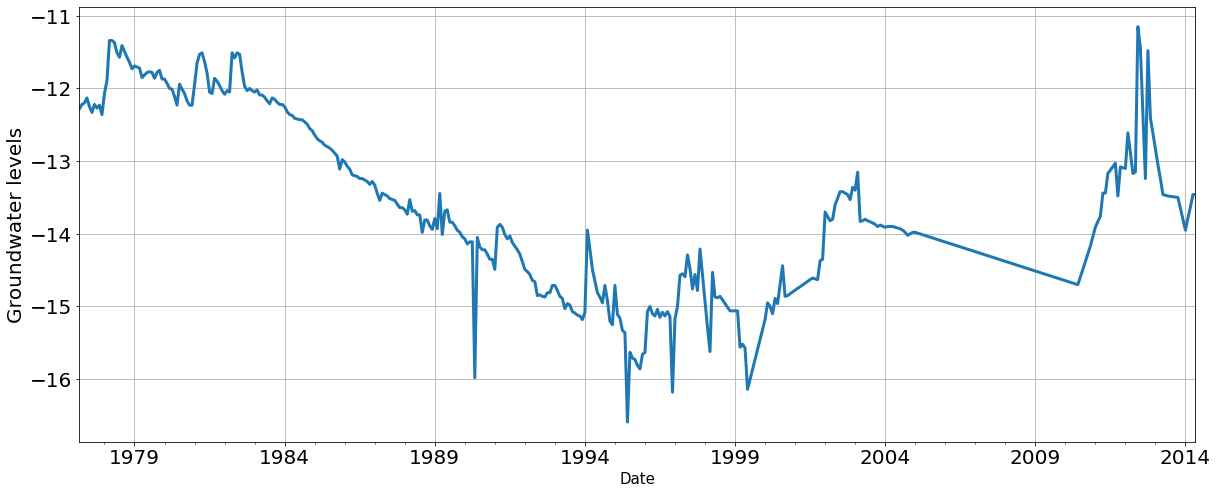

In [11]:
#visual illustration just to show all groundwater levels 

gwls['D4N0141'].plot(figsize=(20,8), linewidth=3, fontsize = 20, grid=True);
plt.xlabel("Date",fontsize=15)
plt.ylabel("Groundwater levels",fontsize=20)


In [12]:
gwls['Temperature'] = df['Temperature']
gwls['precip_trend'] = df['precip_trend']
gwls['Discharge'] = df['Discharge']
gwls['Abstraction'] = df['Abstraction']
gwls

D4N0139    D4N0140    D4N0141    D4N0142  2526CC00029  \
year_month                                                            
1977-03-01 -22.160000 -22.700000 -12.280000 -23.400000       -22.70   
1977-04-01 -22.300000 -22.630000 -12.220000 -23.370000       -22.63   
1977-05-01 -22.410000 -22.690000 -12.200000 -23.320000       -22.69   
1977-06-01 -22.400000 -22.670000 -12.130000 -23.350000       -22.67   
1977-07-01 -22.760000 -22.640000 -12.250000 -23.320000       -22.64   
...               ...        ...        ...        ...          ...   
2014-01-01 -25.810000 -24.140000 -13.950000 -23.278211       -24.14   
2014-02-01 -25.579222 -23.995333 -13.781222 -23.190000          NaN   
2014-03-01 -25.370778 -23.864667 -13.628778 -23.308644          NaN   
2014-04-01 -25.140000 -23.720000 -13.460000 -23.440000       -23.72   
2014-05-01 -25.140000 -23.730000 -13.460000 -23.460000       -23.73   

            2526CC00255  Temperature  precip_trend  Discharge  Abstraction  
year_month                                                                  
1977-03-01   -38.120000        20.70     51.983333        NaN   436477.250  
1977-04-01   -38.160000        19.60     48.604167        NaN   436477.250  
1977-05-01   -38.250000          NaN     48.808333      1.406   436477.250  
1977-06-01   -38.400000        12.75     62.258333      1.207   436477.250  
1977-07-01   -38.340000        12.30     73.212500      1.163   436477.250  
...                 ...          ...           ...        ...          ...  
2014-01-01   -42.083252        22.60     44.291667      0.330  2781128.167  
2014-02-01   -42.300000        21.05     44.283333      0.323  2781128.167  
2014-03-01   -42.118000        19.00     44.341667      0.384  2781128.167  
2014-04-01   -41.916500        15.05     44.183333      0.433  2781128.167  
2014-05-01   -41.721500        13.40     45.483333      0.440  2781128.167  

[447 rows x 10 columns]

### Reframing length of dataset based on bhid D4N0115 start and end dates 

In [13]:
pima = gwls.filter(['D4N0141', 'Temperature', 'precip_trend', 'Discharge', 'Abstraction'])


In [14]:
pima.apply(lambda x: sum(x.isnull()), axis=0)

D4N0141          0
Temperature     12
precip_trend     0
Discharge       65
Abstraction      0
dtype: int64

#### Interpolating independant varibales only 

In [15]:
pima['Discharge']= pima['Discharge'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())
pima['precip_trend']= pima['precip_trend'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())
pima['Temperature']= pima['Temperature'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())

#### Calculating start and end dates for new dataframa

In [16]:
result_dict = {}
def check_date(column):
    x = column.notnull()
    print(type(column[x]))
    result_dict[column.name] = [column[x].head(1).index[0], 
    column[x].tail(1).index[0]]
    
pima.apply(check_date)
dates = pd.DataFrame(result_dict)
dates

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


D4N0141 Temperature precip_trend  Discharge Abstraction
0 1977-03-01  1977-03-01   1977-03-01 1977-03-01  1977-03-01
1 2014-05-01  2014-05-01   2014-05-01 2014-05-01  2014-05-01

### Mutual information stats

In [17]:
from sklearn.feature_selection import mutual_info_regression

In [18]:
X = pima[['Temperature', 'precip_trend', 'Discharge','Abstraction']] # Features
y = pima[['D4N0141']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110' 

In [19]:
mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Temperature     0.043561
precip_trend    0.335043
Discharge       0.473073
Abstraction     1.000000
dtype: float64

## LAG TESTING 

In [20]:
precip1  = pima.filter(['D4N0141', 'precip_trend'])
discha1 = pima.filter(['D4N0141', 'Discharge'])
temp1   = pima.filter(['D4N0141', 'Temperature'])
abstr1   = pima.filter(['D4N0141', 'Abstraction'])

In [21]:
lags = range(1, 24)  # 2year lag

# precip_trend
precip = precip1.assign(**{ '{} (t-{})'.format([ 'precip_trend'], t): precip1[[ 'precip_trend']].shift(t) for t in lags for col in precip1})
# disharge
discha = discha1.assign(**{ '{} (t-{})'.format([ 'Discharge'], t): discha1[[ 'Discharge']].shift(t) for t in lags for col in discha1})
# temperature
temp = temp1.assign(**{ '{} (t-{})'.format([ 'Temperature'], t): temp1[[ 'Temperature']].shift(t) for t in lags for col in temp1})
# abstraction
abstr = abstr1.assign(**{ '{} (t-{})'.format([ 'Abstraction'], t): abstr1[[ 'Abstraction']].shift(t) for t in lags for col in abstr1})

## Cross Correlation

- degree of similarity between two time series in different times or space 
- lag is considred since time is under investigation

### Rainfall

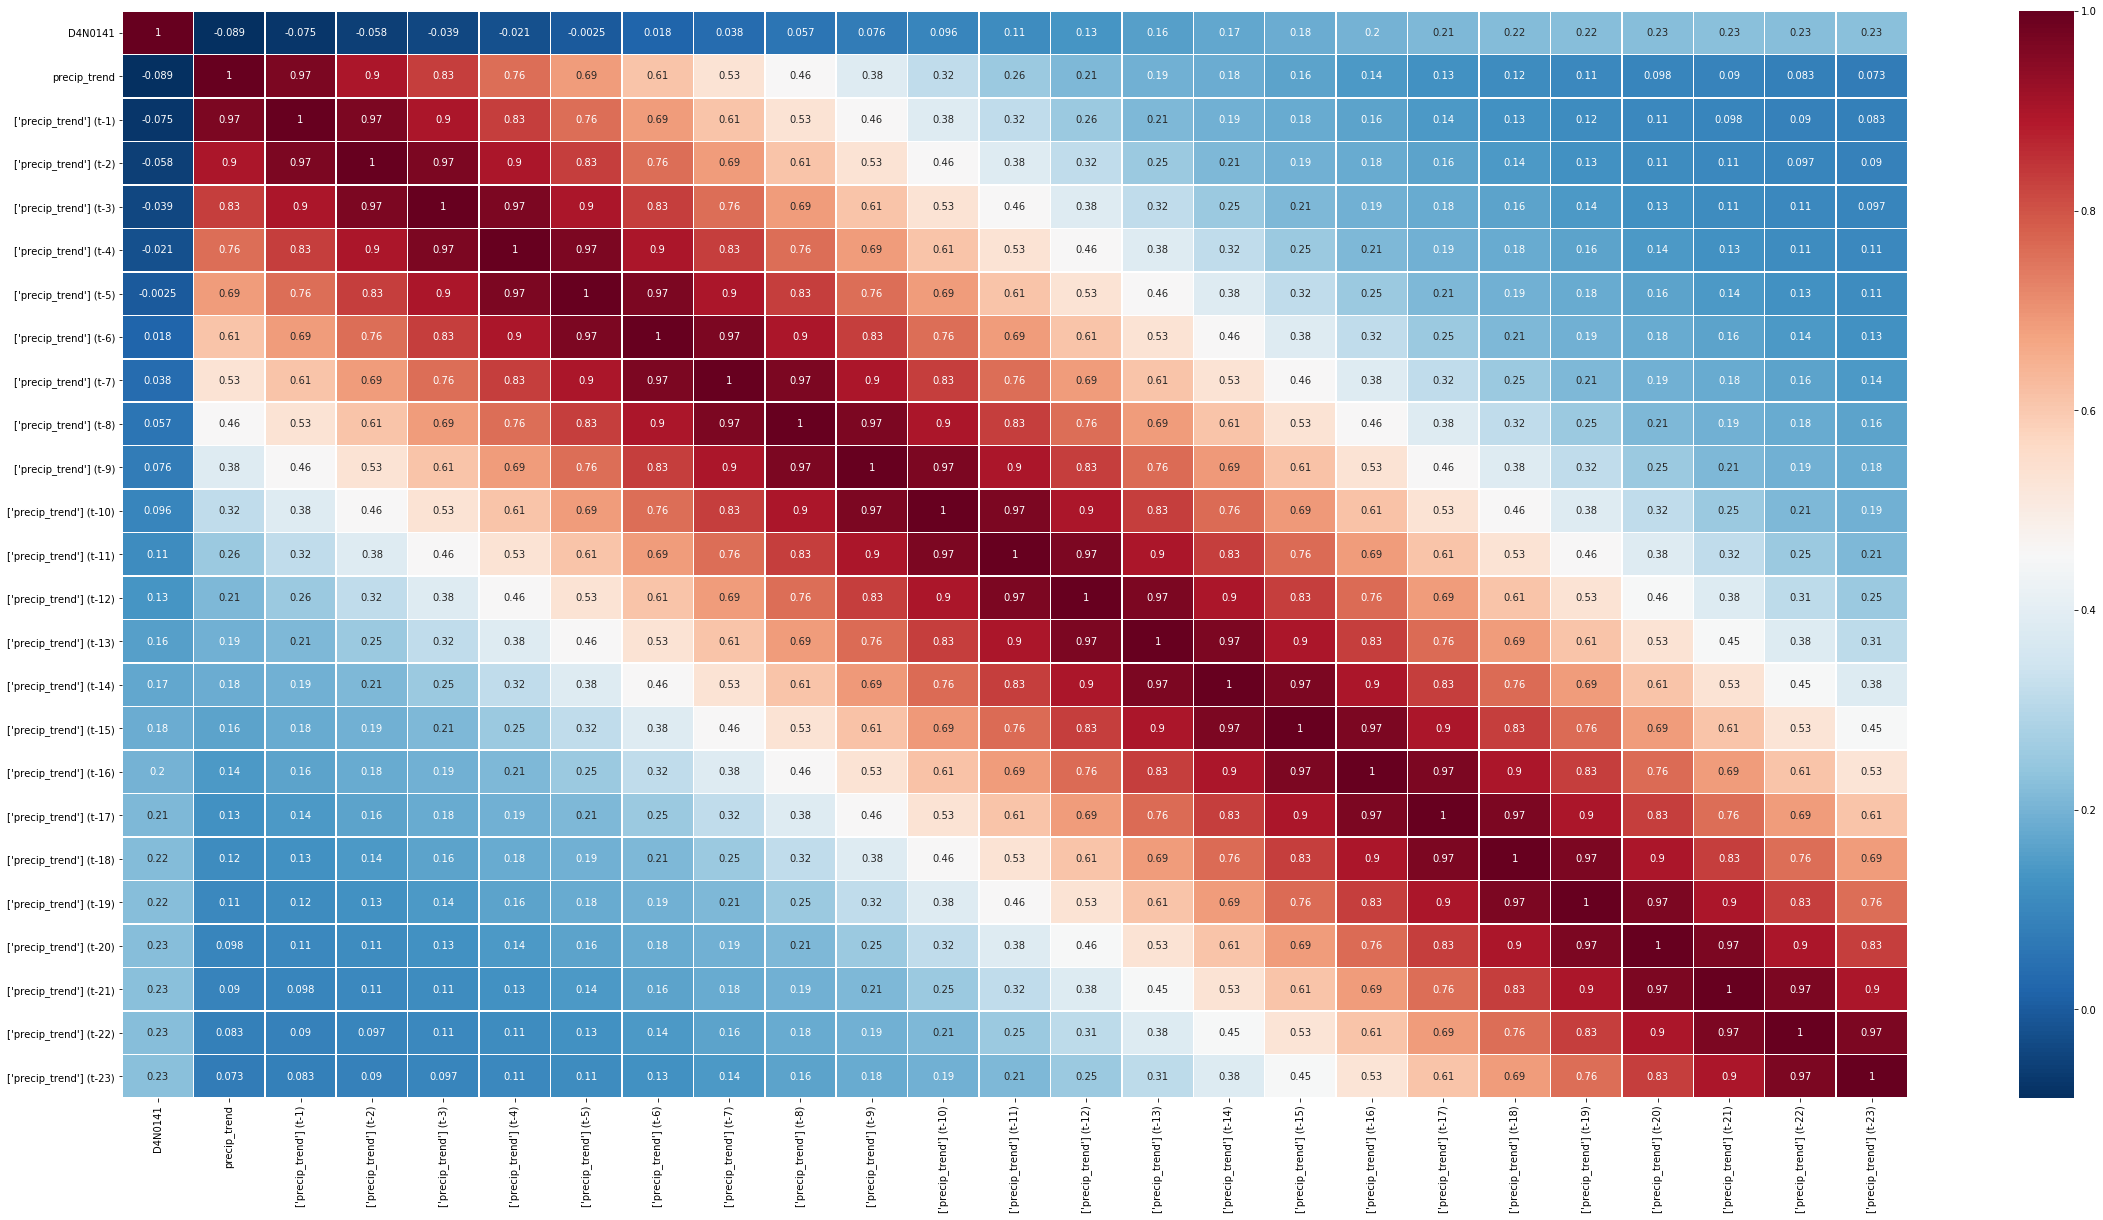

In [22]:
# precip0834 , 0111, 0122 , 0037, 0115, 0110

import seaborn as sns
corrm1 = precip.corr(method = 'spearman')
corrm2 = precip.corr(method = 'pearson')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,20))         # Sample figsize in inches

sns.heatmap(corrm2, 
            xticklabels=corrm2.columns,
            yticklabels=corrm2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
#In our case, the maroon shows very strong correlations. 
#The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

### Temperature

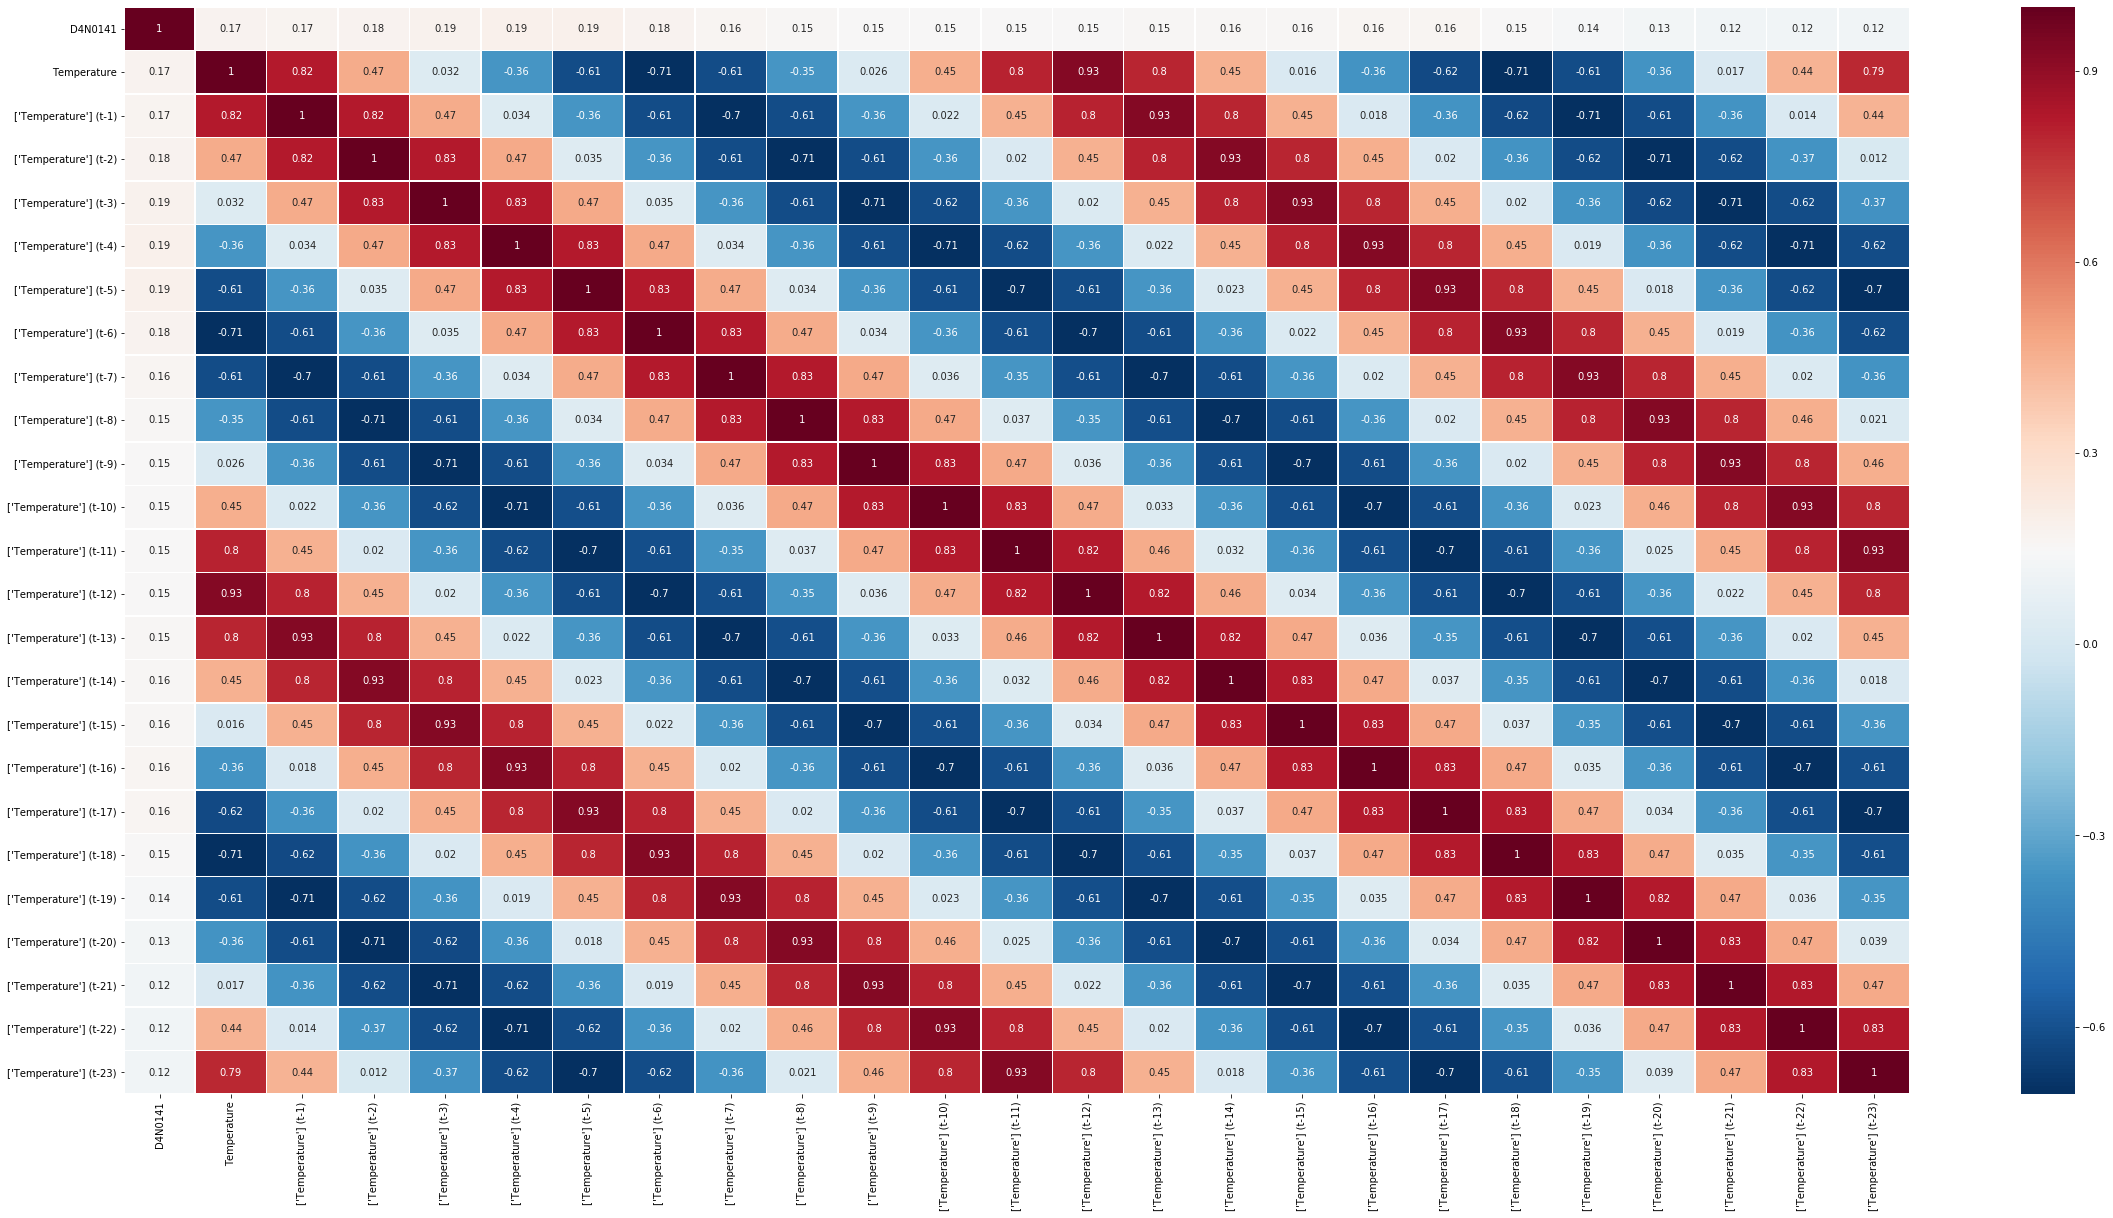

In [23]:
# temp0834 , 0111, 0122 , 0037, 0115, 0110

import seaborn as sns
corrm1 = temp.corr(method = 'spearman')
corrm2 = temp.corr(method = 'pearson')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,20))         # Sample figsize in inches

sns.heatmap(corrm2, 
            xticklabels=corrm2.columns,
            yticklabels=corrm2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
#In our case, the maroon shows very strong correlations. 
#The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

#### Shifting variables based on lag variables 

In [24]:
#pima=pima.drop(['Temperature (t-3)'], axis=1)
#pima=pima.drop(['precip_trend (t-5)'], axis=1)
#pima

In [25]:
pima['Temperature (t-3)'] = pima.Temperature.shift(0)
pima['precip_trend (t-5)'] = pima.precip_trend.shift(0)
#pima = pima['Discharge (t-6)'].drop(axis=1)
pima

D4N0141  Temperature  precip_trend  Discharge  Abstraction  \
year_month                                                                 
1977-03-01 -12.280000    20.700000     51.983333      1.406   436477.250   
1977-04-01 -12.220000    19.600000     48.604167      1.406   436477.250   
1977-05-01 -12.200000    16.231148     48.808333      1.406   436477.250   
1977-06-01 -12.130000    12.750000     62.258333      1.207   436477.250   
1977-07-01 -12.250000    12.300000     73.212500      1.163   436477.250   
...               ...          ...           ...        ...          ...   
2014-01-01 -13.950000    22.600000     44.291667      0.330  2781128.167   
2014-02-01 -13.781222    21.050000     44.283333      0.323  2781128.167   
2014-03-01 -13.628778    19.000000     44.341667      0.384  2781128.167   
2014-04-01 -13.460000    15.050000     44.183333      0.433  2781128.167   
2014-05-01 -13.460000    13.400000     45.483333      0.440  2781128.167   

            Temperature (t-3)  precip_trend (t-5)  
year_month                                         
1977-03-01          20.700000           51.983333  
1977-04-01          19.600000           48.604167  
1977-05-01          16.231148           48.808333  
1977-06-01          12.750000           62.258333  
1977-07-01          12.300000           73.212500  
...                       ...                 ...  
2014-01-01          22.600000           44.291667  
2014-02-01          21.050000           44.283333  
2014-03-01          19.000000           44.341667  
2014-04-01          15.050000           44.183333  
2014-05-01          13.400000           45.483333  

[447 rows x 7 columns]

In [26]:
X = pima[['Temperature (t-3)', 'precip_trend (t-5)', 'Discharge','Abstraction']] # Features
y = pima[['D4N0141']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110' 

In [27]:
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [28]:
mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Temperature (t-3)     0.045130
precip_trend (t-5)    0.333109
Discharge             0.473257
Abstraction           1.000000
dtype: float64

### Auto and Cross corr plots combined 

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [30]:
rainfall = X['precip_trend (t-5)']
temperature = X['Temperature (t-3)']
discharge = X['Discharge']
usage =  X['Abstraction']
bhid =  y['D4N0141']

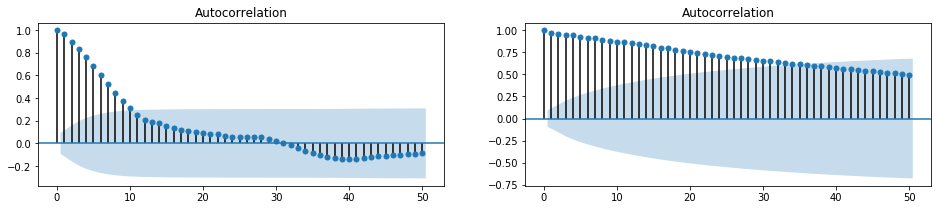

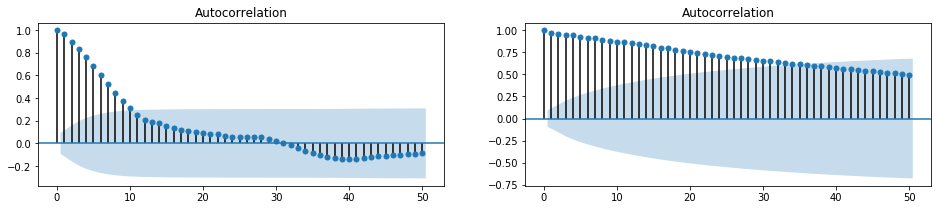

In [31]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(rainfall.tolist(), lags=50, ax=axes[0])
plot_acf(bhid.tolist(), lags=50, ax=axes[1])

Checking if target variable is auto correlated.
Auto-corr (similarity between observations as a function of the lag time)

- plot looks like a sigmoid funtion (hint for seasonality)

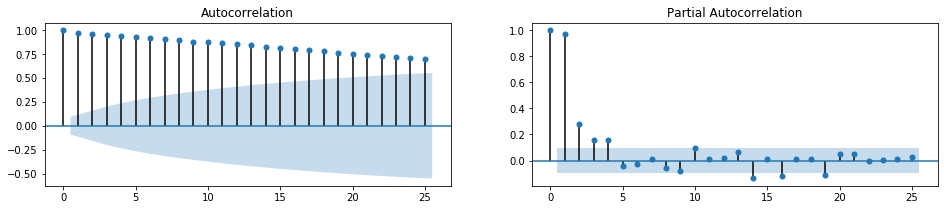

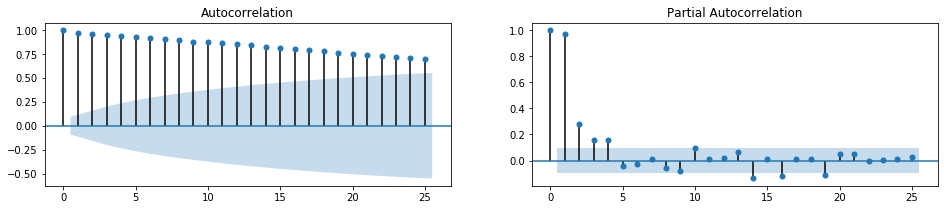

In [32]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(bhid, lags=25, ax=axes[0])
plot_pacf(bhid, lags=25, ax=axes[1])

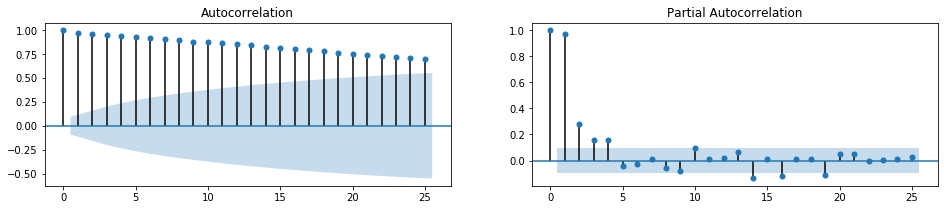

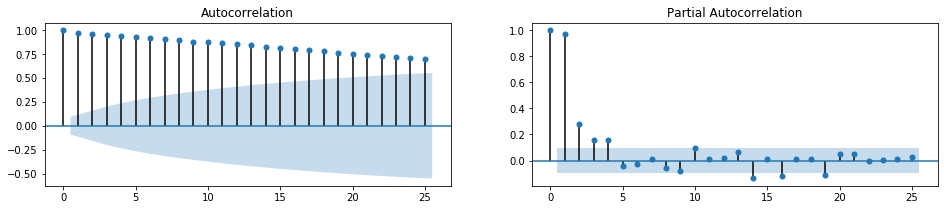

In [33]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(bhid, lags=25, ax=axes[0])
plot_pacf(bhid, lags=25, ax=axes[1])

#### To check whether data is stationary we use Augmented Dickey-Fuller (ADF) Test

For time series modeling, data needs to be stationary — if there is a trend in the data we need to get rid of it. 

#### BHID

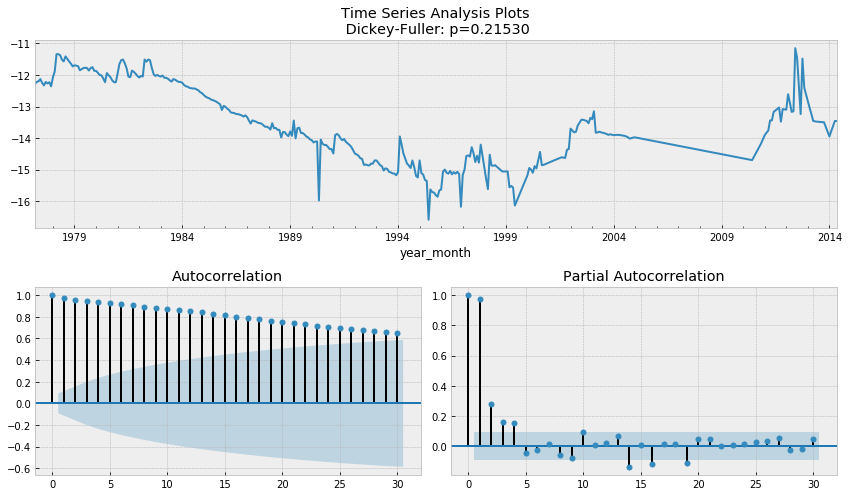

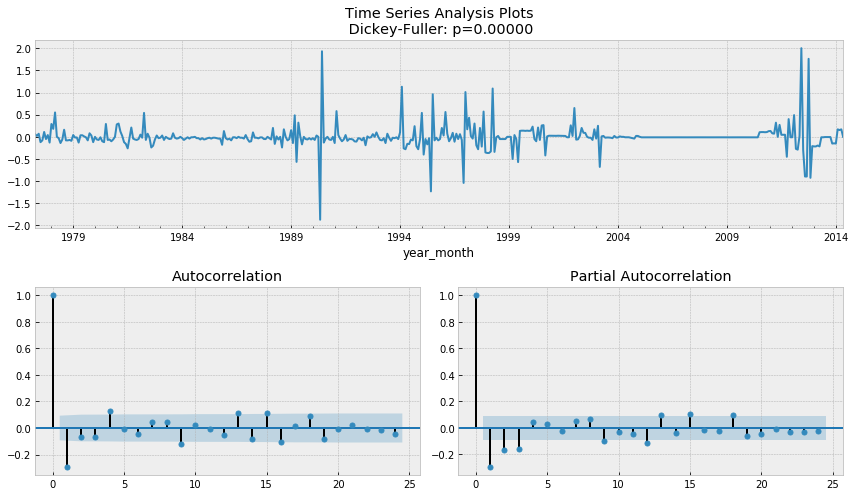

In [34]:
In [2]: import statsmodels.api as sm
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(bhid, lags=30)

# Take the first difference to remove to make the process stationary
D4N0111_diff = bhid - bhid.shift(1)

tsplot(D4N0111_diff[1:], lags=24)

#### Rainfall

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


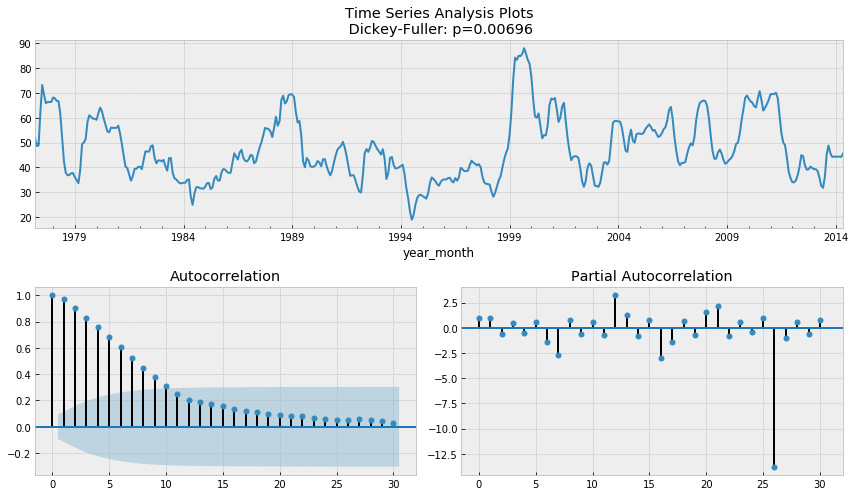

In [35]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(rainfall, lags=30)

#### Temp

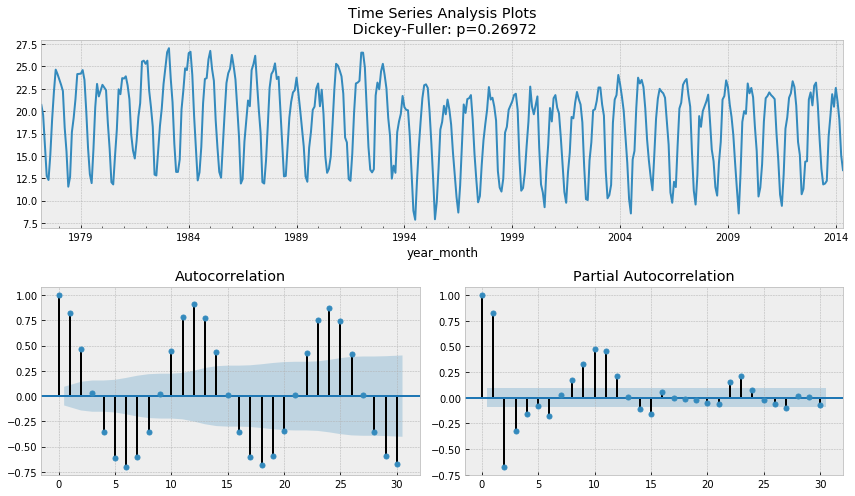

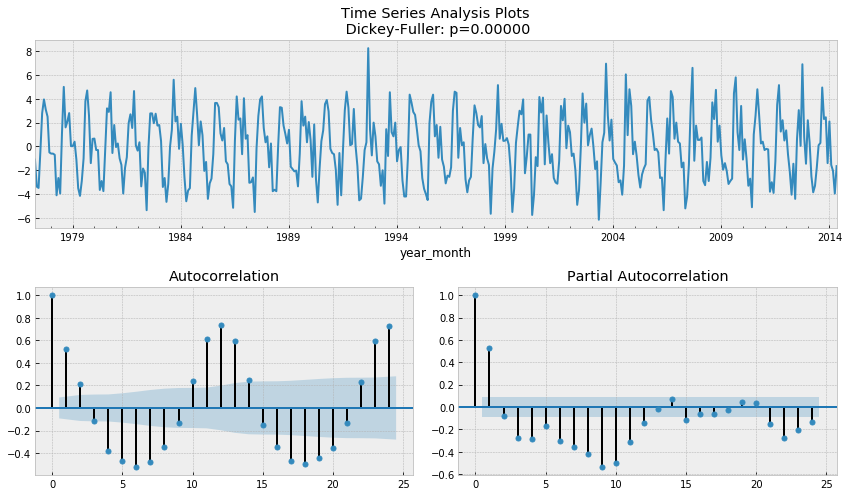

In [36]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(temperature, lags=30)

# Take the first difference to remove to make the process stationary
temp_diff = temperature - temperature.shift(1)

tsplot(temp_diff[1:], lags=24)


#### Discharge

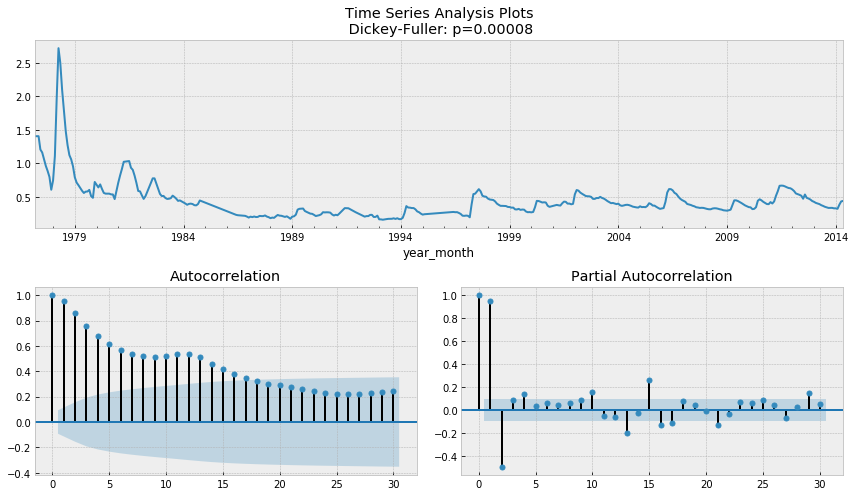

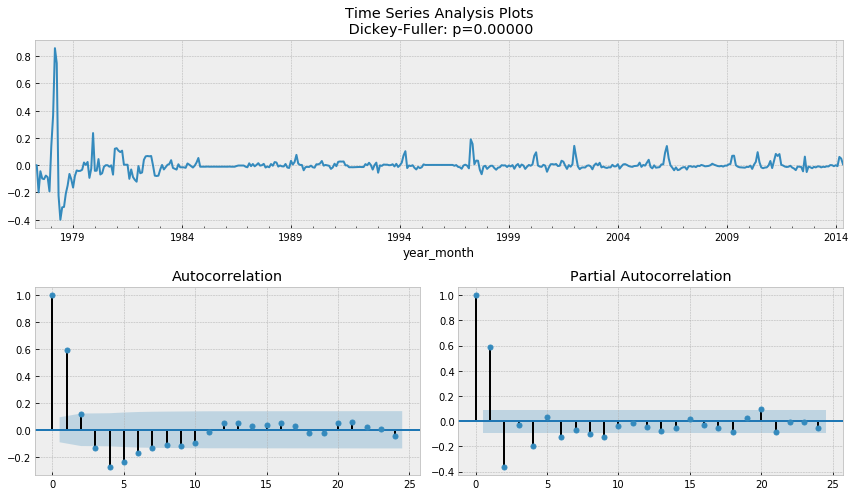

In [37]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(discharge, lags=30)

# Take the first difference to remove to make the process stationary
dis_diff = discharge - discharge.shift(1)

tsplot(dis_diff[1:], lags=24)

#### Usage

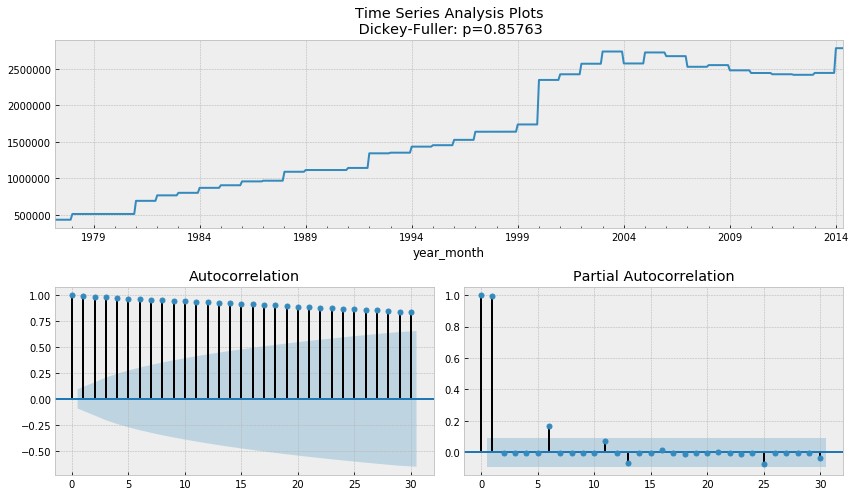

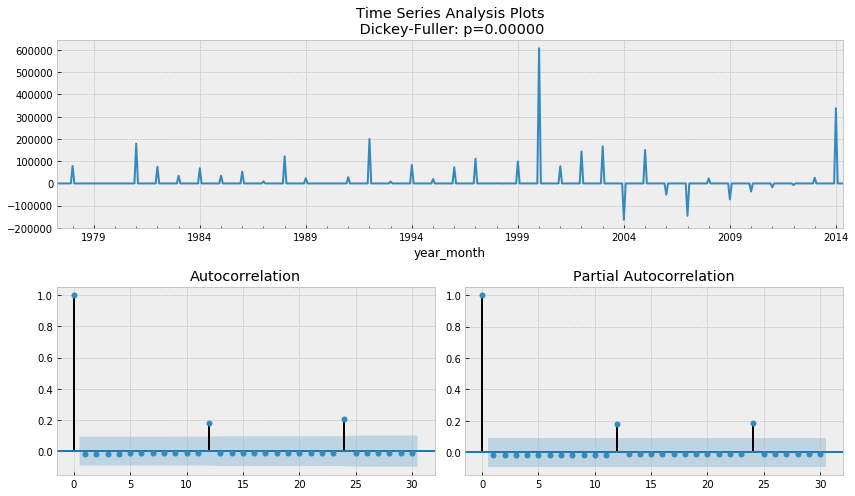

In [38]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(usage, lags=30)

#Take the first difference to remove to make the process stationary
usage_diff = usage - usage.shift(1)


tsplot(usage_diff[1:], lags=30)



### Differenced dataframe (poor model results)

In [39]:
pima_diff = pd.DataFrame({'D4N0111': D4N0111_diff ,'Temperature': temp_diff,  'Rainfall': rainfall,  'Discharge': dis_diff, 'Abstraction': usage_diff}, columns=['D4N0111','Temperature','precip_trend','Discharge', 'Abstraction'])
pima_diff.apply(lambda x: sum(x.isnull()), axis=0)

D4N0111           1
Temperature       1
precip_trend    447
Discharge         1
Abstraction       1
dtype: int64

In [40]:
#X = pima_diff[['Temperature', 'Discharge','Abstraction']] # Features
#y = pima_diff[['D4N0834']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110' 

### Visual illustration to help select train and test data

Text(0, 0.5, 'Groundwater levels')

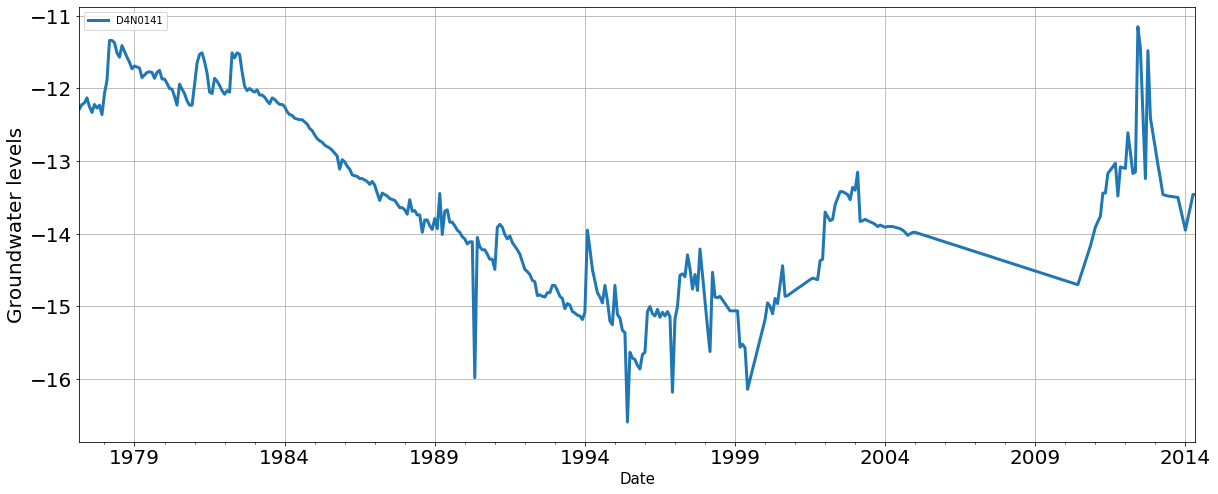

In [41]:
pima[['D4N0141']].plot(figsize=(20,8), linewidth=3, fontsize = 20, grid=True);
plt.xlabel("Date",fontsize=15)
plt.ylabel("Groundwater levels",fontsize=20)


In [42]:
pima = pima[pima.index < '2004-01-01'] 

### Model Parameters

In [43]:
pima['precip_trend_log'] = 1 +np.log1p(pima['precip_trend (t-5)'])
pima['Temperature_log'] = 1 +np.log1p(pima['Temperature (t-3)'])
pima['Discharge_log'] = 1 + np.log1p(pima['Discharge'])
pima['Abstraction_log'] = 1 + np.log1p(pima['Abstraction'])

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [44]:
pima

D4N0141  Temperature  precip_trend  Discharge  Abstraction  \
year_month                                                                 
1977-03-01 -12.280000    20.700000     51.983333      1.406   436477.250   
1977-04-01 -12.220000    19.600000     48.604167      1.406   436477.250   
1977-05-01 -12.200000    16.231148     48.808333      1.406   436477.250   
1977-06-01 -12.130000    12.750000     62.258333      1.207   436477.250   
1977-07-01 -12.250000    12.300000     73.212500      1.163   436477.250   
...               ...          ...           ...        ...          ...   
2003-08-01 -13.850000    11.750000     42.721558      0.423  2735367.917   
2003-09-01 -13.870000    18.700000     50.304891      0.407  2735367.917   
2003-10-01 -13.900000    21.300000     57.896558      0.410  2735367.917   
2003-11-01 -13.880000    21.800000     58.746558      0.401  2735367.917   
2003-12-01 -13.894754    24.050000     58.728261      0.393  2735367.917   

            Temperature (t-3)  precip_trend (t-5)  precip_trend_log  \
year_month                                                            
1977-03-01          20.700000           51.983333          4.969977   
1977-04-01          19.600000           48.604167          4.904075   
1977-05-01          16.231148           48.808333          4.908182   
1977-06-01          12.750000           62.258333          5.147227   
1977-07-01          12.300000           73.212500          5.306933   
...                       ...                 ...               ...   
2003-08-01          11.750000           42.721558          4.777841   
2003-09-01          18.700000           50.304891          4.937786   
2003-10-01          21.300000           57.896558          5.075783   
2003-11-01          21.800000           58.746558          5.090112   
2003-12-01          24.050000           58.728261          5.089805   

            Temperature_log  Discharge_log  Abstraction_log  
year_month                                                   
1977-03-01         4.077312       1.877966        13.986494  
1977-04-01         4.025291       1.877966        13.986494  
1977-05-01         3.846719       1.877966        13.986494  
1977-06-01         3.621039       1.791634        13.986494  
1977-07-01         3.587764       1.771496        13.986494  
...                     ...            ...              ...  
2003-08-01         3.545531       1.352767        15.821777  
2003-09-01         3.980619       1.341460        15.821777  
2003-10-01         4.104587       1.343590        15.821777  
2003-11-01         4.126761       1.337186        15.821777  
2003-12-01         4.220874       1.331460        15.821777  

[322 rows x 11 columns]

In [45]:
for obs in range(1,5):
    pima["t_" + str(obs)] = pima.D4N0141.shift(obs)
pima.fillna(0, inplace=True)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [46]:
pima

D4N0141  Temperature  precip_trend  Discharge  Abstraction  \
year_month                                                                 
1977-03-01 -12.280000    20.700000     51.983333      1.406   436477.250   
1977-04-01 -12.220000    19.600000     48.604167      1.406   436477.250   
1977-05-01 -12.200000    16.231148     48.808333      1.406   436477.250   
1977-06-01 -12.130000    12.750000     62.258333      1.207   436477.250   
1977-07-01 -12.250000    12.300000     73.212500      1.163   436477.250   
...               ...          ...           ...        ...          ...   
2003-08-01 -13.850000    11.750000     42.721558      0.423  2735367.917   
2003-09-01 -13.870000    18.700000     50.304891      0.407  2735367.917   
2003-10-01 -13.900000    21.300000     57.896558      0.410  2735367.917   
2003-11-01 -13.880000    21.800000     58.746558      0.401  2735367.917   
2003-12-01 -13.894754    24.050000     58.728261      0.393  2735367.917   

            Temperature (t-3)  precip_trend (t-5)  precip_trend_log  \
year_month                                                            
1977-03-01          20.700000           51.983333          4.969977   
1977-04-01          19.600000           48.604167          4.904075   
1977-05-01          16.231148           48.808333          4.908182   
1977-06-01          12.750000           62.258333          5.147227   
1977-07-01          12.300000           73.212500          5.306933   
...                       ...                 ...               ...   
2003-08-01          11.750000           42.721558          4.777841   
2003-09-01          18.700000           50.304891          4.937786   
2003-10-01          21.300000           57.896558          5.075783   
2003-11-01          21.800000           58.746558          5.090112   
2003-12-01          24.050000           58.728261          5.089805   

            Temperature_log  Discharge_log  Abstraction_log        t_1  \
year_month                                                               
1977-03-01         4.077312       1.877966        13.986494   0.000000   
1977-04-01         4.025291       1.877966        13.986494 -12.280000   
1977-05-01         3.846719       1.877966        13.986494 -12.220000   
1977-06-01         3.621039       1.791634        13.986494 -12.200000   
1977-07-01         3.587764       1.771496        13.986494 -12.130000   
...                     ...            ...              ...        ...   
2003-08-01         3.545531       1.352767        15.821777 -13.834754   
2003-09-01         3.980619       1.341460        15.821777 -13.850000   
2003-10-01         4.104587       1.343590        15.821777 -13.870000   
2003-11-01         4.126761       1.337186        15.821777 -13.900000   
2003-12-01         4.220874       1.331460        15.821777 -13.880000   

                  t_2        t_3        t_4  
year_month                                   
1977-03-01   0.000000   0.000000   0.000000  
1977-04-01   0.000000   0.000000   0.000000  
1977-05-01 -12.280000   0.000000   0.000000  
1977-06-01 -12.220000 -12.280000   0.000000  
1977-07-01 -12.200000 -12.220000 -12.280000  
...               ...        ...        ...  
2003-08-01 -13.820000 -13.800000 -13.820000  
2003-09-01 -13.834754 -13.820000 -13.800000  
2003-10-01 -13.850000 -13.834754 -13.820000  
2003-11-01 -13.870000 -13.850000 -13.834754  
2003-12-01 -13.900000 -13.870000 -13.850000  

[322 rows x 15 columns]

In [47]:
pima.shape

(322, 15)

In [48]:
pima1  = pima[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2','D4N0141']]
scaler = StandardScaler()
pima1  = pd.DataFrame(scaler.fit_transform(pima1), columns=pima1.columns, index=pima1.index)

### All variables

In [49]:
X = pima1[['Temperature_log','precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']]
y = pima1['D4N0141']

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

Temperature_log     0.042866
precip_trend_log    0.246219
Discharge_log       0.400202
Abstraction_log     0.765989
t_1                 1.000000
t_2                 0.840103
dtype: float64

In [50]:
X = pima1[['Discharge_log' ,'precip_trend_log' ,'Discharge_log', 'Abstraction_log','t_1', 't_2']].values
y = pima1['D4N0141'].values
y = y.reshape(-1,1)

In [51]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 5)
for train_index, test_index in tss.split(X):
    X_train, X_test = X[train_index, :], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(269, 6) (269, 1)
(53, 6) (53, 1)


In [52]:
def forecast(model, test_forecast, gwl, steps_ahead):
    y_pred = []
    current_output = gwl
    for step in range(steps_ahead):
        #print(test_forecast[step])
        input_test = np.concatenate([test_forecast[step][:-1], [current_output]])
        #input_test = [test_forecast[0][0][:-1], gwl]
        #print(input_test)
        pred = model.predict(input_test.reshape(1,1,6))
        y_pred.append(pred[0][0])
        #print(pred)
        current_output = pred[0][0]
    return y_pred

In [53]:
y_test[0]

array([-1.70694575])

### LSTM

In [54]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import GRU, LSTM
from tensorflow.keras.optimizers import Adam

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/tensorf

In [55]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_lstm', 'rmse_lstm', 'r2_lstm','mae_lstm'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    optimizer = Adam(lr=0.00001)
    model = Sequential()
    model.add(LSTM(50, input_shape=(1, 6)))
    model.add(Dropout(0.1))

    model.add(Dense(1))

    model.compile(loss='mae', optimizer='adam')

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
    
    history = model.fit(X_t_reshaped, y_train, epochs=700
                    , batch_size=72, validation_data=(X_val_reshaped, y_test), verbose=2, callbacks=[check, early], shuffle=False)

    #running function
    gwl = -1.70694575
    test_forecast = X_test
    steps_ahead = 53
    y_pred = forecast(model, test_forecast, gwl, steps_ahead)
    y_pred = np.array(y_pred)
    
    #metrics for test
    y_lstm = y_pred
    test_pred.append(y_lstm)
    mse_lstm = mean_squared_error(y_test, y_lstm)
    rmse_lstm = np.sqrt(mse_lstm)
    r2_lstm = r2_score(y_test, y_lstm)
    mae_lstm = mean_absolute_error(y_test, y_lstm)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_lstm,Round), round(rmse_lstm,Round), round(r2_lstm,Round),round(mae_lstm,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(269, 6)
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 269 samples, validate on 53 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/700

Epoch 00001: val_loss improved from inf to 0.60877, saving model to model.h5
269/269 - 4s - loss: 0.9066 - val_loss: 0.6088
Epoch 2/700

Epoch 00002: val_loss improved from 0.60877 to 0.59406, saving model to model.h5
269/269 - 0s - loss: 0.8763 - val_loss: 0.5941
Epoch 3/700

Epoch 00003: val_loss improved from 0.59406 to 0.57887, saving model to model.h5
269/269 - 0s - loss: 0.8484 - val_loss: 0.5789
Epoch 4/700

Epoch 00004: val_loss improved from 0.57887 to 0.56360, saving model to model.h5
269/269 - 0s - loss: 0.8156 - val_loss: 0.5636
Epoch 5/700

Epoch 00005: val_loss improved from 0.56360 to 0.54871, saving model to model.h5
269/269 - 0s - loss: 0.7877 - val_loss: 0.5487
Epoch 6/700

Epoch


Epoch 00057: val_loss did not improve from 0.34074
269/269 - 0s - loss: 0.1332 - val_loss: 0.4221
Epoch 58/700

Epoch 00058: val_loss did not improve from 0.34074
269/269 - 0s - loss: 0.1351 - val_loss: 0.4256
Epoch 59/700

Epoch 00059: val_loss did not improve from 0.34074
269/269 - 0s - loss: 0.1377 - val_loss: 0.4283
Epoch 60/700

Epoch 00060: val_loss did not improve from 0.34074
269/269 - 0s - loss: 0.1387 - val_loss: 0.4299
Epoch 61/700

Epoch 00061: val_loss did not improve from 0.34074
269/269 - 0s - loss: 0.1392 - val_loss: 0.4302
Epoch 62/700

Epoch 00062: val_loss did not improve from 0.34074
269/269 - 0s - loss: 0.1388 - val_loss: 0.4304
Epoch 63/700

Epoch 00063: val_loss did not improve from 0.34074
269/269 - 0s - loss: 0.1335 - val_loss: 0.4322
Epoch 64/700

Epoch 00064: val_loss did not improve from 0.34074
269/269 - 0s - loss: 0.1357 - val_loss: 0.4353
Epoch 65/700

Epoch 00065: val_loss did not improve from 0.34074
269/269 - 0s - loss: 0.1336 - val_loss: 0.4377
Epoch

Epoch 130/700

Epoch 00130: val_loss did not improve from 0.34074
269/269 - 0s - loss: 0.1232 - val_loss: 0.4385
Epoch 131/700

Epoch 00131: val_loss did not improve from 0.34074
269/269 - 0s - loss: 0.1324 - val_loss: 0.4348
Epoch 132/700

Epoch 00132: val_loss did not improve from 0.34074
269/269 - 0s - loss: 0.1183 - val_loss: 0.4290
Epoch 133/700

Epoch 00133: val_loss did not improve from 0.34074
269/269 - 0s - loss: 0.1240 - val_loss: 0.4261
Epoch 134/700

Epoch 00134: val_loss did not improve from 0.34074
269/269 - 0s - loss: 0.1248 - val_loss: 0.4241
Epoch 135/700

Epoch 00135: val_loss did not improve from 0.34074
269/269 - 0s - loss: 0.1214 - val_loss: 0.4222
Epoch 136/700

Epoch 00136: val_loss did not improve from 0.34074
269/269 - 0s - loss: 0.1304 - val_loss: 0.4230
Epoch 137/700

Epoch 00137: val_loss did not improve from 0.34074
269/269 - 0s - loss: 0.1243 - val_loss: 0.4259
Epoch 138/700

Epoch 00138: val_loss did not improve from 0.34074
269/269 - 0s - loss: 0.1178 - 

Epoch 55/700

Epoch 00055: val_loss did not improve from 0.31890
269/269 - 0s - loss: 0.1350 - val_loss: 0.3778
Epoch 56/700

Epoch 00056: val_loss did not improve from 0.31890
269/269 - 0s - loss: 0.1286 - val_loss: 0.3781
Epoch 57/700

Epoch 00057: val_loss did not improve from 0.31890
269/269 - 0s - loss: 0.1301 - val_loss: 0.3779
Epoch 58/700

Epoch 00058: val_loss did not improve from 0.31890
269/269 - 0s - loss: 0.1380 - val_loss: 0.3796
Epoch 59/700

Epoch 00059: val_loss did not improve from 0.31890
269/269 - 0s - loss: 0.1419 - val_loss: 0.3809
Epoch 60/700

Epoch 00060: val_loss did not improve from 0.31890
269/269 - 0s - loss: 0.1350 - val_loss: 0.3814
Epoch 61/700

Epoch 00061: val_loss did not improve from 0.31890
269/269 - 0s - loss: 0.1313 - val_loss: 0.3825
Epoch 62/700

Epoch 00062: val_loss did not improve from 0.31890
269/269 - 0s - loss: 0.1294 - val_loss: 0.3837
Epoch 63/700

Epoch 00063: val_loss did not improve from 0.31890
269/269 - 0s - loss: 0.1335 - val_loss:

Epoch 128/700

Epoch 00128: val_loss did not improve from 0.31890
269/269 - 0s - loss: 0.1248 - val_loss: 0.3490
Epoch 129/700

Epoch 00129: val_loss did not improve from 0.31890
269/269 - 0s - loss: 0.1211 - val_loss: 0.3475
Epoch 130/700

Epoch 00130: val_loss did not improve from 0.31890
269/269 - 0s - loss: 0.1163 - val_loss: 0.3450
Epoch 131/700

Epoch 00131: val_loss did not improve from 0.31890
269/269 - 0s - loss: 0.1198 - val_loss: 0.3415
Epoch 132/700

Epoch 00132: val_loss did not improve from 0.31890
269/269 - 0s - loss: 0.1241 - val_loss: 0.3376
Epoch 133/700

Epoch 00133: val_loss did not improve from 0.31890
269/269 - 0s - loss: 0.1257 - val_loss: 0.3346
Epoch 134/700

Epoch 00134: val_loss did not improve from 0.31890
269/269 - 0s - loss: 0.1174 - val_loss: 0.3356
Epoch 135/700

Epoch 00135: val_loss did not improve from 0.31890
269/269 - 0s - loss: 0.1191 - val_loss: 0.3395
Epoch 136/700

Epoch 00136: val_loss did not improve from 0.31890
269/269 - 0s - loss: 0.1206 - 

Epoch 56/700

Epoch 00056: val_loss did not improve from 0.33102
269/269 - 0s - loss: 0.1352 - val_loss: 0.4252
Epoch 57/700

Epoch 00057: val_loss did not improve from 0.33102
269/269 - 0s - loss: 0.1414 - val_loss: 0.4277
Epoch 58/700

Epoch 00058: val_loss did not improve from 0.33102
269/269 - 0s - loss: 0.1363 - val_loss: 0.4310
Epoch 59/700

Epoch 00059: val_loss did not improve from 0.33102
269/269 - 0s - loss: 0.1380 - val_loss: 0.4336
Epoch 60/700

Epoch 00060: val_loss did not improve from 0.33102
269/269 - 0s - loss: 0.1359 - val_loss: 0.4358
Epoch 61/700

Epoch 00061: val_loss did not improve from 0.33102
269/269 - 0s - loss: 0.1344 - val_loss: 0.4381
Epoch 62/700

Epoch 00062: val_loss did not improve from 0.33102
269/269 - 0s - loss: 0.1315 - val_loss: 0.4393
Epoch 63/700

Epoch 00063: val_loss did not improve from 0.33102
269/269 - 0s - loss: 0.1371 - val_loss: 0.4408
Epoch 64/700

Epoch 00064: val_loss did not improve from 0.33102
269/269 - 0s - loss: 0.1294 - val_loss:

Epoch 129/700

Epoch 00129: val_loss did not improve from 0.33102
269/269 - 0s - loss: 0.1170 - val_loss: 0.4023
Epoch 130/700

Epoch 00130: val_loss did not improve from 0.33102
269/269 - 0s - loss: 0.1213 - val_loss: 0.3985
Epoch 131/700

Epoch 00131: val_loss did not improve from 0.33102
269/269 - 0s - loss: 0.1181 - val_loss: 0.3984
Running fold 4
(269, 6)
Train on 269 samples, validate on 53 samples
Epoch 1/700

Epoch 00001: val_loss improved from inf to 0.56467, saving model to model.h5
269/269 - 4s - loss: 0.9006 - val_loss: 0.5647
Epoch 2/700

Epoch 00002: val_loss improved from 0.56467 to 0.54737, saving model to model.h5
269/269 - 0s - loss: 0.8670 - val_loss: 0.5474
Epoch 3/700

Epoch 00003: val_loss improved from 0.54737 to 0.53005, saving model to model.h5
269/269 - 0s - loss: 0.8301 - val_loss: 0.5301
Epoch 4/700

Epoch 00004: val_loss improved from 0.53005 to 0.51359, saving model to model.h5
269/269 - 0s - loss: 0.7995 - val_loss: 0.5136
Epoch 5/700

Epoch 00005: val_lo

Epoch 63/700

Epoch 00063: val_loss did not improve from 0.34089
269/269 - 0s - loss: 0.1375 - val_loss: 0.4231
Epoch 64/700

Epoch 00064: val_loss did not improve from 0.34089
269/269 - 0s - loss: 0.1359 - val_loss: 0.4241
Epoch 65/700

Epoch 00065: val_loss did not improve from 0.34089
269/269 - 0s - loss: 0.1347 - val_loss: 0.4252
Epoch 66/700

Epoch 00066: val_loss did not improve from 0.34089
269/269 - 0s - loss: 0.1327 - val_loss: 0.4251
Epoch 67/700

Epoch 00067: val_loss did not improve from 0.34089
269/269 - 0s - loss: 0.1371 - val_loss: 0.4247
Epoch 68/700

Epoch 00068: val_loss did not improve from 0.34089
269/269 - 0s - loss: 0.1341 - val_loss: 0.4246
Epoch 69/700

Epoch 00069: val_loss did not improve from 0.34089
269/269 - 0s - loss: 0.1299 - val_loss: 0.4254
Epoch 70/700

Epoch 00070: val_loss did not improve from 0.34089
269/269 - 0s - loss: 0.1327 - val_loss: 0.4262
Epoch 71/700

Epoch 00071: val_loss did not improve from 0.34089
269/269 - 0s - loss: 0.1330 - val_loss:

Epoch 4/700

Epoch 00004: val_loss improved from 0.58195 to 0.56540, saving model to model.h5
269/269 - 0s - loss: 0.8462 - val_loss: 0.5654
Epoch 5/700

Epoch 00005: val_loss improved from 0.56540 to 0.54861, saving model to model.h5
269/269 - 0s - loss: 0.8122 - val_loss: 0.5486
Epoch 6/700

Epoch 00006: val_loss improved from 0.54861 to 0.53176, saving model to model.h5
269/269 - 0s - loss: 0.7832 - val_loss: 0.5318
Epoch 7/700

Epoch 00007: val_loss improved from 0.53176 to 0.51578, saving model to model.h5
269/269 - 0s - loss: 0.7535 - val_loss: 0.5158
Epoch 8/700

Epoch 00008: val_loss improved from 0.51578 to 0.50179, saving model to model.h5
269/269 - 0s - loss: 0.7243 - val_loss: 0.5018
Epoch 9/700

Epoch 00009: val_loss improved from 0.50179 to 0.48927, saving model to model.h5
269/269 - 0s - loss: 0.6918 - val_loss: 0.4893
Epoch 10/700

Epoch 00010: val_loss improved from 0.48927 to 0.47764, saving model to model.h5
269/269 - 0s - loss: 0.6624 - val_loss: 0.4776
Epoch 11/700

Epoch 69/700

Epoch 00069: val_loss did not improve from 0.33593
269/269 - 0s - loss: 0.1321 - val_loss: 0.4215
Epoch 70/700

Epoch 00070: val_loss did not improve from 0.33593
269/269 - 0s - loss: 0.1317 - val_loss: 0.4204
Epoch 71/700

Epoch 00071: val_loss did not improve from 0.33593
269/269 - 0s - loss: 0.1298 - val_loss: 0.4214
Epoch 72/700

Epoch 00072: val_loss did not improve from 0.33593
269/269 - 0s - loss: 0.1291 - val_loss: 0.4235
Epoch 73/700

Epoch 00073: val_loss did not improve from 0.33593
269/269 - 0s - loss: 0.1361 - val_loss: 0.4251
Epoch 74/700

Epoch 00074: val_loss did not improve from 0.33593
269/269 - 0s - loss: 0.1300 - val_loss: 0.4257
Epoch 75/700

Epoch 00075: val_loss did not improve from 0.33593
269/269 - 0s - loss: 0.1269 - val_loss: 0.4243
Epoch 76/700

Epoch 00076: val_loss did not improve from 0.33593
269/269 - 0s - loss: 0.1287 - val_loss: 0.4240
Epoch 77/700

Epoch 00077: val_loss did not improve from 0.33593
269/269 - 0s - loss: 0.1316 - val_loss:

Epoch 6/700

Epoch 00006: val_loss improved from 0.49047 to 0.47551, saving model to model.h5
269/269 - 0s - loss: 0.7790 - val_loss: 0.4755
Epoch 7/700

Epoch 00007: val_loss improved from 0.47551 to 0.46156, saving model to model.h5
269/269 - 0s - loss: 0.7524 - val_loss: 0.4616
Epoch 8/700

Epoch 00008: val_loss improved from 0.46156 to 0.45036, saving model to model.h5
269/269 - 0s - loss: 0.7265 - val_loss: 0.4504
Epoch 9/700

Epoch 00009: val_loss improved from 0.45036 to 0.44056, saving model to model.h5
269/269 - 0s - loss: 0.6942 - val_loss: 0.4406
Epoch 10/700

Epoch 00010: val_loss improved from 0.44056 to 0.43137, saving model to model.h5
269/269 - 0s - loss: 0.6648 - val_loss: 0.4314
Epoch 11/700

Epoch 00011: val_loss improved from 0.43137 to 0.42298, saving model to model.h5
269/269 - 0s - loss: 0.6357 - val_loss: 0.4230
Epoch 12/700

Epoch 00012: val_loss improved from 0.42298 to 0.41479, saving model to model.h5
269/269 - 0s - loss: 0.6111 - val_loss: 0.4148
Epoch 13/7

Epoch 73/700

Epoch 00073: val_loss did not improve from 0.33345
269/269 - 0s - loss: 0.1337 - val_loss: 0.4337
Epoch 74/700

Epoch 00074: val_loss did not improve from 0.33345
269/269 - 0s - loss: 0.1301 - val_loss: 0.4351
Epoch 75/700

Epoch 00075: val_loss did not improve from 0.33345
269/269 - 0s - loss: 0.1359 - val_loss: 0.4367
Epoch 76/700

Epoch 00076: val_loss did not improve from 0.33345
269/269 - 0s - loss: 0.1311 - val_loss: 0.4380
Epoch 77/700

Epoch 00077: val_loss did not improve from 0.33345
269/269 - 0s - loss: 0.1256 - val_loss: 0.4397
Epoch 78/700

Epoch 00078: val_loss did not improve from 0.33345
269/269 - 0s - loss: 0.1289 - val_loss: 0.4412
Epoch 79/700

Epoch 00079: val_loss did not improve from 0.33345
269/269 - 0s - loss: 0.1284 - val_loss: 0.4409
Epoch 80/700

Epoch 00080: val_loss did not improve from 0.33345
269/269 - 0s - loss: 0.1360 - val_loss: 0.4388
Epoch 81/700

Epoch 00081: val_loss did not improve from 0.33345
269/269 - 0s - loss: 0.1347 - val_loss:

269/269 - 0s - loss: 0.6150 - val_loss: 0.5189
Epoch 14/700

Epoch 00014: val_loss improved from 0.51895 to 0.50850, saving model to model.h5
269/269 - 0s - loss: 0.5884 - val_loss: 0.5085
Epoch 15/700

Epoch 00015: val_loss improved from 0.50850 to 0.49802, saving model to model.h5
269/269 - 0s - loss: 0.5558 - val_loss: 0.4980
Epoch 16/700

Epoch 00016: val_loss improved from 0.49802 to 0.48725, saving model to model.h5
269/269 - 0s - loss: 0.5292 - val_loss: 0.4873
Epoch 17/700

Epoch 00017: val_loss improved from 0.48725 to 0.47670, saving model to model.h5
269/269 - 0s - loss: 0.4967 - val_loss: 0.4767
Epoch 18/700

Epoch 00018: val_loss improved from 0.47670 to 0.46713, saving model to model.h5
269/269 - 0s - loss: 0.4725 - val_loss: 0.4671
Epoch 19/700

Epoch 00019: val_loss improved from 0.46713 to 0.45811, saving model to model.h5
269/269 - 0s - loss: 0.4569 - val_loss: 0.4581
Epoch 20/700

Epoch 00020: val_loss improved from 0.45811 to 0.44902, saving model to model.h5
269/26

Epoch 80/700

Epoch 00080: val_loss did not improve from 0.33139
269/269 - 0s - loss: 0.1237 - val_loss: 0.4366
Epoch 81/700

Epoch 00081: val_loss did not improve from 0.33139
269/269 - 0s - loss: 0.1289 - val_loss: 0.4372
Epoch 82/700

Epoch 00082: val_loss did not improve from 0.33139
269/269 - 0s - loss: 0.1280 - val_loss: 0.4389
Epoch 83/700

Epoch 00083: val_loss did not improve from 0.33139
269/269 - 0s - loss: 0.1281 - val_loss: 0.4430
Epoch 84/700

Epoch 00084: val_loss did not improve from 0.33139
269/269 - 0s - loss: 0.1229 - val_loss: 0.4429
Epoch 85/700

Epoch 00085: val_loss did not improve from 0.33139
269/269 - 0s - loss: 0.1300 - val_loss: 0.4382
Epoch 86/700

Epoch 00086: val_loss did not improve from 0.33139
269/269 - 0s - loss: 0.1326 - val_loss: 0.4345
Epoch 87/700

Epoch 00087: val_loss did not improve from 0.33139
269/269 - 0s - loss: 0.1282 - val_loss: 0.4354
Epoch 88/700

Epoch 00088: val_loss did not improve from 0.33139
269/269 - 0s - loss: 0.1277 - val_loss:

Epoch 11/700

Epoch 00011: val_loss improved from 0.44917 to 0.43964, saving model to model.h5
269/269 - 0s - loss: 0.6542 - val_loss: 0.4396
Epoch 12/700

Epoch 00012: val_loss improved from 0.43964 to 0.43152, saving model to model.h5
269/269 - 0s - loss: 0.6256 - val_loss: 0.4315
Epoch 13/700

Epoch 00013: val_loss improved from 0.43152 to 0.42407, saving model to model.h5
269/269 - 0s - loss: 0.5969 - val_loss: 0.4241
Epoch 14/700

Epoch 00014: val_loss improved from 0.42407 to 0.41675, saving model to model.h5
269/269 - 0s - loss: 0.5694 - val_loss: 0.4168
Epoch 15/700

Epoch 00015: val_loss improved from 0.41675 to 0.40964, saving model to model.h5
269/269 - 0s - loss: 0.5430 - val_loss: 0.4096
Epoch 16/700

Epoch 00016: val_loss improved from 0.40964 to 0.40248, saving model to model.h5
269/269 - 0s - loss: 0.5070 - val_loss: 0.4025
Epoch 17/700

Epoch 00017: val_loss improved from 0.40248 to 0.39533, saving model to model.h5
269/269 - 0s - loss: 0.4834 - val_loss: 0.3953
Epoch 

269/269 - 0s - loss: 0.1294 - val_loss: 0.4151
Epoch 78/700

Epoch 00078: val_loss did not improve from 0.32349
269/269 - 0s - loss: 0.1314 - val_loss: 0.4153
Epoch 79/700

Epoch 00079: val_loss did not improve from 0.32349
269/269 - 0s - loss: 0.1292 - val_loss: 0.4162
Epoch 80/700

Epoch 00080: val_loss did not improve from 0.32349
269/269 - 0s - loss: 0.1267 - val_loss: 0.4167
Epoch 81/700

Epoch 00081: val_loss did not improve from 0.32349
269/269 - 0s - loss: 0.1290 - val_loss: 0.4174
Epoch 82/700

Epoch 00082: val_loss did not improve from 0.32349
269/269 - 0s - loss: 0.1305 - val_loss: 0.4185
Epoch 83/700

Epoch 00083: val_loss did not improve from 0.32349
269/269 - 0s - loss: 0.1308 - val_loss: 0.4185
Epoch 84/700

Epoch 00084: val_loss did not improve from 0.32349
269/269 - 0s - loss: 0.1278 - val_loss: 0.4179
Epoch 85/700

Epoch 00085: val_loss did not improve from 0.32349
269/269 - 0s - loss: 0.1288 - val_loss: 0.4150
Epoch 86/700

Epoch 00086: val_loss did not improve from 

Epoch 12/700

Epoch 00012: val_loss improved from 0.48599 to 0.47208, saving model to model.h5
269/269 - 0s - loss: 0.5932 - val_loss: 0.4721
Epoch 13/700

Epoch 00013: val_loss improved from 0.47208 to 0.45943, saving model to model.h5
269/269 - 0s - loss: 0.5667 - val_loss: 0.4594
Epoch 14/700

Epoch 00014: val_loss improved from 0.45943 to 0.44691, saving model to model.h5
269/269 - 0s - loss: 0.5346 - val_loss: 0.4469
Epoch 15/700

Epoch 00015: val_loss improved from 0.44691 to 0.43449, saving model to model.h5
269/269 - 0s - loss: 0.5008 - val_loss: 0.4345
Epoch 16/700

Epoch 00016: val_loss improved from 0.43449 to 0.42361, saving model to model.h5
269/269 - 0s - loss: 0.4682 - val_loss: 0.4236
Epoch 17/700

Epoch 00017: val_loss improved from 0.42361 to 0.41376, saving model to model.h5
269/269 - 0s - loss: 0.4395 - val_loss: 0.4138
Epoch 18/700

Epoch 00018: val_loss improved from 0.41376 to 0.40394, saving model to model.h5
269/269 - 0s - loss: 0.4210 - val_loss: 0.4039
Epoch 

Epoch 79/700

Epoch 00079: val_loss did not improve from 0.30534
269/269 - 0s - loss: 0.1258 - val_loss: 0.4181
Epoch 80/700

Epoch 00080: val_loss did not improve from 0.30534
269/269 - 0s - loss: 0.1281 - val_loss: 0.4174
Epoch 81/700

Epoch 00081: val_loss did not improve from 0.30534
269/269 - 0s - loss: 0.1288 - val_loss: 0.4173
Epoch 82/700

Epoch 00082: val_loss did not improve from 0.30534
269/269 - 0s - loss: 0.1282 - val_loss: 0.4187
Epoch 83/700

Epoch 00083: val_loss did not improve from 0.30534
269/269 - 0s - loss: 0.1318 - val_loss: 0.4196
Epoch 84/700

Epoch 00084: val_loss did not improve from 0.30534
269/269 - 0s - loss: 0.1283 - val_loss: 0.4169
Epoch 85/700

Epoch 00085: val_loss did not improve from 0.30534
269/269 - 0s - loss: 0.1248 - val_loss: 0.4144
Epoch 86/700

Epoch 00086: val_loss did not improve from 0.30534
269/269 - 0s - loss: 0.1226 - val_loss: 0.4140
Epoch 87/700

Epoch 00087: val_loss did not improve from 0.30534
269/269 - 0s - loss: 0.1266 - val_loss:

Epoch 13/700

Epoch 00013: val_loss improved from 0.42930 to 0.42079, saving model to model.h5
269/269 - 0s - loss: 0.5468 - val_loss: 0.4208
Epoch 14/700

Epoch 00014: val_loss improved from 0.42079 to 0.41224, saving model to model.h5
269/269 - 0s - loss: 0.5215 - val_loss: 0.4122
Epoch 15/700

Epoch 00015: val_loss improved from 0.41224 to 0.40364, saving model to model.h5
269/269 - 0s - loss: 0.4814 - val_loss: 0.4036
Epoch 16/700

Epoch 00016: val_loss improved from 0.40364 to 0.39499, saving model to model.h5
269/269 - 0s - loss: 0.4535 - val_loss: 0.3950
Epoch 17/700

Epoch 00017: val_loss improved from 0.39499 to 0.38678, saving model to model.h5
269/269 - 0s - loss: 0.4282 - val_loss: 0.3868
Epoch 18/700

Epoch 00018: val_loss improved from 0.38678 to 0.38033, saving model to model.h5
269/269 - 0s - loss: 0.3973 - val_loss: 0.3803
Epoch 19/700

Epoch 00019: val_loss improved from 0.38033 to 0.37396, saving model to model.h5
269/269 - 0s - loss: 0.3731 - val_loss: 0.3740
Epoch 

Epoch 83/700

Epoch 00083: val_loss did not improve from 0.34210
269/269 - 0s - loss: 0.1268 - val_loss: 0.4591
Epoch 84/700

Epoch 00084: val_loss did not improve from 0.34210
269/269 - 0s - loss: 0.1255 - val_loss: 0.4575
Epoch 85/700

Epoch 00085: val_loss did not improve from 0.34210
269/269 - 0s - loss: 0.1377 - val_loss: 0.4553
Epoch 86/700

Epoch 00086: val_loss did not improve from 0.34210
269/269 - 0s - loss: 0.1279 - val_loss: 0.4532
Epoch 87/700

Epoch 00087: val_loss did not improve from 0.34210
269/269 - 0s - loss: 0.1292 - val_loss: 0.4508
Epoch 88/700

Epoch 00088: val_loss did not improve from 0.34210
269/269 - 0s - loss: 0.1277 - val_loss: 0.4503
Epoch 89/700

Epoch 00089: val_loss did not improve from 0.34210
269/269 - 0s - loss: 0.1361 - val_loss: 0.4506
Epoch 90/700

Epoch 00090: val_loss did not improve from 0.34210
269/269 - 0s - loss: 0.1287 - val_loss: 0.4506
Epoch 91/700

Epoch 00091: val_loss did not improve from 0.34210
269/269 - 0s - loss: 0.1209 - val_loss:

In [56]:
summary

Iteration_No  mse_lstm  rmse_lstm  r2_lstm  mae_lstm
0   Iteration_1     0.672      0.820   -1.341     0.774
1   Iteration_2     0.454      0.674   -0.581     0.631
2   Iteration_3     0.560      0.749   -0.953     0.708
3   Iteration_4     0.426      0.652   -0.483     0.608
4   Iteration_5     0.548      0.740   -0.911     0.693
5   Iteration_6     0.638      0.799   -1.223     0.751
6   Iteration_7     0.496      0.704   -0.727     0.669
7   Iteration_8     0.689      0.830   -1.400     0.795
8   Iteration_9     0.466      0.683   -0.624     0.648
9  Iteration_10     0.581      0.762   -1.024     0.719

In [57]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]

train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:269, 6].values

In [58]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]

test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[269:322, 6].values


In [59]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:269]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))

#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[269:322]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.039
Root mean squared error is: 0.197
Mean absolute error is: 0.109
R^2 score is:  0.964

The model performance for the test set
--------------------------------------
R^2 score is:  -0.927
Mean squared error is: 0.553
Root mean squared error is: 0.741
Mean absolute error is: 0.7
Stdv    0.017
dtype: float32


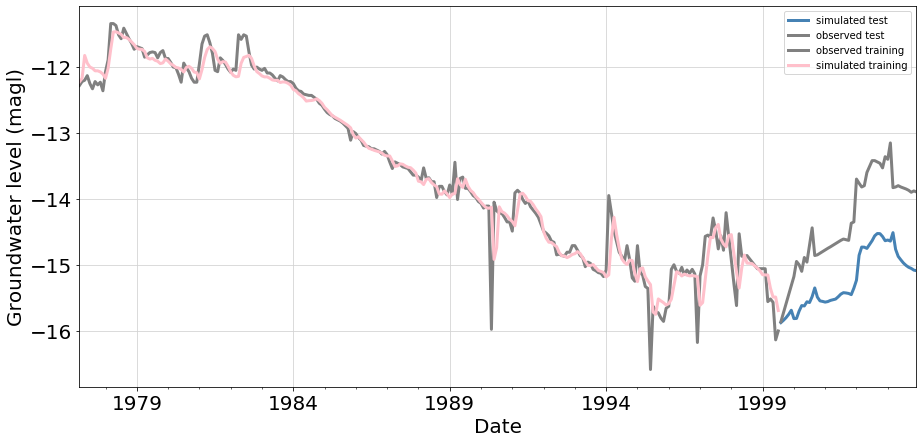

In [60]:
mse_lstm  = summary['mse_lstm'].mean(axis=0)
rmse_lstm = summary['rmse_lstm'].mean(axis=0)
mae_lstm  = summary['mae_lstm'].mean(axis=0)
r2_lstm   = summary['r2_lstm'].mean(axis=0)
stdv_lstm = stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_lstm, 3))
print("Mean squared error is:",round(mse_lstm,3))
print("Root mean squared error is:",round(rmse_lstm, 3))
print("Mean absolute error is:",round(mae_lstm,3))
print(round(stdv_lstm,3))



df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[269:322].index)
df1['observed test']      = pima.iloc[269:322, 0].values

df2 = pd.DataFrame(pima.iloc[0:269, 0].values, columns = ['observed training'],index =pima.iloc[0:269].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=3)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=3)
out_df['observed training'].plot(color='grey', linewidth=3)
out_df['simulated training'].plot(color='pink', linewidth=3)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(15,7)

In [61]:
y_lstm = out_df['simulated test']

### GRU

In [62]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import GRU
from tensorflow.keras.optimizers import Adam

In [63]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_lstm', 'rmse_lstm', 'r2_lstm','mae_lstm'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    optimizer = Adam(lr=0.00001)
    model = Sequential()
    model.add(GRU(20, input_shape=(1, 6)))
    model.add(Dropout(0.1))

    model.add(Dense(1))

    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_data=(X_val_reshaped, y_test),
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    X_val_reshaped = X_val_reshaped.reshape(53, 6)

    #running function
    gwl = -1.70694575
    test_forecast = X_test
    steps_ahead = 53
    y_pred = forecast(model, test_forecast, gwl, steps_ahead)
    y_pred = np.array(y_pred)
    
    #metrics for test
    y_lstm = y_pred
    test_pred.append(y_lstm)
    mse_lstm = mean_squared_error(y_test, y_lstm)
    rmse_lstm = np.sqrt(mse_lstm)
    r2_lstm = r2_score(y_test, y_lstm)
    mae_lstm = mean_absolute_error(y_test, y_lstm)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_lstm,Round), round(rmse_lstm,Round), round(r2_lstm,Round),round(mae_lstm,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(269, 6)
Train on 269 samples, validate on 53 samples
Epoch 1/1000
 96/269 [=========>....................] - ETA: 5s - loss: 1.5887 - mean_squared_error: 1.5887
Epoch 00001: val_loss improved from inf to 0.72814, saving model to model.h5
269/269 [==============================] - 5s 19ms/sample - loss: 1.4566 - mean_squared_error: 1.4566 - val_loss: 0.7281 - val_mean_squared_error: 0.7281
Epoch 2/1000
 96/269 [=========>....................] - ETA: 0s - loss: 1.3231 - mean_squared_error: 1.3231
Epoch 00002: val_loss improved from 0.72814 to 0.68643, saving model to model.h5
269/269 [==============================] - 0s 139us/sample - loss: 1.2679 - mean_squared_error: 1.2679 - val_loss: 0.6864 - val_mean_squared_error: 0.6864
Epoch 3/1000
 96/269 [=========>....................] - ETA: 0s - loss: 1.1360 - mean_squared_error: 1.1360
Epoch 00003: val_loss improved from 0.68643 to 0.65495, saving model to model.h5
269/269 [==============================] - 0s 139us/sample 

Epoch 25/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1731 - mean_squared_error: 0.1731
Epoch 00025: val_loss improved from 0.22903 to 0.21594, saving model to model.h5
269/269 [==============================] - 0s 143us/sample - loss: 0.2159 - mean_squared_error: 0.2159 - val_loss: 0.2159 - val_mean_squared_error: 0.2159
Epoch 26/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.2431 - mean_squared_error: 0.2431
Epoch 00026: val_loss improved from 0.21594 to 0.20374, saving model to model.h5
269/269 [==============================] - 0s 149us/sample - loss: 0.2023 - mean_squared_error: 0.2023 - val_loss: 0.2037 - val_mean_squared_error: 0.2037
Epoch 27/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1851 - mean_squared_error: 0.1851
Epoch 00027: val_loss improved from 0.20374 to 0.19222, saving model to model.h5
269/269 [==============================] - 0s 132us/sample - loss: 0.1945 - mean_squared_error: 0.1945 - val_loss: 0.192

Epoch 50/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0491 - mean_squared_error: 0.0491
Epoch 00050: val_loss did not improve from 0.13303
269/269 [==============================] - 0s 79us/sample - loss: 0.0643 - mean_squared_error: 0.0643 - val_loss: 0.1821 - val_mean_squared_error: 0.1821
Epoch 51/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0459 - mean_squared_error: 0.0459
Epoch 00051: val_loss did not improve from 0.13303
269/269 [==============================] - 0s 88us/sample - loss: 0.0628 - mean_squared_error: 0.0628 - val_loss: 0.1837 - val_mean_squared_error: 0.1837
Epoch 52/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0548 - mean_squared_error: 0.0548
Epoch 00052: val_loss did not improve from 0.13303
269/269 [==============================] - 0s 78us/sample - loss: 0.0584 - mean_squared_error: 0.0584 - val_loss: 0.1826 - val_mean_squared_error: 0.1826
Epoch 53/1000
 96/269 [=========>....................] - E

 96/269 [=========>....................] - ETA: 0s - loss: 0.0495 - mean_squared_error: 0.0495
Epoch 00076: val_loss did not improve from 0.13303
269/269 [==============================] - 0s 128us/sample - loss: 0.0525 - mean_squared_error: 0.0525 - val_loss: 0.2055 - val_mean_squared_error: 0.2055
Epoch 77/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0482 - mean_squared_error: 0.0482
Epoch 00077: val_loss did not improve from 0.13303
269/269 [==============================] - 0s 123us/sample - loss: 0.0527 - mean_squared_error: 0.0527 - val_loss: 0.1977 - val_mean_squared_error: 0.1977
Epoch 78/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0502 - mean_squared_error: 0.0502
Epoch 00078: val_loss did not improve from 0.13303
269/269 [==============================] - 0s 120us/sample - loss: 0.0504 - mean_squared_error: 0.0504 - val_loss: 0.1975 - val_mean_squared_error: 0.1975
Epoch 79/1000
 96/269 [=========>....................] - ETA: 0s - lo

 96/269 [=========>....................] - ETA: 0s - loss: 0.0485 - mean_squared_error: 0.0485
Epoch 00102: val_loss did not improve from 0.13303
269/269 [==============================] - 0s 77us/sample - loss: 0.0497 - mean_squared_error: 0.0497 - val_loss: 0.1841 - val_mean_squared_error: 0.1841
Epoch 103/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0479 - mean_squared_error: 0.0479
Epoch 00103: val_loss did not improve from 0.13303
269/269 [==============================] - 0s 81us/sample - loss: 0.0505 - mean_squared_error: 0.0505 - val_loss: 0.1797 - val_mean_squared_error: 0.1797
Epoch 104/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0735 - mean_squared_error: 0.0735
Epoch 00104: val_loss did not improve from 0.13303
269/269 [==============================] - 0s 82us/sample - loss: 0.0512 - mean_squared_error: 0.0512 - val_loss: 0.1698 - val_mean_squared_error: 0.1698
Epoch 105/1000
 96/269 [=========>....................] - ETA: 0s - lo

 96/269 [=========>....................] - ETA: 0s - loss: 0.0592 - mean_squared_error: 0.0592
Epoch 00128: val_loss did not improve from 0.13303
269/269 [==============================] - 0s 70us/sample - loss: 0.0457 - mean_squared_error: 0.0457 - val_loss: 0.1588 - val_mean_squared_error: 0.1588
Epoch 129/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0628 - mean_squared_error: 0.0628
Epoch 00129: val_loss did not improve from 0.13303
269/269 [==============================] - 0s 77us/sample - loss: 0.0504 - mean_squared_error: 0.0504 - val_loss: 0.1645 - val_mean_squared_error: 0.1645
Epoch 130/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0316 - mean_squared_error: 0.0316
Epoch 00130: val_loss did not improve from 0.13303
269/269 [==============================] - 0s 79us/sample - loss: 0.0469 - mean_squared_error: 0.0469 - val_loss: 0.1503 - val_mean_squared_error: 0.1503
Epoch 131/1000
 96/269 [=========>....................] - ETA: 0s - lo

Epoch 16/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.7759 - mean_squared_error: 0.7759
Epoch 00016: val_loss improved from 0.63610 to 0.60920, saving model to model.h5
269/269 [==============================] - 0s 158us/sample - loss: 0.7081 - mean_squared_error: 0.7081 - val_loss: 0.6092 - val_mean_squared_error: 0.6092
Epoch 17/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.7210 - mean_squared_error: 0.7210
Epoch 00017: val_loss improved from 0.60920 to 0.58023, saving model to model.h5
269/269 [==============================] - 0s 139us/sample - loss: 0.6565 - mean_squared_error: 0.6565 - val_loss: 0.5802 - val_mean_squared_error: 0.5802
Epoch 18/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.6651 - mean_squared_error: 0.6651
Epoch 00018: val_loss improved from 0.58023 to 0.55020, saving model to model.h5
269/269 [==============================] - 0s 142us/sample - loss: 0.6048 - mean_squared_error: 0.6048 - val_loss: 0.550

Epoch 40/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1339 - mean_squared_error: 0.1339
Epoch 00040: val_loss improved from 0.23042 to 0.22942, saving model to model.h5
269/269 [==============================] - 0s 135us/sample - loss: 0.1200 - mean_squared_error: 0.1200 - val_loss: 0.2294 - val_mean_squared_error: 0.2294
Epoch 41/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1270 - mean_squared_error: 0.1270
Epoch 00041: val_loss did not improve from 0.22942
269/269 [==============================] - 0s 76us/sample - loss: 0.1180 - mean_squared_error: 0.1180 - val_loss: 0.2332 - val_mean_squared_error: 0.2332
Epoch 42/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0949 - mean_squared_error: 0.0949
Epoch 00042: val_loss did not improve from 0.22942
269/269 [==============================] - 0s 76us/sample - loss: 0.0926 - mean_squared_error: 0.0926 - val_loss: 0.2339 - val_mean_squared_error: 0.2339
Epoch 43/1000
 96/269 [====

Epoch 66/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0359 - mean_squared_error: 0.0359
Epoch 00066: val_loss did not improve from 0.22942
269/269 [==============================] - 0s 93us/sample - loss: 0.0557 - mean_squared_error: 0.0557 - val_loss: 0.3624 - val_mean_squared_error: 0.3624
Epoch 67/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0344 - mean_squared_error: 0.0344
Epoch 00067: val_loss did not improve from 0.22942
269/269 [==============================] - 0s 81us/sample - loss: 0.0569 - mean_squared_error: 0.0569 - val_loss: 0.3653 - val_mean_squared_error: 0.3653
Epoch 68/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0748 - mean_squared_error: 0.0748
Epoch 00068: val_loss did not improve from 0.22942
269/269 [==============================] - 0s 103us/sample - loss: 0.0560 - mean_squared_error: 0.0560 - val_loss: 0.3625 - val_mean_squared_error: 0.3625
Epoch 69/1000
 96/269 [=========>....................] - 

 96/269 [=========>....................] - ETA: 0s - loss: 0.0447 - mean_squared_error: 0.0447
Epoch 00092: val_loss did not improve from 0.22942
269/269 [==============================] - 0s 76us/sample - loss: 0.0521 - mean_squared_error: 0.0521 - val_loss: 0.3107 - val_mean_squared_error: 0.3107
Epoch 93/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0687 - mean_squared_error: 0.0687
Epoch 00093: val_loss did not improve from 0.22942
269/269 [==============================] - 0s 89us/sample - loss: 0.0483 - mean_squared_error: 0.0483 - val_loss: 0.3157 - val_mean_squared_error: 0.3157
Epoch 94/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0318 - mean_squared_error: 0.0318
Epoch 00094: val_loss did not improve from 0.22942
269/269 [==============================] - 0s 114us/sample - loss: 0.0502 - mean_squared_error: 0.0502 - val_loss: 0.3052 - val_mean_squared_error: 0.3052
Epoch 95/1000
 96/269 [=========>....................] - ETA: 0s - loss

 96/269 [=========>....................] - ETA: 0s - loss: 0.0412 - mean_squared_error: 0.0412
Epoch 00118: val_loss did not improve from 0.22942
269/269 [==============================] - 0s 83us/sample - loss: 0.0468 - mean_squared_error: 0.0468 - val_loss: 0.2539 - val_mean_squared_error: 0.2539
Epoch 119/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0519 - mean_squared_error: 0.0519
Epoch 00119: val_loss did not improve from 0.22942
269/269 [==============================] - 0s 78us/sample - loss: 0.0482 - mean_squared_error: 0.0482 - val_loss: 0.2455 - val_mean_squared_error: 0.2455
Epoch 120/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0573 - mean_squared_error: 0.0573
Epoch 00120: val_loss did not improve from 0.22942
269/269 [==============================] - 0s 76us/sample - loss: 0.0498 - mean_squared_error: 0.0498 - val_loss: 0.2506 - val_mean_squared_error: 0.2506
Epoch 121/1000
 96/269 [=========>....................] - ETA: 0s - lo

Epoch 4/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.6001 - mean_squared_error: 0.6001
Epoch 00004: val_loss improved from 0.10576 to 0.10176, saving model to model.h5
269/269 [==============================] - 0s 197us/sample - loss: 0.5668 - mean_squared_error: 0.5668 - val_loss: 0.1018 - val_mean_squared_error: 0.1018
Epoch 5/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.4327 - mean_squared_error: 0.4327
Epoch 00005: val_loss improved from 0.10176 to 0.09860, saving model to model.h5
269/269 [==============================] - 0s 207us/sample - loss: 0.5001 - mean_squared_error: 0.5001 - val_loss: 0.0986 - val_mean_squared_error: 0.0986
Epoch 6/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.4693 - mean_squared_error: 0.4693
Epoch 00006: val_loss improved from 0.09860 to 0.09662, saving model to model.h5
269/269 [==============================] - 0s 177us/sample - loss: 0.4428 - mean_squared_error: 0.4428 - val_loss: 0.0966 -

Epoch 30/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0327 - mean_squared_error: 0.0327
Epoch 00030: val_loss did not improve from 0.09426
269/269 [==============================] - 0s 171us/sample - loss: 0.0715 - mean_squared_error: 0.0715 - val_loss: 0.2336 - val_mean_squared_error: 0.2336
Epoch 31/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0583 - mean_squared_error: 0.0583
Epoch 00031: val_loss did not improve from 0.09426
269/269 [==============================] - 0s 160us/sample - loss: 0.0643 - mean_squared_error: 0.0643 - val_loss: 0.2456 - val_mean_squared_error: 0.2456
Epoch 32/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0669 - mean_squared_error: 0.0669
Epoch 00032: val_loss did not improve from 0.09426
269/269 [==============================] - 0s 265us/sample - loss: 0.0743 - mean_squared_error: 0.0743 - val_loss: 0.2605 - val_mean_squared_error: 0.2605
Epoch 33/1000
192/269 [====================>.........] 

 96/269 [=========>....................] - ETA: 0s - loss: 0.0444 - mean_squared_error: 0.0444
Epoch 00056: val_loss did not improve from 0.09426
269/269 [==============================] - 0s 95us/sample - loss: 0.0561 - mean_squared_error: 0.0561 - val_loss: 0.3054 - val_mean_squared_error: 0.3054
Epoch 57/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0518 - mean_squared_error: 0.0518
Epoch 00057: val_loss did not improve from 0.09426
269/269 [==============================] - 0s 85us/sample - loss: 0.0551 - mean_squared_error: 0.0551 - val_loss: 0.2886 - val_mean_squared_error: 0.2886
Epoch 58/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0434 - mean_squared_error: 0.0434
Epoch 00058: val_loss did not improve from 0.09426
269/269 [==============================] - 0s 78us/sample - loss: 0.0537 - mean_squared_error: 0.0537 - val_loss: 0.2819 - val_mean_squared_error: 0.2819
Epoch 59/1000
 96/269 [=========>....................] - ETA: 0s - loss:

 96/269 [=========>....................] - ETA: 0s - loss: 0.0624 - mean_squared_error: 0.0624
Epoch 00082: val_loss did not improve from 0.09426
269/269 [==============================] - 0s 109us/sample - loss: 0.0549 - mean_squared_error: 0.0549 - val_loss: 0.2405 - val_mean_squared_error: 0.2405
Epoch 83/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0685 - mean_squared_error: 0.0685
Epoch 00083: val_loss did not improve from 0.09426
269/269 [==============================] - 0s 123us/sample - loss: 0.0462 - mean_squared_error: 0.0462 - val_loss: 0.2407 - val_mean_squared_error: 0.2407
Epoch 84/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0374 - mean_squared_error: 0.0374
Epoch 00084: val_loss did not improve from 0.09426
269/269 [==============================] - 0s 138us/sample - loss: 0.0519 - mean_squared_error: 0.0519 - val_loss: 0.2404 - val_mean_squared_error: 0.2404
Epoch 85/1000
 96/269 [=========>....................] - ETA: 0s - lo

 96/269 [=========>....................] - ETA: 0s - loss: 0.0524 - mean_squared_error: 0.0524
Epoch 00108: val_loss did not improve from 0.09426
269/269 [==============================] - 0s 88us/sample - loss: 0.0480 - mean_squared_error: 0.0480 - val_loss: 0.2058 - val_mean_squared_error: 0.2058
Running fold 4
(269, 6)
Train on 269 samples, validate on 53 samples
Epoch 1/1000
 96/269 [=========>....................] - ETA: 4s - loss: 1.4009 - mean_squared_error: 1.4009
Epoch 00001: val_loss improved from inf to 0.85872, saving model to model.h5
269/269 [==============================] - 7s 26ms/sample - loss: 1.2308 - mean_squared_error: 1.2308 - val_loss: 0.8587 - val_mean_squared_error: 0.8587
Epoch 2/1000
 96/269 [=========>....................] - ETA: 0s - loss: 1.2218 - mean_squared_error: 1.2218
Epoch 00002: val_loss improved from 0.85872 to 0.82837, saving model to model.h5
269/269 [==============================] - 0s 226us/sample - loss: 1.1086 - mean_squared_error: 1.1086 

Epoch 24/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.2694 - mean_squared_error: 0.2694
Epoch 00024: val_loss improved from 0.33588 to 0.31546, saving model to model.h5
269/269 [==============================] - 0s 303us/sample - loss: 0.2476 - mean_squared_error: 0.2476 - val_loss: 0.3155 - val_mean_squared_error: 0.3155
Epoch 25/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.2459 - mean_squared_error: 0.2459
Epoch 00025: val_loss improved from 0.31546 to 0.29505, saving model to model.h5
269/269 [==============================] - 0s 273us/sample - loss: 0.2418 - mean_squared_error: 0.2418 - val_loss: 0.2950 - val_mean_squared_error: 0.2950
Epoch 26/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.2350 - mean_squared_error: 0.2350
Epoch 00026: val_loss improved from 0.29505 to 0.27464, saving model to model.h5
269/269 [==============================] - 0s 338us/sample - loss: 0.2252 - mean_squared_error: 0.2252 - val_loss: 0.274

Epoch 48/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0617 - mean_squared_error: 0.0617
Epoch 00048: val_loss did not improve from 0.09382
269/269 [==============================] - 0s 87us/sample - loss: 0.0749 - mean_squared_error: 0.0749 - val_loss: 0.0982 - val_mean_squared_error: 0.0982
Epoch 49/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0651 - mean_squared_error: 0.0651
Epoch 00049: val_loss did not improve from 0.09382
269/269 [==============================] - 0s 121us/sample - loss: 0.0753 - mean_squared_error: 0.0753 - val_loss: 0.0998 - val_mean_squared_error: 0.0998
Epoch 50/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0735 - mean_squared_error: 0.0735
Epoch 00050: val_loss did not improve from 0.09382
269/269 [==============================] - 0s 110us/sample - loss: 0.0616 - mean_squared_error: 0.0616 - val_loss: 0.1017 - val_mean_squared_error: 0.1017
Epoch 51/1000
 96/269 [=========>....................] -

 96/269 [=========>....................] - ETA: 0s - loss: 0.0497 - mean_squared_error: 0.0497
Epoch 00074: val_loss did not improve from 0.09382
269/269 [==============================] - 0s 130us/sample - loss: 0.0522 - mean_squared_error: 0.0522 - val_loss: 0.1575 - val_mean_squared_error: 0.1575
Epoch 75/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0677 - mean_squared_error: 0.0677
Epoch 00075: val_loss did not improve from 0.09382
269/269 [==============================] - 0s 126us/sample - loss: 0.0553 - mean_squared_error: 0.0553 - val_loss: 0.1597 - val_mean_squared_error: 0.1597
Epoch 76/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0501 - mean_squared_error: 0.0501
Epoch 00076: val_loss did not improve from 0.09382
269/269 [==============================] - 0s 108us/sample - loss: 0.0557 - mean_squared_error: 0.0557 - val_loss: 0.1651 - val_mean_squared_error: 0.1651
Epoch 77/1000
 96/269 [=========>....................] - ETA: 0s - lo

 96/269 [=========>....................] - ETA: 0s - loss: 0.0702 - mean_squared_error: 0.0702
Epoch 00100: val_loss did not improve from 0.09382
269/269 [==============================] - 0s 129us/sample - loss: 0.0554 - mean_squared_error: 0.0554 - val_loss: 0.1552 - val_mean_squared_error: 0.1552
Epoch 101/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0484 - mean_squared_error: 0.0484
Epoch 00101: val_loss did not improve from 0.09382
269/269 [==============================] - 0s 122us/sample - loss: 0.0527 - mean_squared_error: 0.0527 - val_loss: 0.1566 - val_mean_squared_error: 0.1566
Epoch 102/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0585 - mean_squared_error: 0.0585
Epoch 00102: val_loss did not improve from 0.09382
269/269 [==============================] - 0s 133us/sample - loss: 0.0554 - mean_squared_error: 0.0554 - val_loss: 0.1656 - val_mean_squared_error: 0.1656
Epoch 103/1000
 96/269 [=========>....................] - ETA: 0s -

 96/269 [=========>....................] - ETA: 0s - loss: 0.0364 - mean_squared_error: 0.0364
Epoch 00126: val_loss did not improve from 0.09382
269/269 [==============================] - 0s 137us/sample - loss: 0.0516 - mean_squared_error: 0.0516 - val_loss: 0.1621 - val_mean_squared_error: 0.1621
Epoch 127/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0662 - mean_squared_error: 0.0662
Epoch 00127: val_loss did not improve from 0.09382
269/269 [==============================] - 0s 124us/sample - loss: 0.0530 - mean_squared_error: 0.0530 - val_loss: 0.1607 - val_mean_squared_error: 0.1607
Epoch 128/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0638 - mean_squared_error: 0.0638
Epoch 00128: val_loss did not improve from 0.09382
269/269 [==============================] - 0s 141us/sample - loss: 0.0487 - mean_squared_error: 0.0487 - val_loss: 0.1607 - val_mean_squared_error: 0.1607
Epoch 129/1000
 96/269 [=========>....................] - ETA: 0s -

Epoch 6/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.5929 - mean_squared_error: 0.5929
Epoch 00006: val_loss improved from 0.49426 to 0.46894, saving model to model.h5
269/269 [==============================] - 0s 151us/sample - loss: 0.5754 - mean_squared_error: 0.5754 - val_loss: 0.4689 - val_mean_squared_error: 0.4689
Epoch 7/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.5884 - mean_squared_error: 0.5884
Epoch 00007: val_loss improved from 0.46894 to 0.44390, saving model to model.h5
269/269 [==============================] - 0s 153us/sample - loss: 0.5313 - mean_squared_error: 0.5313 - val_loss: 0.4439 - val_mean_squared_error: 0.4439
Epoch 8/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.5172 - mean_squared_error: 0.5172
Epoch 00008: val_loss improved from 0.44390 to 0.41893, saving model to model.h5
269/269 [==============================] - 0s 141us/sample - loss: 0.4954 - mean_squared_error: 0.4954 - val_loss: 0.4189 -

Epoch 30/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0720 - mean_squared_error: 0.0720
Epoch 00030: val_loss improved from 0.09113 to 0.08755, saving model to model.h5
269/269 [==============================] - 0s 140us/sample - loss: 0.1097 - mean_squared_error: 0.1097 - val_loss: 0.0875 - val_mean_squared_error: 0.0875
Epoch 31/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0990 - mean_squared_error: 0.0990
Epoch 00031: val_loss improved from 0.08755 to 0.08461, saving model to model.h5
269/269 [==============================] - 0s 148us/sample - loss: 0.1054 - mean_squared_error: 0.1054 - val_loss: 0.0846 - val_mean_squared_error: 0.0846
Epoch 32/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1149 - mean_squared_error: 0.1149
Epoch 00032: val_loss improved from 0.08461 to 0.08361, saving model to model.h5
269/269 [==============================] - 0s 146us/sample - loss: 0.0954 - mean_squared_error: 0.0954 - val_loss: 0.083

Epoch 56/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0689 - mean_squared_error: 0.0689
Epoch 00056: val_loss did not improve from 0.08361
269/269 [==============================] - 0s 90us/sample - loss: 0.0547 - mean_squared_error: 0.0547 - val_loss: 0.1808 - val_mean_squared_error: 0.1808
Epoch 57/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0363 - mean_squared_error: 0.0363
Epoch 00057: val_loss did not improve from 0.08361
269/269 [==============================] - 0s 80us/sample - loss: 0.0510 - mean_squared_error: 0.0510 - val_loss: 0.1761 - val_mean_squared_error: 0.1761
Epoch 58/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0581 - mean_squared_error: 0.0581
Epoch 00058: val_loss did not improve from 0.08361
269/269 [==============================] - 0s 81us/sample - loss: 0.0552 - mean_squared_error: 0.0552 - val_loss: 0.1834 - val_mean_squared_error: 0.1834
Epoch 59/1000
 96/269 [=========>....................] - E

 96/269 [=========>....................] - ETA: 0s - loss: 0.0478 - mean_squared_error: 0.0478
Epoch 00082: val_loss did not improve from 0.08361
269/269 [==============================] - 0s 85us/sample - loss: 0.0442 - mean_squared_error: 0.0442 - val_loss: 0.2024 - val_mean_squared_error: 0.2024
Epoch 83/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0528 - mean_squared_error: 0.0528
Epoch 00083: val_loss did not improve from 0.08361
269/269 [==============================] - 0s 83us/sample - loss: 0.0530 - mean_squared_error: 0.0530 - val_loss: 0.2050 - val_mean_squared_error: 0.2050
Epoch 84/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0517 - mean_squared_error: 0.0517
Epoch 00084: val_loss did not improve from 0.08361
269/269 [==============================] - 0s 82us/sample - loss: 0.0486 - mean_squared_error: 0.0486 - val_loss: 0.1996 - val_mean_squared_error: 0.1996
Epoch 85/1000
 96/269 [=========>....................] - ETA: 0s - loss:

 96/269 [=========>....................] - ETA: 0s - loss: 0.0845 - mean_squared_error: 0.0845
Epoch 00108: val_loss did not improve from 0.08361
269/269 [==============================] - 0s 90us/sample - loss: 0.0491 - mean_squared_error: 0.0491 - val_loss: 0.1900 - val_mean_squared_error: 0.1900
Epoch 109/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0278 - mean_squared_error: 0.0278
Epoch 00109: val_loss did not improve from 0.08361
269/269 [==============================] - 0s 95us/sample - loss: 0.0420 - mean_squared_error: 0.0420 - val_loss: 0.1846 - val_mean_squared_error: 0.1846
Epoch 110/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0644 - mean_squared_error: 0.0644
Epoch 00110: val_loss did not improve from 0.08361
269/269 [==============================] - 0s 89us/sample - loss: 0.0504 - mean_squared_error: 0.0504 - val_loss: 0.1842 - val_mean_squared_error: 0.1842
Epoch 111/1000
 96/269 [=========>....................] - ETA: 0s - lo

Epoch 2/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.4581 - mean_squared_error: 0.4581
Epoch 00002: val_loss improved from 0.15227 to 0.14169, saving model to model.h5
269/269 [==============================] - 0s 147us/sample - loss: 0.3970 - mean_squared_error: 0.3970 - val_loss: 0.1417 - val_mean_squared_error: 0.1417
Epoch 3/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.4072 - mean_squared_error: 0.4072
Epoch 00003: val_loss improved from 0.14169 to 0.13234, saving model to model.h5
269/269 [==============================] - 0s 134us/sample - loss: 0.3469 - mean_squared_error: 0.3469 - val_loss: 0.1323 - val_mean_squared_error: 0.1323
Epoch 4/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.3068 - mean_squared_error: 0.3068
Epoch 00004: val_loss improved from 0.13234 to 0.12475, saving model to model.h5
269/269 [==============================] - 0s 133us/sample - loss: 0.3231 - mean_squared_error: 0.3231 - val_loss: 0.1247 -

Epoch 27/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0745 - mean_squared_error: 0.0745
Epoch 00027: val_loss did not improve from 0.08435
269/269 [==============================] - 0s 89us/sample - loss: 0.0777 - mean_squared_error: 0.0777 - val_loss: 0.1347 - val_mean_squared_error: 0.1347
Epoch 28/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0885 - mean_squared_error: 0.0885
Epoch 00028: val_loss did not improve from 0.08435
269/269 [==============================] - 0s 75us/sample - loss: 0.0739 - mean_squared_error: 0.0739 - val_loss: 0.1437 - val_mean_squared_error: 0.1437
Epoch 29/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0689 - mean_squared_error: 0.0689
Epoch 00029: val_loss did not improve from 0.08435
269/269 [==============================] - 0s 87us/sample - loss: 0.0708 - mean_squared_error: 0.0708 - val_loss: 0.1496 - val_mean_squared_error: 0.1496
Epoch 30/1000
 96/269 [=========>....................] - E

 96/269 [=========>....................] - ETA: 0s - loss: 0.0772 - mean_squared_error: 0.0772
Epoch 00053: val_loss did not improve from 0.08435
269/269 [==============================] - 0s 100us/sample - loss: 0.0519 - mean_squared_error: 0.0519 - val_loss: 0.2368 - val_mean_squared_error: 0.2368
Epoch 54/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0567 - mean_squared_error: 0.0567
Epoch 00054: val_loss did not improve from 0.08435
269/269 [==============================] - 0s 84us/sample - loss: 0.0624 - mean_squared_error: 0.0624 - val_loss: 0.2428 - val_mean_squared_error: 0.2428
Epoch 55/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0604 - mean_squared_error: 0.0604
Epoch 00055: val_loss did not improve from 0.08435
269/269 [==============================] - 0s 85us/sample - loss: 0.0581 - mean_squared_error: 0.0581 - val_loss: 0.2617 - val_mean_squared_error: 0.2617
Epoch 56/1000
 96/269 [=========>....................] - ETA: 0s - loss

 96/269 [=========>....................] - ETA: 0s - loss: 0.0664 - mean_squared_error: 0.0664
Epoch 00079: val_loss did not improve from 0.08435
269/269 [==============================] - 0s 81us/sample - loss: 0.0516 - mean_squared_error: 0.0516 - val_loss: 0.2564 - val_mean_squared_error: 0.2564
Epoch 80/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0344 - mean_squared_error: 0.0344
Epoch 00080: val_loss did not improve from 0.08435
269/269 [==============================] - 0s 85us/sample - loss: 0.0521 - mean_squared_error: 0.0521 - val_loss: 0.2567 - val_mean_squared_error: 0.2567
Epoch 81/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0291 - mean_squared_error: 0.0291
Epoch 00081: val_loss did not improve from 0.08435
269/269 [==============================] - 0s 82us/sample - loss: 0.0543 - mean_squared_error: 0.0543 - val_loss: 0.2593 - val_mean_squared_error: 0.2593
Epoch 82/1000
 96/269 [=========>....................] - ETA: 0s - loss:

 96/269 [=========>....................] - ETA: 0s - loss: 0.0252 - mean_squared_error: 0.0252
Epoch 00105: val_loss did not improve from 0.08435
269/269 [==============================] - 0s 83us/sample - loss: 0.0460 - mean_squared_error: 0.0460 - val_loss: 0.2395 - val_mean_squared_error: 0.2395
Epoch 106/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0460 - mean_squared_error: 0.0460
Epoch 00106: val_loss did not improve from 0.08435
269/269 [==============================] - 0s 83us/sample - loss: 0.0513 - mean_squared_error: 0.0513 - val_loss: 0.2317 - val_mean_squared_error: 0.2317
Epoch 107/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0262 - mean_squared_error: 0.0262
Epoch 00107: val_loss did not improve from 0.08435
269/269 [==============================] - 0s 85us/sample - loss: 0.0546 - mean_squared_error: 0.0546 - val_loss: 0.2314 - val_mean_squared_error: 0.2314
Epoch 108/1000
 96/269 [=========>....................] - ETA: 0s - lo

Epoch 14/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.4542 - mean_squared_error: 0.4542
Epoch 00014: val_loss improved from 0.26803 to 0.25888, saving model to model.h5
269/269 [==============================] - 0s 144us/sample - loss: 0.4574 - mean_squared_error: 0.4574 - val_loss: 0.2589 - val_mean_squared_error: 0.2589
Epoch 15/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.4122 - mean_squared_error: 0.4122
Epoch 00015: val_loss improved from 0.25888 to 0.24994, saving model to model.h5
269/269 [==============================] - 0s 146us/sample - loss: 0.4268 - mean_squared_error: 0.4268 - val_loss: 0.2499 - val_mean_squared_error: 0.2499
Epoch 16/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.3802 - mean_squared_error: 0.3802
Epoch 00016: val_loss improved from 0.24994 to 0.24220, saving model to model.h5
269/269 [==============================] - 0s 141us/sample - loss: 0.3977 - mean_squared_error: 0.3977 - val_loss: 0.242

Epoch 38/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1016 - mean_squared_error: 0.1016
Epoch 00038: val_loss did not improve from 0.14066
269/269 [==============================] - 0s 79us/sample - loss: 0.0932 - mean_squared_error: 0.0932 - val_loss: 0.1407 - val_mean_squared_error: 0.1407
Epoch 39/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0740 - mean_squared_error: 0.0740
Epoch 00039: val_loss did not improve from 0.14066
269/269 [==============================] - 0s 78us/sample - loss: 0.0953 - mean_squared_error: 0.0953 - val_loss: 0.1426 - val_mean_squared_error: 0.1426
Epoch 40/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1022 - mean_squared_error: 0.1022
Epoch 00040: val_loss did not improve from 0.14066
269/269 [==============================] - 0s 81us/sample - loss: 0.0922 - mean_squared_error: 0.0922 - val_loss: 0.1438 - val_mean_squared_error: 0.1438
Epoch 41/1000
 96/269 [=========>....................] - E

 96/269 [=========>....................] - ETA: 0s - loss: 0.0363 - mean_squared_error: 0.0363
Epoch 00064: val_loss did not improve from 0.14066
269/269 [==============================] - 0s 84us/sample - loss: 0.0570 - mean_squared_error: 0.0570 - val_loss: 0.2380 - val_mean_squared_error: 0.2380
Epoch 65/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0497 - mean_squared_error: 0.0497
Epoch 00065: val_loss did not improve from 0.14066
269/269 [==============================] - 0s 81us/sample - loss: 0.0614 - mean_squared_error: 0.0614 - val_loss: 0.2425 - val_mean_squared_error: 0.2425
Epoch 66/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0758 - mean_squared_error: 0.0758
Epoch 00066: val_loss did not improve from 0.14066
269/269 [==============================] - 0s 81us/sample - loss: 0.0519 - mean_squared_error: 0.0519 - val_loss: 0.2416 - val_mean_squared_error: 0.2416
Epoch 67/1000
 96/269 [=========>....................] - ETA: 0s - loss:

 96/269 [=========>....................] - ETA: 0s - loss: 0.0403 - mean_squared_error: 0.0403
Epoch 00090: val_loss did not improve from 0.14066
269/269 [==============================] - 0s 82us/sample - loss: 0.0465 - mean_squared_error: 0.0465 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 91/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0411 - mean_squared_error: 0.0411
Epoch 00091: val_loss did not improve from 0.14066
269/269 [==============================] - 0s 88us/sample - loss: 0.0567 - mean_squared_error: 0.0567 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 92/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0394 - mean_squared_error: 0.0394
Epoch 00092: val_loss did not improve from 0.14066
269/269 [==============================] - 0s 81us/sample - loss: 0.0516 - mean_squared_error: 0.0516 - val_loss: 0.2376 - val_mean_squared_error: 0.2376
Epoch 93/1000
 96/269 [=========>....................] - ETA: 0s - loss:

 96/269 [=========>....................] - ETA: 0s - loss: 0.0438 - mean_squared_error: 0.0438
Epoch 00116: val_loss did not improve from 0.14066
269/269 [==============================] - 0s 76us/sample - loss: 0.0536 - mean_squared_error: 0.0536 - val_loss: 0.2069 - val_mean_squared_error: 0.2069
Epoch 117/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0466 - mean_squared_error: 0.0466
Epoch 00117: val_loss did not improve from 0.14066
269/269 [==============================] - 0s 78us/sample - loss: 0.0489 - mean_squared_error: 0.0489 - val_loss: 0.2031 - val_mean_squared_error: 0.2031
Epoch 118/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0708 - mean_squared_error: 0.0708
Epoch 00118: val_loss did not improve from 0.14066
269/269 [==============================] - 0s 75us/sample - loss: 0.0497 - mean_squared_error: 0.0497 - val_loss: 0.2069 - val_mean_squared_error: 0.2069
Epoch 119/1000
 96/269 [=========>....................] - ETA: 0s - lo

Epoch 5/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.4917 - mean_squared_error: 0.4917
Epoch 00005: val_loss improved from 0.37589 to 0.35274, saving model to model.h5
269/269 [==============================] - 0s 131us/sample - loss: 0.4235 - mean_squared_error: 0.4235 - val_loss: 0.3527 - val_mean_squared_error: 0.3527
Epoch 6/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.4270 - mean_squared_error: 0.4270
Epoch 00006: val_loss improved from 0.35274 to 0.33387, saving model to model.h5
269/269 [==============================] - 0s 133us/sample - loss: 0.3931 - mean_squared_error: 0.3931 - val_loss: 0.3339 - val_mean_squared_error: 0.3339
Epoch 7/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.3684 - mean_squared_error: 0.3684
Epoch 00007: val_loss improved from 0.33387 to 0.31561, saving model to model.h5
269/269 [==============================] - 0s 138us/sample - loss: 0.3632 - mean_squared_error: 0.3632 - val_loss: 0.3156 -

Epoch 29/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1183 - mean_squared_error: 0.1183
Epoch 00029: val_loss did not improve from 0.10360
269/269 [==============================] - 0s 91us/sample - loss: 0.0983 - mean_squared_error: 0.0983 - val_loss: 0.1058 - val_mean_squared_error: 0.1058
Epoch 30/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0828 - mean_squared_error: 0.0828
Epoch 00030: val_loss did not improve from 0.10360
269/269 [==============================] - 0s 85us/sample - loss: 0.0891 - mean_squared_error: 0.0891 - val_loss: 0.1077 - val_mean_squared_error: 0.1077
Epoch 31/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0646 - mean_squared_error: 0.0646
Epoch 00031: val_loss did not improve from 0.10360
269/269 [==============================] - 0s 75us/sample - loss: 0.0894 - mean_squared_error: 0.0894 - val_loss: 0.1120 - val_mean_squared_error: 0.1120
Epoch 32/1000
 96/269 [=========>....................] - E

 96/269 [=========>....................] - ETA: 0s - loss: 0.0572 - mean_squared_error: 0.0572
Epoch 00055: val_loss did not improve from 0.10360
269/269 [==============================] - 0s 76us/sample - loss: 0.0591 - mean_squared_error: 0.0591 - val_loss: 0.2604 - val_mean_squared_error: 0.2604
Epoch 56/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0578 - mean_squared_error: 0.0578
Epoch 00056: val_loss did not improve from 0.10360
269/269 [==============================] - 0s 84us/sample - loss: 0.0574 - mean_squared_error: 0.0574 - val_loss: 0.2621 - val_mean_squared_error: 0.2621
Epoch 57/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0433 - mean_squared_error: 0.0433
Epoch 00057: val_loss did not improve from 0.10360
269/269 [==============================] - 0s 78us/sample - loss: 0.0554 - mean_squared_error: 0.0554 - val_loss: 0.2603 - val_mean_squared_error: 0.2603
Epoch 58/1000
 96/269 [=========>....................] - ETA: 0s - loss:

 96/269 [=========>....................] - ETA: 0s - loss: 0.0694 - mean_squared_error: 0.0694
Epoch 00081: val_loss did not improve from 0.10360
269/269 [==============================] - 0s 84us/sample - loss: 0.0508 - mean_squared_error: 0.0508 - val_loss: 0.2528 - val_mean_squared_error: 0.2528
Epoch 82/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0292 - mean_squared_error: 0.0292
Epoch 00082: val_loss did not improve from 0.10360
269/269 [==============================] - 0s 79us/sample - loss: 0.0502 - mean_squared_error: 0.0502 - val_loss: 0.2576 - val_mean_squared_error: 0.2576
Epoch 83/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0276 - mean_squared_error: 0.0276
Epoch 00083: val_loss did not improve from 0.10360
269/269 [==============================] - 0s 75us/sample - loss: 0.0493 - mean_squared_error: 0.0493 - val_loss: 0.2633 - val_mean_squared_error: 0.2633
Epoch 84/1000
 96/269 [=========>....................] - ETA: 0s - loss:

 96/269 [=========>....................] - ETA: 0s - loss: 0.0369 - mean_squared_error: 0.0369
Epoch 00107: val_loss did not improve from 0.10360
269/269 [==============================] - 0s 80us/sample - loss: 0.0576 - mean_squared_error: 0.0576 - val_loss: 0.2297 - val_mean_squared_error: 0.2297
Epoch 108/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0408 - mean_squared_error: 0.0408
Epoch 00108: val_loss did not improve from 0.10360
269/269 [==============================] - 0s 80us/sample - loss: 0.0503 - mean_squared_error: 0.0503 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 109/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0558 - mean_squared_error: 0.0558
Epoch 00109: val_loss did not improve from 0.10360
269/269 [==============================] - 0s 80us/sample - loss: 0.0492 - mean_squared_error: 0.0492 - val_loss: 0.2327 - val_mean_squared_error: 0.2327
Epoch 110/1000
 96/269 [=========>....................] - ETA: 0s - lo

Epoch 6/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.2759 - mean_squared_error: 0.2759
Epoch 00006: val_loss improved from 0.40214 to 0.37467, saving model to model.h5
269/269 [==============================] - 0s 147us/sample - loss: 0.3361 - mean_squared_error: 0.3361 - val_loss: 0.3747 - val_mean_squared_error: 0.3747
Epoch 7/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.2769 - mean_squared_error: 0.2769
Epoch 00007: val_loss improved from 0.37467 to 0.35116, saving model to model.h5
269/269 [==============================] - 0s 152us/sample - loss: 0.3127 - mean_squared_error: 0.3127 - val_loss: 0.3512 - val_mean_squared_error: 0.3512
Epoch 8/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.3095 - mean_squared_error: 0.3095
Epoch 00008: val_loss improved from 0.35116 to 0.32853, saving model to model.h5
269/269 [==============================] - 0s 152us/sample - loss: 0.2854 - mean_squared_error: 0.2854 - val_loss: 0.3285 -

 96/269 [=========>....................] - ETA: 0s - loss: 0.0669 - mean_squared_error: 0.0669
Epoch 00030: val_loss did not improve from 0.15214
269/269 [==============================] - 0s 88us/sample - loss: 0.0753 - mean_squared_error: 0.0753 - val_loss: 0.1721 - val_mean_squared_error: 0.1721
Epoch 31/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0532 - mean_squared_error: 0.0532
Epoch 00031: val_loss did not improve from 0.15214
269/269 [==============================] - 0s 87us/sample - loss: 0.0759 - mean_squared_error: 0.0759 - val_loss: 0.1797 - val_mean_squared_error: 0.1797
Epoch 32/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0574 - mean_squared_error: 0.0574
Epoch 00032: val_loss did not improve from 0.15214
269/269 [==============================] - 0s 83us/sample - loss: 0.0727 - mean_squared_error: 0.0727 - val_loss: 0.1887 - val_mean_squared_error: 0.1887
Epoch 33/1000
 96/269 [=========>....................] - ETA: 0s - loss:

 96/269 [=========>....................] - ETA: 0s - loss: 0.0351 - mean_squared_error: 0.0351
Epoch 00056: val_loss did not improve from 0.15214
269/269 [==============================] - 0s 97us/sample - loss: 0.0568 - mean_squared_error: 0.0568 - val_loss: 0.3053 - val_mean_squared_error: 0.3053
Epoch 57/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0659 - mean_squared_error: 0.0659
Epoch 00057: val_loss did not improve from 0.15214
269/269 [==============================] - 0s 98us/sample - loss: 0.0473 - mean_squared_error: 0.0473 - val_loss: 0.3027 - val_mean_squared_error: 0.3027
Epoch 58/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 00058: val_loss did not improve from 0.15214
269/269 [==============================] - 0s 85us/sample - loss: 0.0544 - mean_squared_error: 0.0544 - val_loss: 0.2947 - val_mean_squared_error: 0.2947
Epoch 59/1000
 96/269 [=========>....................] - ETA: 0s - loss:

 96/269 [=========>....................] - ETA: 0s - loss: 0.0359 - mean_squared_error: 0.0359
Epoch 00082: val_loss did not improve from 0.15214
269/269 [==============================] - 0s 90us/sample - loss: 0.0536 - mean_squared_error: 0.0536 - val_loss: 0.2947 - val_mean_squared_error: 0.2947
Epoch 83/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0518 - mean_squared_error: 0.0518
Epoch 00083: val_loss did not improve from 0.15214
269/269 [==============================] - 0s 90us/sample - loss: 0.0528 - mean_squared_error: 0.0528 - val_loss: 0.3065 - val_mean_squared_error: 0.3065
Epoch 84/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0767 - mean_squared_error: 0.0767
Epoch 00084: val_loss did not improve from 0.15214
269/269 [==============================] - 0s 82us/sample - loss: 0.0488 - mean_squared_error: 0.0488 - val_loss: 0.2950 - val_mean_squared_error: 0.2950
Epoch 85/1000
 96/269 [=========>....................] - ETA: 0s - loss:

 96/269 [=========>....................] - ETA: 0s - loss: 0.0493 - mean_squared_error: 0.0493
Epoch 00108: val_loss did not improve from 0.15214
269/269 [==============================] - 0s 75us/sample - loss: 0.0523 - mean_squared_error: 0.0523 - val_loss: 0.2681 - val_mean_squared_error: 0.2681
Epoch 109/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0241 - mean_squared_error: 0.0241
Epoch 00109: val_loss did not improve from 0.15214
269/269 [==============================] - 0s 76us/sample - loss: 0.0451 - mean_squared_error: 0.0451 - val_loss: 0.2736 - val_mean_squared_error: 0.2736
Epoch 110/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0512 - mean_squared_error: 0.0512
Epoch 00110: val_loss did not improve from 0.15214
269/269 [==============================] - 0s 76us/sample - loss: 0.0491 - mean_squared_error: 0.0491 - val_loss: 0.2706 - val_mean_squared_error: 0.2706
Epoch 111/1000
 96/269 [=========>....................] - ETA: 0s - lo

 96/269 [=========>....................] - ETA: 0s - loss: 0.5141 - mean_squared_error: 0.5141
Epoch 00008: val_loss improved from 0.23269 to 0.22992, saving model to model.h5
269/269 [==============================] - 0s 144us/sample - loss: 0.4624 - mean_squared_error: 0.4624 - val_loss: 0.2299 - val_mean_squared_error: 0.2299
Epoch 9/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.4157 - mean_squared_error: 0.4157
Epoch 00009: val_loss improved from 0.22992 to 0.22701, saving model to model.h5
269/269 [==============================] - 0s 147us/sample - loss: 0.4312 - mean_squared_error: 0.4312 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 10/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.4527 - mean_squared_error: 0.4527
Epoch 00010: val_loss improved from 0.22701 to 0.22504, saving model to model.h5
269/269 [==============================] - 0s 145us/sample - loss: 0.3906 - mean_squared_error: 0.3906 - val_loss: 0.2250 - val_mean_sq

Epoch 33/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0757 - mean_squared_error: 0.0757
Epoch 00033: val_loss did not improve from 0.20589
269/269 [==============================] - 0s 148us/sample - loss: 0.0787 - mean_squared_error: 0.0787 - val_loss: 0.2368 - val_mean_squared_error: 0.2368
Epoch 34/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0975 - mean_squared_error: 0.0975
Epoch 00034: val_loss did not improve from 0.20589
269/269 [==============================] - 0s 130us/sample - loss: 0.0916 - mean_squared_error: 0.0916 - val_loss: 0.2425 - val_mean_squared_error: 0.2425
Epoch 35/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0954 - mean_squared_error: 0.0954
Epoch 00035: val_loss did not improve from 0.20589
269/269 [==============================] - 0s 151us/sample - loss: 0.0814 - mean_squared_error: 0.0814 - val_loss: 0.2496 - val_mean_squared_error: 0.2496
Epoch 36/1000
 96/269 [=========>....................] 

 96/269 [=========>....................] - ETA: 0s - loss: 0.0569 - mean_squared_error: 0.0569
Epoch 00059: val_loss did not improve from 0.20589
269/269 [==============================] - 0s 83us/sample - loss: 0.0532 - mean_squared_error: 0.0532 - val_loss: 0.3274 - val_mean_squared_error: 0.3274
Epoch 60/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0420 - mean_squared_error: 0.0420
Epoch 00060: val_loss did not improve from 0.20589
269/269 [==============================] - 0s 84us/sample - loss: 0.0531 - mean_squared_error: 0.0531 - val_loss: 0.3275 - val_mean_squared_error: 0.3275
Epoch 61/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0778 - mean_squared_error: 0.0778
Epoch 00061: val_loss did not improve from 0.20589
269/269 [==============================] - 0s 88us/sample - loss: 0.0562 - mean_squared_error: 0.0562 - val_loss: 0.3143 - val_mean_squared_error: 0.3143
Epoch 62/1000
 96/269 [=========>....................] - ETA: 0s - loss:

 96/269 [=========>....................] - ETA: 0s - loss: 0.0477 - mean_squared_error: 0.0477
Epoch 00085: val_loss did not improve from 0.20589
269/269 [==============================] - 0s 76us/sample - loss: 0.0493 - mean_squared_error: 0.0493 - val_loss: 0.2673 - val_mean_squared_error: 0.2673
Epoch 86/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0457 - mean_squared_error: 0.0457
Epoch 00086: val_loss did not improve from 0.20589
269/269 [==============================] - 0s 81us/sample - loss: 0.0479 - mean_squared_error: 0.0479 - val_loss: 0.2777 - val_mean_squared_error: 0.2777
Epoch 87/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0537 - mean_squared_error: 0.0537
Epoch 00087: val_loss did not improve from 0.20589
269/269 [==============================] - 0s 77us/sample - loss: 0.0514 - mean_squared_error: 0.0514 - val_loss: 0.2611 - val_mean_squared_error: 0.2611
Epoch 88/1000
 96/269 [=========>....................] - ETA: 0s - loss:

 96/269 [=========>....................] - ETA: 0s - loss: 0.0310 - mean_squared_error: 0.0310
Epoch 00111: val_loss did not improve from 0.20589
269/269 [==============================] - 0s 84us/sample - loss: 0.0488 - mean_squared_error: 0.0488 - val_loss: 0.2211 - val_mean_squared_error: 0.2211
Epoch 112/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0547 - mean_squared_error: 0.0547
Epoch 00112: val_loss did not improve from 0.20589
269/269 [==============================] - 0s 92us/sample - loss: 0.0489 - mean_squared_error: 0.0489 - val_loss: 0.2177 - val_mean_squared_error: 0.2177
Epoch 113/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0661 - mean_squared_error: 0.0661
Epoch 00113: val_loss did not improve from 0.20589
269/269 [==============================] - 0s 83us/sample - loss: 0.0533 - mean_squared_error: 0.0533 - val_loss: 0.2217 - val_mean_squared_error: 0.2217
Epoch 114/1000
 96/269 [=========>....................] - ETA: 0s - lo

In [64]:
summary

Iteration_No  mse_lstm  rmse_lstm  r2_lstm  mae_lstm
0   Iteration_1     0.368      0.607   -0.283     0.574
1   Iteration_2     0.561      0.749   -0.954     0.703
2   Iteration_3     0.477      0.691   -0.664     0.661
3   Iteration_4     0.396      0.630   -0.382     0.599
4   Iteration_5     0.488      0.699   -0.701     0.675
5   Iteration_6     0.441      0.664   -0.537     0.632
6   Iteration_7     0.430      0.656   -0.499     0.617
7   Iteration_8     0.518      0.720   -0.806     0.687
8   Iteration_9     0.634      0.796   -1.209     0.757
9  Iteration_10     0.400      0.633   -0.395     0.590

In [65]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:269, 6].values
train_iterations

Iteration1  Iteration2  Iteration3  Iteration4  Iteration5  Iteration6  \
0      1.268441    1.395013    1.193326    1.143337    1.312766    1.342571   
1      1.230586    1.161915    1.076160    1.155368    1.197980    1.199262   
2      1.419663    1.431558    1.468067    1.341649    1.400687    1.452614   
3      1.318347    1.325757    1.367217    1.278007    1.309052    1.331773   
4      1.250089    1.263899    1.309734    1.221658    1.248086    1.263360   
..          ...         ...         ...         ...         ...         ...   
264   -1.186627   -1.199227   -1.198702   -1.195687   -1.212622   -1.224908   
265   -1.393667   -1.366491   -1.358682   -1.370325   -1.398521   -1.398526   
266   -1.484720   -1.453421   -1.460763   -1.463331   -1.516310   -1.482241   
267   -1.492882   -1.458797   -1.464755   -1.469548   -1.520686   -1.490071   
268   -1.686260   -1.624004   -1.620287   -1.630607   -1.692624   -1.665734   

     Iteration7  Iteration8  Iteration9      Mean      Stdv       Max  \
0      1.425969    1.214286    1.324342  1.291117  0.088831  1.379948   
1      1.130412    1.222309    1.172634  1.171847  0.045552  1.217399   
2      1.500836    1.362748    1.453914  1.425748  0.047940  1.473689   
3      1.387728    1.311127    1.345708  1.330524  0.030943  1.361467   
4      1.326872    1.275134    1.285227  1.271562  0.030449  1.302011   
..          ...         ...         ...       ...       ...       ...   
264   -1.200536   -1.189966   -1.196214 -1.200499  0.011018 -1.189481   
265   -1.373174   -1.349580   -1.412863 -1.380203  0.020153 -1.360051   
266   -1.449591   -1.450565   -1.455303 -1.468472  0.020830 -1.447642   
267   -1.458113   -1.450566   -1.466377 -1.474644  0.021047 -1.453597   
268   -1.615296   -1.612236   -1.671898 -1.646549  0.030399 -1.616151   

          Min    actual  
0    1.202286  1.076764  
1    1.126295  1.123336  
2    1.377808  1.138860  
3    1.299581  1.193193  
4    1.241113  1.100050  
..        ...       ...  
264 -1.211517 -1.469155  
265 -1.400356 -1.438107  
266 -1.489302 -1.476916  
267 -1.495691 -1.919347  
268 -1.676948 -1.814888  

[269 rows x 14 columns]

In [66]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[269:322, 6].values
test_iterations


Iteration1  Iteration2  Iteration3  Iteration4  Iteration5  Iteration6  \
0    -1.810384   -1.738070   -1.768909   -1.754095   -1.859875   -1.778401   
1    -1.806247   -1.713078   -1.759120   -1.740106   -1.885733   -1.760531   
2    -1.768990   -1.674310   -1.727746   -1.705714   -1.866105   -1.716774   
3    -1.714348   -1.627803   -1.684524   -1.660141   -1.821261   -1.663926   
4    -1.649218   -1.575126   -1.632229   -1.607814   -1.761529   -1.605856   
5    -1.672455   -1.677569   -1.747205   -1.692749   -1.843753   -1.700082   
6    -1.617643   -1.663694   -1.735594   -1.656223   -1.797965   -1.659433   
7    -1.484143   -1.564711   -1.621574   -1.537160   -1.645420   -1.538805   
8    -1.405244   -1.494728   -1.534226   -1.464202   -1.537378   -1.486476   
9    -1.417988   -1.506689   -1.542424   -1.474457   -1.541264   -1.516192   
10   -1.351919   -1.452532   -1.477004   -1.410295   -1.466279   -1.437333   
11   -1.363914   -1.465351   -1.472747   -1.400460   -1.455010   -1.432200   
12   -1.274096   -1.389737   -1.394964   -1.327310   -1.372406   -1.344246   
13   -1.149734   -1.287482   -1.286553   -1.224943   -1.258171   -1.230017   
14   -1.291023   -1.419061   -1.426985   -1.349769   -1.404042   -1.392164   
15   -1.348685   -1.465626   -1.498101   -1.421485   -1.491842   -1.457125   
16   -1.357644   -1.469085   -1.515413   -1.441840   -1.519670   -1.468172   
17   -1.358579   -1.475529   -1.526828   -1.451125   -1.531823   -1.474982   
18   -1.347748   -1.467567   -1.521282   -1.445900   -1.526437   -1.467606   
19   -1.325795   -1.450740   -1.497158   -1.420752   -1.494983   -1.441123   
20   -1.311238   -1.440978   -1.474245   -1.394148   -1.462445   -1.412673   
21   -1.300544   -1.433378   -1.465771   -1.385138   -1.452025   -1.405251   
22   -1.271337   -1.406058   -1.444646   -1.369730   -1.432005   -1.395255   
23   -1.237110   -1.374842   -1.416260   -1.346251   -1.401918   -1.376588   
24   -1.214028   -1.355261   -1.381447   -1.312331   -1.359957   -1.339770   
25   -1.218452   -1.360558   -1.365627   -1.290747   -1.337354   -1.312723   
26   -1.229751   -1.366004   -1.349344   -1.271426   -1.316895   -1.288767   
27   -1.252267   -1.381572   -1.346588   -1.263953   -1.311441   -1.277035   
28   -1.157754   -1.297796   -1.258580   -1.184424   -1.222139   -1.180618   
29   -1.045130   -1.178326   -1.125033   -1.083826   -1.102383   -1.086874   
30   -0.706605   -0.864251   -0.785115   -0.788673   -0.786906   -0.761572   
31   -0.617200   -0.790986   -0.704147   -0.685815   -0.707074   -0.713239   
32   -0.650707   -0.819988   -0.710386   -0.676137   -0.726314   -0.727430   
33   -0.707270   -0.853360   -0.705575   -0.677905   -0.753423   -0.712216   
34   -0.686502   -0.821214   -0.639887   -0.626884   -0.715674   -0.633608   
35   -0.637278   -0.789181   -0.604248   -0.581262   -0.672289   -0.604055   
36   -0.550257   -0.739680   -0.574219   -0.529245   -0.609190   -0.587782   
37   -0.508596   -0.720954   -0.569473   -0.506399   -0.582055   -0.591875   
38   -0.512130   -0.730635   -0.580117   -0.508419   -0.587135   -0.603577   
39   -0.570545   -0.778191   -0.608561   -0.538580   -0.629217   -0.622080   
40   -0.652631   -0.831213   -0.638968   -0.582703   -0.688222   -0.638353   
41   -0.652611   -0.823115   -0.610625   -0.565913   -0.679516   -0.600497   
42   -0.671237   -0.836087   -0.616705   -0.573436   -0.693135   -0.606897   
43   -0.557589   -0.734514   -0.507957   -0.473928   -0.589183   -0.502796   
44   -0.745029   -0.928854   -0.753851   -0.670924   -0.787704   -0.774166   
45   -0.794159   -0.990465   -0.856061   -0.766274   -0.855381   -0.861724   
46   -0.816791   -1.018687   -0.899517   -0.813432   -0.884480   -0.886916   
47   -0.852096   -1.052886   -0.936972   -0.853026   -0.916642   -0.909535   
48   -0.873142   -1.078820   -0.972895   -0.887102   -0.943477   -0.937637   
49   -0.872631   -1.099100   -1.024812   -0.931976   -0.975515   -0.992119   
50   -0.867102   -1.109831

In [67]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:269]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))


#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[269:322]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.038
Root mean squared error is: 0.195
Mean absolute error is: 0.108
R^2 score is:  0.965

The model performance for the test set
--------------------------------------
R^2 score is:  -0.643
Mean squared error is: 0.471
Root mean squared error is: 0.684
Mean absolute error is: 0.649
Stdv    0.027
dtype: float32


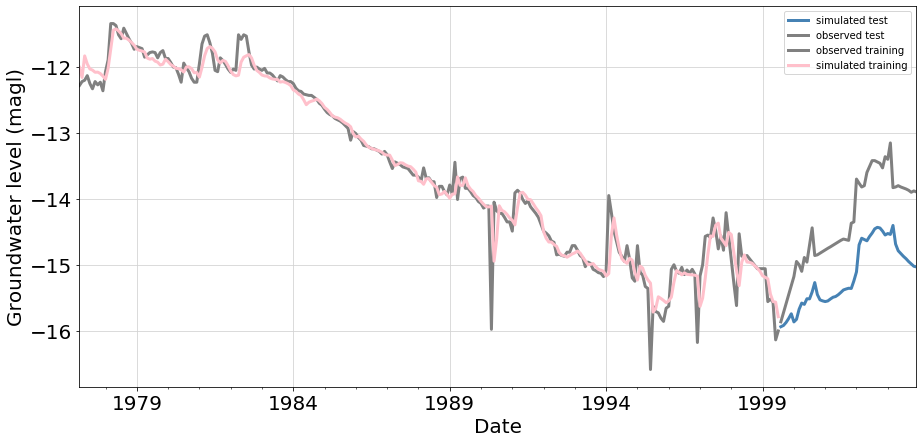

In [68]:
mse_lstm  = summary['mse_lstm'].mean(axis=0)
rmse_lstm = summary['rmse_lstm'].mean(axis=0)
mae_lstm  = summary['mae_lstm'].mean(axis=0)
r2_lstm   = summary['r2_lstm'].mean(axis=0)
stdv_lstm = stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_lstm, 3))
print("Mean squared error is:",round(mse_lstm,3))
print("Root mean squared error is:",round(rmse_lstm, 3))
print("Mean absolute error is:",round(mae_lstm,3))
print(round(stdv_lstm,3))


df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[269:322].index)
df1['observed test']      = pima.iloc[269:322, 0].values

df2 = pd.DataFrame(pima.iloc[0:269, 0].values, columns = ['observed training'],index =pima.iloc[0:269].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=3)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=3)
out_df['observed training'].plot(color='grey', linewidth=3)
out_df['simulated training'].plot(color='pink', linewidth=3)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(15,7)

In [69]:
y_gru = out_df['simulated test']

### FFNN

In [70]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_ff', 'rmse_ff', 'r2_ff','mae_ff'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    # Add fully connected layer with a ReLU activation function
    model.add(Dense(units=32, activation='relu', input_shape=(1,6)))

    # Add fully connected layer with a ReLU activation function
    model.add(Dense(units=32, activation='relu'))

    # Add fully connected layer with no activation function
    model.add(Dense(units=1))
    #model.add(Flatten())

    # Compile neural network
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_data=(X_val_reshaped, y_test),
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    
    X_val_reshaped = X_val_reshaped.reshape(53, 6)

    #running function
    gwl = -1.70694575
    test_forecast = X_test
    steps_ahead = 53
    y_pred = forecast(model, test_forecast, gwl, steps_ahead)
    y_pred = np.array(y_pred)

     #metrics for test
    y_ff = y_pred
    test_pred.append(y_ff)
    mse_ff = mean_squared_error(y_test, y_ff)
    rmse_ff = np.sqrt(mse_ff)
    r2_ff = r2_score(y_test, y_ff)
    mae_ff = mean_absolute_error(y_test, y_ff)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_ff,Round), round(rmse_ff,Round), round(r2_ff,Round),round(mae_ff,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')  

Running fold 1
(269, 6)
Train on 269 samples, validate on 53 samples
Epoch 1/1000
 96/269 [=========>....................] - ETA: 3s - loss: 0.9724 - mean_squared_error: 0.9724
Epoch 00001: val_loss improved from inf to 0.38370, saving model to model.h5
269/269 [==============================] - 7s 26ms/sample - loss: 0.9142 - mean_squared_error: 0.9142 - val_loss: 0.3837 - val_mean_squared_error: 0.3837
Epoch 2/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.6872 - mean_squared_error: 0.6872
Epoch 00002: val_loss improved from 0.38370 to 0.32162, saving model to model.h5
269/269 [==============================] - 0s 258us/sample - loss: 0.6421 - mean_squared_error: 0.6421 - val_loss: 0.3216 - val_mean_squared_error: 0.3216
Epoch 3/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.4970 - mean_squared_error: 0.4970
Epoch 00003: val_loss improved from 0.32162 to 0.27203, saving model to model.h5
269/269 [==============================] - 0s 197us/sample 

 96/269 [=========>....................] - ETA: 0s - loss: 0.0356 - mean_squared_error: 0.0356
Epoch 00026: val_loss did not improve from 0.14983
269/269 [==============================] - 0s 87us/sample - loss: 0.0509 - mean_squared_error: 0.0509 - val_loss: 0.2319 - val_mean_squared_error: 0.2319
Epoch 27/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0482 - mean_squared_error: 0.0482
Epoch 00027: val_loss did not improve from 0.14983
269/269 [==============================] - 0s 93us/sample - loss: 0.0484 - mean_squared_error: 0.0484 - val_loss: 0.2316 - val_mean_squared_error: 0.2316
Epoch 28/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0187 - mean_squared_error: 0.0187
Epoch 00028: val_loss did not improve from 0.14983
269/269 [==============================] - 0s 95us/sample - loss: 0.0461 - mean_squared_error: 0.0461 - val_loss: 0.2243 - val_mean_squared_error: 0.2243
Epoch 29/1000
 96/269 [=========>....................] - ETA: 0s - loss:

 96/269 [=========>....................] - ETA: 0s - loss: 0.0559 - mean_squared_error: 0.0559
Epoch 00052: val_loss did not improve from 0.14983
269/269 [==============================] - 0s 98us/sample - loss: 0.0481 - mean_squared_error: 0.0481 - val_loss: 0.2220 - val_mean_squared_error: 0.2220
Epoch 53/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0283 - mean_squared_error: 0.0283
Epoch 00053: val_loss did not improve from 0.14983
269/269 [==============================] - 0s 94us/sample - loss: 0.0452 - mean_squared_error: 0.0452 - val_loss: 0.2438 - val_mean_squared_error: 0.2438
Epoch 54/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0261 - mean_squared_error: 0.0261
Epoch 00054: val_loss did not improve from 0.14983
269/269 [==============================] - 0s 104us/sample - loss: 0.0445 - mean_squared_error: 0.0445 - val_loss: 0.2219 - val_mean_squared_error: 0.2219
Epoch 55/1000
 96/269 [=========>....................] - ETA: 0s - loss

 96/269 [=========>....................] - ETA: 0s - loss: 0.0157 - mean_squared_error: 0.0157
Epoch 00078: val_loss did not improve from 0.14983
269/269 [==============================] - 0s 88us/sample - loss: 0.0477 - mean_squared_error: 0.0477 - val_loss: 0.1854 - val_mean_squared_error: 0.1854
Epoch 79/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0309 - mean_squared_error: 0.0309
Epoch 00079: val_loss did not improve from 0.14983
269/269 [==============================] - 0s 85us/sample - loss: 0.0471 - mean_squared_error: 0.0471 - val_loss: 0.2177 - val_mean_squared_error: 0.2177
Epoch 80/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0473 - mean_squared_error: 0.0473
Epoch 00080: val_loss did not improve from 0.14983
269/269 [==============================] - 0s 89us/sample - loss: 0.0430 - mean_squared_error: 0.0430 - val_loss: 0.1956 - val_mean_squared_error: 0.1956
Epoch 81/1000
 96/269 [=========>....................] - ETA: 0s - loss:

 96/269 [=========>....................] - ETA: 0s - loss: 0.0510 - mean_squared_error: 0.0510
Epoch 00104: val_loss did not improve from 0.14983
269/269 [==============================] - 0s 107us/sample - loss: 0.0423 - mean_squared_error: 0.0423 - val_loss: 0.1861 - val_mean_squared_error: 0.1861
Epoch 105/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0300 - mean_squared_error: 0.0300
Epoch 00105: val_loss did not improve from 0.14983
269/269 [==============================] - 0s 106us/sample - loss: 0.0418 - mean_squared_error: 0.0418 - val_loss: 0.1703 - val_mean_squared_error: 0.1703
Epoch 106/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0696 - mean_squared_error: 0.0696
Epoch 00106: val_loss did not improve from 0.14983
269/269 [==============================] - 0s 108us/sample - loss: 0.0466 - mean_squared_error: 0.0466 - val_loss: 0.1818 - val_mean_squared_error: 0.1818
Epoch 107/1000
 96/269 [=========>....................] - ETA: 0s -

Epoch 21/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0460 - mean_squared_error: 0.0460
Epoch 00021: val_loss did not improve from 0.11951
269/269 [==============================] - 0s 103us/sample - loss: 0.0433 - mean_squared_error: 0.0433 - val_loss: 0.1655 - val_mean_squared_error: 0.1655
Epoch 22/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0258 - mean_squared_error: 0.0258
Epoch 00022: val_loss did not improve from 0.11951
269/269 [==============================] - 0s 102us/sample - loss: 0.0434 - mean_squared_error: 0.0434 - val_loss: 0.1954 - val_mean_squared_error: 0.1954
Epoch 23/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0382 - mean_squared_error: 0.0382
Epoch 00023: val_loss did not improve from 0.11951
269/269 [==============================] - 0s 102us/sample - loss: 0.0440 - mean_squared_error: 0.0440 - val_loss: 0.1432 - val_mean_squared_error: 0.1432
Epoch 24/1000
 96/269 [=========>....................] 

 96/269 [=========>....................] - ETA: 0s - loss: 0.0410 - mean_squared_error: 0.0410
Epoch 00047: val_loss did not improve from 0.11951
269/269 [==============================] - 0s 112us/sample - loss: 0.0415 - mean_squared_error: 0.0415 - val_loss: 0.1396 - val_mean_squared_error: 0.1396
Epoch 48/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0404 - mean_squared_error: 0.0404
Epoch 00048: val_loss did not improve from 0.11951
269/269 [==============================] - 0s 116us/sample - loss: 0.0436 - mean_squared_error: 0.0436 - val_loss: 0.1613 - val_mean_squared_error: 0.1613
Epoch 49/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0466 - mean_squared_error: 0.0466
Epoch 00049: val_loss did not improve from 0.11951
269/269 [==============================] - 0s 113us/sample - loss: 0.0417 - mean_squared_error: 0.0417 - val_loss: 0.1620 - val_mean_squared_error: 0.1620
Epoch 50/1000
 96/269 [=========>....................] - ETA: 0s - lo

 96/269 [=========>....................] - ETA: 0s - loss: 0.0332 - mean_squared_error: 0.0332
Epoch 00073: val_loss did not improve from 0.11951
269/269 [==============================] - 0s 114us/sample - loss: 0.0436 - mean_squared_error: 0.0436 - val_loss: 0.1614 - val_mean_squared_error: 0.1614
Epoch 74/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0300 - mean_squared_error: 0.0300
Epoch 00074: val_loss did not improve from 0.11951
269/269 [==============================] - 0s 113us/sample - loss: 0.0403 - mean_squared_error: 0.0403 - val_loss: 0.2124 - val_mean_squared_error: 0.2124
Epoch 75/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0238 - mean_squared_error: 0.0238
Epoch 00075: val_loss did not improve from 0.11951
269/269 [==============================] - 0s 98us/sample - loss: 0.0428 - mean_squared_error: 0.0428 - val_loss: 0.2012 - val_mean_squared_error: 0.2012
Epoch 76/1000
 96/269 [=========>....................] - ETA: 0s - los

 96/269 [=========>....................] - ETA: 0s - loss: 0.0529 - mean_squared_error: 0.0529
Epoch 00099: val_loss did not improve from 0.11951
269/269 [==============================] - 0s 393us/sample - loss: 0.0451 - mean_squared_error: 0.0451 - val_loss: 0.1898 - val_mean_squared_error: 0.1898
Epoch 100/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0393 - mean_squared_error: 0.0393
Epoch 00100: val_loss did not improve from 0.11951
269/269 [==============================] - 0s 243us/sample - loss: 0.0431 - mean_squared_error: 0.0431 - val_loss: 0.1506 - val_mean_squared_error: 0.1506
Epoch 101/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0489 - mean_squared_error: 0.0489
Epoch 00101: val_loss did not improve from 0.11951
269/269 [==============================] - 0s 384us/sample - loss: 0.0439 - mean_squared_error: 0.0439 - val_loss: 0.1364 - val_mean_squared_error: 0.1364
Epoch 102/1000
 96/269 [=========>....................] - ETA: 0s -

 96/269 [=========>....................] - ETA: 0s - loss: 0.0381 - mean_squared_error: 0.0381
Epoch 00020: val_loss did not improve from 0.10190
269/269 [==============================] - 0s 107us/sample - loss: 0.0468 - mean_squared_error: 0.0468 - val_loss: 0.1422 - val_mean_squared_error: 0.1422
Epoch 21/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0400 - mean_squared_error: 0.0400
Epoch 00021: val_loss did not improve from 0.10190
269/269 [==============================] - 0s 105us/sample - loss: 0.0439 - mean_squared_error: 0.0439 - val_loss: 0.1446 - val_mean_squared_error: 0.1446
Epoch 22/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0280 - mean_squared_error: 0.0280
Epoch 00022: val_loss did not improve from 0.10190
269/269 [==============================] - 0s 120us/sample - loss: 0.0400 - mean_squared_error: 0.0400 - val_loss: 0.1970 - val_mean_squared_error: 0.1970
Epoch 23/1000
 96/269 [=========>....................] - ETA: 0s - lo

Epoch 46/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0337 - mean_squared_error: 0.0337
Epoch 00046: val_loss did not improve from 0.09706
269/269 [==============================] - 0s 126us/sample - loss: 0.0413 - mean_squared_error: 0.0413 - val_loss: 0.1792 - val_mean_squared_error: 0.1792
Epoch 47/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0456 - mean_squared_error: 0.0456
Epoch 00047: val_loss improved from 0.09706 to 0.09358, saving model to model.h5
269/269 [==============================] - 0s 319us/sample - loss: 0.0503 - mean_squared_error: 0.0503 - val_loss: 0.0936 - val_mean_squared_error: 0.0936
Epoch 48/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0364 - mean_squared_error: 0.0364
Epoch 00048: val_loss did not improve from 0.09358
269/269 [==============================] - 0s 104us/sample - loss: 0.0440 - mean_squared_error: 0.0440 - val_loss: 0.2313 - val_mean_squared_error: 0.2313
Epoch 49/1000
 96/269 [==

Epoch 72/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0291 - mean_squared_error: 0.0291
Epoch 00072: val_loss did not improve from 0.09358
269/269 [==============================] - 0s 119us/sample - loss: 0.0440 - mean_squared_error: 0.0440 - val_loss: 0.1221 - val_mean_squared_error: 0.1221
Epoch 73/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0290 - mean_squared_error: 0.0290
Epoch 00073: val_loss did not improve from 0.09358
269/269 [==============================] - 0s 154us/sample - loss: 0.0433 - mean_squared_error: 0.0433 - val_loss: 0.2072 - val_mean_squared_error: 0.2072
Epoch 74/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0327 - mean_squared_error: 0.0327
Epoch 00074: val_loss did not improve from 0.09358
269/269 [==============================] - 0s 106us/sample - loss: 0.0431 - mean_squared_error: 0.0431 - val_loss: 0.1195 - val_mean_squared_error: 0.1195
Epoch 75/1000
 96/269 [=========>....................] 

Epoch 98/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0299 - mean_squared_error: 0.0299
Epoch 00098: val_loss did not improve from 0.09280
269/269 [==============================] - 0s 191us/sample - loss: 0.0420 - mean_squared_error: 0.0420 - val_loss: 0.1687 - val_mean_squared_error: 0.1687
Epoch 99/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0506 - mean_squared_error: 0.0506
Epoch 00099: val_loss did not improve from 0.09280
269/269 [==============================] - 0s 145us/sample - loss: 0.0418 - mean_squared_error: 0.0418 - val_loss: 0.1475 - val_mean_squared_error: 0.1475
Epoch 100/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0406 - mean_squared_error: 0.0406
Epoch 00100: val_loss did not improve from 0.09280
269/269 [==============================] - 0s 107us/sample - loss: 0.0427 - mean_squared_error: 0.0427 - val_loss: 0.1308 - val_mean_squared_error: 0.1308
Epoch 101/1000
 96/269 [=========>....................

Epoch 124/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0474 - mean_squared_error: 0.0474
Epoch 00124: val_loss did not improve from 0.07967
269/269 [==============================] - 0s 111us/sample - loss: 0.0379 - mean_squared_error: 0.0379 - val_loss: 0.1162 - val_mean_squared_error: 0.1162
Epoch 125/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0371 - mean_squared_error: 0.0371
Epoch 00125: val_loss did not improve from 0.07967
269/269 [==============================] - 0s 153us/sample - loss: 0.0393 - mean_squared_error: 0.0393 - val_loss: 0.1318 - val_mean_squared_error: 0.1318
Epoch 126/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0252 - mean_squared_error: 0.0252
Epoch 00126: val_loss did not improve from 0.07967
269/269 [==============================] - 0s 117us/sample - loss: 0.0434 - mean_squared_error: 0.0434 - val_loss: 0.1025 - val_mean_squared_error: 0.1025
Epoch 127/1000
 96/269 [=========>..................

Epoch 150/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0482 - mean_squared_error: 0.0482
Epoch 00150: val_loss did not improve from 0.07967
269/269 [==============================] - 0s 114us/sample - loss: 0.0414 - mean_squared_error: 0.0414 - val_loss: 0.1482 - val_mean_squared_error: 0.1482
Epoch 151/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0290 - mean_squared_error: 0.0290
Epoch 00151: val_loss did not improve from 0.07967
269/269 [==============================] - 0s 117us/sample - loss: 0.0410 - mean_squared_error: 0.0410 - val_loss: 0.1205 - val_mean_squared_error: 0.1205
Epoch 152/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0408 - mean_squared_error: 0.0408
Epoch 00152: val_loss did not improve from 0.07967
269/269 [==============================] - 0s 113us/sample - loss: 0.0382 - mean_squared_error: 0.0382 - val_loss: 0.1693 - val_mean_squared_error: 0.1693
Epoch 153/1000
 96/269 [=========>..................

Epoch 176/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0390 - mean_squared_error: 0.0390
Epoch 00176: val_loss did not improve from 0.07967
269/269 [==============================] - 0s 117us/sample - loss: 0.0437 - mean_squared_error: 0.0437 - val_loss: 0.1522 - val_mean_squared_error: 0.1522
Epoch 177/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0265 - mean_squared_error: 0.0265
Epoch 00177: val_loss did not improve from 0.07967
269/269 [==============================] - 0s 121us/sample - loss: 0.0408 - mean_squared_error: 0.0408 - val_loss: 0.1335 - val_mean_squared_error: 0.1335
Epoch 178/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0428 - mean_squared_error: 0.0428
Epoch 00178: val_loss did not improve from 0.07967
269/269 [==============================] - 0s 126us/sample - loss: 0.0386 - mean_squared_error: 0.0386 - val_loss: 0.1177 - val_mean_squared_error: 0.1177
Epoch 179/1000
 96/269 [=========>..................

Epoch 202/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0592 - mean_squared_error: 0.0592
Epoch 00202: val_loss did not improve from 0.07967
269/269 [==============================] - 0s 108us/sample - loss: 0.0447 - mean_squared_error: 0.0447 - val_loss: 0.1832 - val_mean_squared_error: 0.1832
Epoch 203/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0599 - mean_squared_error: 0.0599
Epoch 00203: val_loss did not improve from 0.07967
269/269 [==============================] - 0s 115us/sample - loss: 0.0457 - mean_squared_error: 0.0457 - val_loss: 0.1552 - val_mean_squared_error: 0.1552
Epoch 204/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0395 - mean_squared_error: 0.0395
Epoch 00204: val_loss did not improve from 0.07967
269/269 [==============================] - 0s 115us/sample - loss: 0.0420 - mean_squared_error: 0.0420 - val_loss: 0.1662 - val_mean_squared_error: 0.1662
Epoch 205/1000
 96/269 [=========>..................

Epoch 12/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0265 - mean_squared_error: 0.0265
Epoch 00012: val_loss did not improve from 0.08979
269/269 [==============================] - 0s 134us/sample - loss: 0.0449 - mean_squared_error: 0.0449 - val_loss: 0.0971 - val_mean_squared_error: 0.0971
Epoch 13/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0717 - mean_squared_error: 0.0717
Epoch 00013: val_loss did not improve from 0.08979
269/269 [==============================] - 0s 132us/sample - loss: 0.0416 - mean_squared_error: 0.0416 - val_loss: 0.0932 - val_mean_squared_error: 0.0932
Epoch 14/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0634 - mean_squared_error: 0.0634
Epoch 00014: val_loss did not improve from 0.08979
269/269 [==============================] - 0s 132us/sample - loss: 0.0510 - mean_squared_error: 0.0510 - val_loss: 0.1170 - val_mean_squared_error: 0.1170
Epoch 15/1000
 96/269 [=========>....................] 

Epoch 38/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0579 - mean_squared_error: 0.0579
Epoch 00038: val_loss did not improve from 0.08002
269/269 [==============================] - 0s 109us/sample - loss: 0.0412 - mean_squared_error: 0.0412 - val_loss: 0.1086 - val_mean_squared_error: 0.1086
Epoch 39/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0398 - mean_squared_error: 0.0398
Epoch 00039: val_loss did not improve from 0.08002
269/269 [==============================] - 0s 118us/sample - loss: 0.0411 - mean_squared_error: 0.0411 - val_loss: 0.1388 - val_mean_squared_error: 0.1388
Epoch 40/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0349 - mean_squared_error: 0.0349
Epoch 00040: val_loss did not improve from 0.08002
269/269 [==============================] - 0s 113us/sample - loss: 0.0409 - mean_squared_error: 0.0409 - val_loss: 0.1352 - val_mean_squared_error: 0.1352
Epoch 41/1000
 96/269 [=========>....................] 

Epoch 64/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0427 - mean_squared_error: 0.0427
Epoch 00064: val_loss did not improve from 0.08000
269/269 [==============================] - 0s 135us/sample - loss: 0.0516 - mean_squared_error: 0.0516 - val_loss: 0.0890 - val_mean_squared_error: 0.0890
Epoch 65/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0216 - mean_squared_error: 0.0216
Epoch 00065: val_loss did not improve from 0.08000
269/269 [==============================] - 0s 134us/sample - loss: 0.0464 - mean_squared_error: 0.0464 - val_loss: 0.0885 - val_mean_squared_error: 0.0885
Epoch 66/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0756 - mean_squared_error: 0.0756
Epoch 00066: val_loss did not improve from 0.08000
269/269 [==============================] - 0s 124us/sample - loss: 0.0485 - mean_squared_error: 0.0485 - val_loss: 0.1176 - val_mean_squared_error: 0.1176
Epoch 67/1000
 96/269 [=========>....................] 

 96/269 [=========>....................] - ETA: 0s - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 00090: val_loss did not improve from 0.08000
269/269 [==============================] - 0s 118us/sample - loss: 0.0407 - mean_squared_error: 0.0407 - val_loss: 0.1290 - val_mean_squared_error: 0.1290
Epoch 91/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0440 - mean_squared_error: 0.0440
Epoch 00091: val_loss did not improve from 0.08000
269/269 [==============================] - 0s 130us/sample - loss: 0.0439 - mean_squared_error: 0.0439 - val_loss: 0.1334 - val_mean_squared_error: 0.1334
Epoch 92/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0492 - mean_squared_error: 0.0492
Epoch 00092: val_loss did not improve from 0.08000
269/269 [==============================] - 0s 156us/sample - loss: 0.0459 - mean_squared_error: 0.0459 - val_loss: 0.1531 - val_mean_squared_error: 0.1531
Epoch 93/1000
 96/269 [=========>....................] - ETA: 0s - lo

Epoch 116/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0609 - mean_squared_error: 0.0609
Epoch 00116: val_loss did not improve from 0.07926
269/269 [==============================] - 0s 150us/sample - loss: 0.0443 - mean_squared_error: 0.0443 - val_loss: 0.1746 - val_mean_squared_error: 0.1746
Epoch 117/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0270 - mean_squared_error: 0.0270
Epoch 00117: val_loss did not improve from 0.07926
269/269 [==============================] - 0s 159us/sample - loss: 0.0373 - mean_squared_error: 0.0373 - val_loss: 0.0921 - val_mean_squared_error: 0.0921
Epoch 118/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0477 - mean_squared_error: 0.0477
Epoch 00118: val_loss did not improve from 0.07926
269/269 [==============================] - 0s 206us/sample - loss: 0.0446 - mean_squared_error: 0.0446 - val_loss: 0.2115 - val_mean_squared_error: 0.2115
Epoch 119/1000
 96/269 [=========>..................

Epoch 142/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0676 - mean_squared_error: 0.0676
Epoch 00142: val_loss did not improve from 0.06582
269/269 [==============================] - 0s 224us/sample - loss: 0.0516 - mean_squared_error: 0.0516 - val_loss: 0.1367 - val_mean_squared_error: 0.1367
Epoch 143/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 00143: val_loss did not improve from 0.06582
269/269 [==============================] - 0s 292us/sample - loss: 0.0462 - mean_squared_error: 0.0462 - val_loss: 0.1096 - val_mean_squared_error: 0.1096
Epoch 144/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0292 - mean_squared_error: 0.0292
Epoch 00144: val_loss did not improve from 0.06582
269/269 [==============================] - 0s 331us/sample - loss: 0.0395 - mean_squared_error: 0.0395 - val_loss: 0.1568 - val_mean_squared_error: 0.1568
Epoch 145/1000
192/269 [====================>.......

Epoch 168/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0625 - mean_squared_error: 0.0625
Epoch 00168: val_loss did not improve from 0.06582
269/269 [==============================] - 0s 207us/sample - loss: 0.0432 - mean_squared_error: 0.0432 - val_loss: 0.1941 - val_mean_squared_error: 0.1941
Epoch 169/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0401 - mean_squared_error: 0.0401
Epoch 00169: val_loss did not improve from 0.06582
269/269 [==============================] - 0s 244us/sample - loss: 0.0454 - mean_squared_error: 0.0454 - val_loss: 0.1044 - val_mean_squared_error: 0.1044
Epoch 170/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0380 - mean_squared_error: 0.0380
Epoch 00170: val_loss did not improve from 0.06582
269/269 [==============================] - 0s 193us/sample - loss: 0.0454 - mean_squared_error: 0.0454 - val_loss: 0.0852 - val_mean_squared_error: 0.0852
Epoch 171/1000
 96/269 [=========>..................

Epoch 194/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0357 - mean_squared_error: 0.0357
Epoch 00194: val_loss did not improve from 0.06582
269/269 [==============================] - 0s 149us/sample - loss: 0.0396 - mean_squared_error: 0.0396 - val_loss: 0.0899 - val_mean_squared_error: 0.0899
Epoch 195/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0452 - mean_squared_error: 0.0452
Epoch 00195: val_loss did not improve from 0.06582
269/269 [==============================] - 0s 136us/sample - loss: 0.0442 - mean_squared_error: 0.0442 - val_loss: 0.1272 - val_mean_squared_error: 0.1272
Epoch 196/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0309 - mean_squared_error: 0.0309
Epoch 00196: val_loss did not improve from 0.06582
269/269 [==============================] - 0s 177us/sample - loss: 0.0438 - mean_squared_error: 0.0438 - val_loss: 0.1528 - val_mean_squared_error: 0.1528
Epoch 197/1000
 96/269 [=========>..................

Epoch 220/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0314 - mean_squared_error: 0.0314
Epoch 00220: val_loss did not improve from 0.06582
269/269 [==============================] - 0s 151us/sample - loss: 0.0391 - mean_squared_error: 0.0391 - val_loss: 0.1029 - val_mean_squared_error: 0.1029
Epoch 221/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0518 - mean_squared_error: 0.0518
Epoch 00221: val_loss did not improve from 0.06582
269/269 [==============================] - 0s 141us/sample - loss: 0.0403 - mean_squared_error: 0.0403 - val_loss: 0.1025 - val_mean_squared_error: 0.1025
Epoch 222/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0376 - mean_squared_error: 0.0376
Epoch 00222: val_loss did not improve from 0.06582
269/269 [==============================] - 0s 155us/sample - loss: 0.0398 - mean_squared_error: 0.0398 - val_loss: 0.0858 - val_mean_squared_error: 0.0858
Epoch 223/1000
 96/269 [=========>..................

 96/269 [=========>....................] - ETA: 0s - loss: 0.5244 - mean_squared_error: 0.5244
Epoch 00007: val_loss did not improve from 0.10617
269/269 [==============================] - 0s 118us/sample - loss: 0.5852 - mean_squared_error: 0.5852 - val_loss: 0.1220 - val_mean_squared_error: 0.1220
Epoch 8/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.5227 - mean_squared_error: 0.5227
Epoch 00008: val_loss did not improve from 0.10617
269/269 [==============================] - 0s 124us/sample - loss: 0.5650 - mean_squared_error: 0.5650 - val_loss: 0.1357 - val_mean_squared_error: 0.1357
Epoch 9/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.5841 - mean_squared_error: 0.5841
Epoch 00009: val_loss improved from 0.10617 to 0.08105, saving model to model.h5
269/269 [==============================] - 0s 391us/sample - loss: 0.5451 - mean_squared_error: 0.5451 - val_loss: 0.0811 - val_mean_squared_error: 0.0811
Epoch 10/1000
 96/269 [=========>........

Epoch 33/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0315 - mean_squared_error: 0.0315
Epoch 00033: val_loss did not improve from 0.07013
269/269 [==============================] - 0s 209us/sample - loss: 0.0455 - mean_squared_error: 0.0455 - val_loss: 0.1007 - val_mean_squared_error: 0.1007
Epoch 34/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0567 - mean_squared_error: 0.0567
Epoch 00034: val_loss did not improve from 0.07013
269/269 [==============================] - 0s 122us/sample - loss: 0.0394 - mean_squared_error: 0.0394 - val_loss: 0.1754 - val_mean_squared_error: 0.1754
Epoch 35/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0385 - mean_squared_error: 0.0385
Epoch 00035: val_loss did not improve from 0.07013
269/269 [==============================] - 0s 119us/sample - loss: 0.0489 - mean_squared_error: 0.0489 - val_loss: 0.0826 - val_mean_squared_error: 0.0826
Epoch 36/1000
 96/269 [=========>....................] 

Epoch 59/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0569 - mean_squared_error: 0.0569
Epoch 00059: val_loss did not improve from 0.05798
269/269 [==============================] - 0s 124us/sample - loss: 0.0472 - mean_squared_error: 0.0472 - val_loss: 0.1101 - val_mean_squared_error: 0.1101
Epoch 60/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0260 - mean_squared_error: 0.0260
Epoch 00060: val_loss did not improve from 0.05798
269/269 [==============================] - 0s 119us/sample - loss: 0.0405 - mean_squared_error: 0.0405 - val_loss: 0.1446 - val_mean_squared_error: 0.1446
Epoch 61/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0420 - mean_squared_error: 0.0420
Epoch 00061: val_loss did not improve from 0.05798
269/269 [==============================] - 0s 123us/sample - loss: 0.0398 - mean_squared_error: 0.0398 - val_loss: 0.1200 - val_mean_squared_error: 0.1200
Epoch 62/1000
 96/269 [=========>....................] 

 96/269 [=========>....................] - ETA: 0s - loss: 0.0284 - mean_squared_error: 0.0284
Epoch 00085: val_loss did not improve from 0.05798
269/269 [==============================] - 0s 194us/sample - loss: 0.0430 - mean_squared_error: 0.0430 - val_loss: 0.0954 - val_mean_squared_error: 0.0954
Epoch 86/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0547 - mean_squared_error: 0.0547
Epoch 00086: val_loss did not improve from 0.05798
269/269 [==============================] - 0s 189us/sample - loss: 0.0463 - mean_squared_error: 0.0463 - val_loss: 0.1106 - val_mean_squared_error: 0.1106
Epoch 87/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0639 - mean_squared_error: 0.0639
Epoch 00087: val_loss did not improve from 0.05798
269/269 [==============================] - 0s 199us/sample - loss: 0.0418 - mean_squared_error: 0.0418 - val_loss: 0.1036 - val_mean_squared_error: 0.1036
Epoch 88/1000
 96/269 [=========>....................] - ETA: 0s - lo

 96/269 [=========>....................] - ETA: 0s - loss: 0.0462 - mean_squared_error: 0.0462
Epoch 00111: val_loss did not improve from 0.05798
269/269 [==============================] - 0s 129us/sample - loss: 0.0403 - mean_squared_error: 0.0403 - val_loss: 0.1449 - val_mean_squared_error: 0.1449
Epoch 112/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0603 - mean_squared_error: 0.0603
Epoch 00112: val_loss did not improve from 0.05798
269/269 [==============================] - 0s 135us/sample - loss: 0.0426 - mean_squared_error: 0.0426 - val_loss: 0.1105 - val_mean_squared_error: 0.1105
Epoch 113/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0370 - mean_squared_error: 0.0370
Epoch 00113: val_loss did not improve from 0.05798
269/269 [==============================] - 0s 140us/sample - loss: 0.0399 - mean_squared_error: 0.0399 - val_loss: 0.1071 - val_mean_squared_error: 0.1071
Epoch 114/1000
 96/269 [=========>....................] - ETA: 0s -

Epoch 137/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0593 - mean_squared_error: 0.0593
Epoch 00137: val_loss did not improve from 0.05798
269/269 [==============================] - 0s 126us/sample - loss: 0.0464 - mean_squared_error: 0.0464 - val_loss: 0.1046 - val_mean_squared_error: 0.1046
Epoch 138/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0464 - mean_squared_error: 0.0464
Epoch 00138: val_loss did not improve from 0.05798
269/269 [==============================] - 0s 124us/sample - loss: 0.0430 - mean_squared_error: 0.0430 - val_loss: 0.0798 - val_mean_squared_error: 0.0798
Epoch 139/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0253 - mean_squared_error: 0.0253
Epoch 00139: val_loss did not improve from 0.05798
269/269 [==============================] - 0s 139us/sample - loss: 0.0419 - mean_squared_error: 0.0419 - val_loss: 0.0669 - val_mean_squared_error: 0.0669
Epoch 140/1000
 96/269 [=========>..................

Epoch 15/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0231 - mean_squared_error: 0.0231
Epoch 00015: val_loss did not improve from 0.07041
269/269 [==============================] - 0s 125us/sample - loss: 0.0430 - mean_squared_error: 0.0430 - val_loss: 0.2045 - val_mean_squared_error: 0.2045
Epoch 16/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0412 - mean_squared_error: 0.0412
Epoch 00016: val_loss improved from 0.07041 to 0.06051, saving model to model.h5
269/269 [==============================] - 0s 452us/sample - loss: 0.0442 - mean_squared_error: 0.0442 - val_loss: 0.0605 - val_mean_squared_error: 0.0605
Epoch 17/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0526 - mean_squared_error: 0.0526
Epoch 00017: val_loss did not improve from 0.06051
269/269 [==============================] - 0s 131us/sample - loss: 0.0481 - mean_squared_error: 0.0481 - val_loss: 0.0644 - val_mean_squared_error: 0.0644
Epoch 18/1000
 96/269 [==

Epoch 41/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0542 - mean_squared_error: 0.0542
Epoch 00041: val_loss did not improve from 0.05340
269/269 [==============================] - 0s 128us/sample - loss: 0.0505 - mean_squared_error: 0.0505 - val_loss: 0.1429 - val_mean_squared_error: 0.1429
Epoch 42/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0490 - mean_squared_error: 0.0490
Epoch 00042: val_loss did not improve from 0.05340
269/269 [==============================] - 0s 142us/sample - loss: 0.0413 - mean_squared_error: 0.0413 - val_loss: 0.0835 - val_mean_squared_error: 0.0835
Epoch 43/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0268 - mean_squared_error: 0.0268
Epoch 00043: val_loss did not improve from 0.05340
269/269 [==============================] - 0s 131us/sample - loss: 0.0412 - mean_squared_error: 0.0412 - val_loss: 0.0582 - val_mean_squared_error: 0.0582
Epoch 44/1000
 96/269 [=========>....................] 

 96/269 [=========>....................] - ETA: 0s - loss: 0.0318 - mean_squared_error: 0.0318
Epoch 00067: val_loss did not improve from 0.05340
269/269 [==============================] - 0s 137us/sample - loss: 0.0399 - mean_squared_error: 0.0399 - val_loss: 0.0795 - val_mean_squared_error: 0.0795
Epoch 68/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0543 - mean_squared_error: 0.0543
Epoch 00068: val_loss did not improve from 0.05340
269/269 [==============================] - 0s 141us/sample - loss: 0.0521 - mean_squared_error: 0.0521 - val_loss: 0.1247 - val_mean_squared_error: 0.1247
Epoch 69/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0468 - mean_squared_error: 0.0468
Epoch 00069: val_loss did not improve from 0.05340
269/269 [==============================] - 0s 135us/sample - loss: 0.0453 - mean_squared_error: 0.0453 - val_loss: 0.1478 - val_mean_squared_error: 0.1478
Epoch 70/1000
 96/269 [=========>....................] - ETA: 0s - lo

 96/269 [=========>....................] - ETA: 0s - loss: 0.0473 - mean_squared_error: 0.0473
Epoch 00093: val_loss did not improve from 0.05340
269/269 [==============================] - 0s 153us/sample - loss: 0.0450 - mean_squared_error: 0.0450 - val_loss: 0.1700 - val_mean_squared_error: 0.1700
Epoch 94/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0657 - mean_squared_error: 0.0657
Epoch 00094: val_loss did not improve from 0.05340
269/269 [==============================] - 0s 142us/sample - loss: 0.0522 - mean_squared_error: 0.0522 - val_loss: 0.1068 - val_mean_squared_error: 0.1068
Epoch 95/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0256 - mean_squared_error: 0.0256
Epoch 00095: val_loss did not improve from 0.05340
269/269 [==============================] - 0s 132us/sample - loss: 0.0465 - mean_squared_error: 0.0465 - val_loss: 0.1644 - val_mean_squared_error: 0.1644
Epoch 96/1000
 96/269 [=========>....................] - ETA: 0s - lo

Epoch 119/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0390 - mean_squared_error: 0.0390
Epoch 00119: val_loss did not improve from 0.05340
269/269 [==============================] - 0s 137us/sample - loss: 0.0459 - mean_squared_error: 0.0459 - val_loss: 0.1928 - val_mean_squared_error: 0.1928
Epoch 120/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0545 - mean_squared_error: 0.0545
Epoch 00120: val_loss did not improve from 0.05340
269/269 [==============================] - 0s 142us/sample - loss: 0.0403 - mean_squared_error: 0.0403 - val_loss: 0.0871 - val_mean_squared_error: 0.0871
Epoch 121/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0494 - mean_squared_error: 0.0494
Epoch 00121: val_loss did not improve from 0.05340
269/269 [==============================] - 0s 130us/sample - loss: 0.0395 - mean_squared_error: 0.0395 - val_loss: 0.0730 - val_mean_squared_error: 0.0730
Epoch 122/1000
 96/269 [=========>..................

 96/269 [=========>....................] - ETA: 0s - loss: 0.0349 - mean_squared_error: 0.0349
Epoch 00009: val_loss did not improve from 0.13212
269/269 [==============================] - 0s 140us/sample - loss: 0.0501 - mean_squared_error: 0.0501 - val_loss: 0.1502 - val_mean_squared_error: 0.1502
Epoch 10/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0407 - mean_squared_error: 0.0407
Epoch 00010: val_loss did not improve from 0.13212
269/269 [==============================] - 0s 138us/sample - loss: 0.0533 - mean_squared_error: 0.0533 - val_loss: 0.1376 - val_mean_squared_error: 0.1376
Epoch 11/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0543 - mean_squared_error: 0.0543
Epoch 00011: val_loss did not improve from 0.13212
269/269 [==============================] - 0s 135us/sample - loss: 0.0455 - mean_squared_error: 0.0455 - val_loss: 0.2152 - val_mean_squared_error: 0.2152
Epoch 12/1000
 96/269 [=========>....................] - ETA: 0s - lo

Epoch 35/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0535 - mean_squared_error: 0.0535
Epoch 00035: val_loss did not improve from 0.07222
269/269 [==============================] - 0s 139us/sample - loss: 0.0500 - mean_squared_error: 0.0500 - val_loss: 0.1643 - val_mean_squared_error: 0.1643
Epoch 36/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0404 - mean_squared_error: 0.0404
Epoch 00036: val_loss did not improve from 0.07222
269/269 [==============================] - 0s 141us/sample - loss: 0.0366 - mean_squared_error: 0.0366 - val_loss: 0.1018 - val_mean_squared_error: 0.1018
Epoch 37/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0341 - mean_squared_error: 0.0341
Epoch 00037: val_loss did not improve from 0.07222
269/269 [==============================] - 0s 143us/sample - loss: 0.0458 - mean_squared_error: 0.0458 - val_loss: 0.1621 - val_mean_squared_error: 0.1621
Epoch 38/1000
 96/269 [=========>....................] 

 96/269 [=========>....................] - ETA: 0s - loss: 0.0357 - mean_squared_error: 0.0357
Epoch 00061: val_loss did not improve from 0.07222
269/269 [==============================] - 0s 141us/sample - loss: 0.0564 - mean_squared_error: 0.0564 - val_loss: 0.0744 - val_mean_squared_error: 0.0744
Epoch 62/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0493 - mean_squared_error: 0.0493
Epoch 00062: val_loss did not improve from 0.07222
269/269 [==============================] - 0s 153us/sample - loss: 0.0409 - mean_squared_error: 0.0409 - val_loss: 0.1126 - val_mean_squared_error: 0.1126
Epoch 63/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0531 - mean_squared_error: 0.0531
Epoch 00063: val_loss did not improve from 0.07222
269/269 [==============================] - 0s 142us/sample - loss: 0.0442 - mean_squared_error: 0.0442 - val_loss: 0.0999 - val_mean_squared_error: 0.0999
Epoch 64/1000
 96/269 [=========>....................] - ETA: 0s - lo

Epoch 87/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0688 - mean_squared_error: 0.0688
Epoch 00087: val_loss did not improve from 0.05723
269/269 [==============================] - 0s 225us/sample - loss: 0.0443 - mean_squared_error: 0.0443 - val_loss: 0.1436 - val_mean_squared_error: 0.1436
Epoch 88/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0274 - mean_squared_error: 0.0274
Epoch 00088: val_loss did not improve from 0.05723
269/269 [==============================] - 0s 226us/sample - loss: 0.0469 - mean_squared_error: 0.0469 - val_loss: 0.0827 - val_mean_squared_error: 0.0827
Epoch 89/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0608 - mean_squared_error: 0.0608
Epoch 00089: val_loss did not improve from 0.05723
269/269 [==============================] - 0s 233us/sample - loss: 0.0520 - mean_squared_error: 0.0520 - val_loss: 0.1147 - val_mean_squared_error: 0.1147
Epoch 90/1000
 96/269 [=========>....................] 

Epoch 113/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0488 - mean_squared_error: 0.0488
Epoch 00113: val_loss did not improve from 0.05723
269/269 [==============================] - 0s 171us/sample - loss: 0.0468 - mean_squared_error: 0.0468 - val_loss: 0.1383 - val_mean_squared_error: 0.1383
Epoch 114/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0559 - mean_squared_error: 0.0559
Epoch 00114: val_loss did not improve from 0.05723
269/269 [==============================] - 0s 155us/sample - loss: 0.0559 - mean_squared_error: 0.0559 - val_loss: 0.0704 - val_mean_squared_error: 0.0704
Epoch 115/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0519 - mean_squared_error: 0.0519
Epoch 00115: val_loss did not improve from 0.05723
269/269 [==============================] - 0s 164us/sample - loss: 0.0435 - mean_squared_error: 0.0435 - val_loss: 0.1352 - val_mean_squared_error: 0.1352
Epoch 116/1000
 96/269 [=========>..................

Epoch 139/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0273 - mean_squared_error: 0.0273
Epoch 00139: val_loss did not improve from 0.05723
269/269 [==============================] - 0s 182us/sample - loss: 0.0416 - mean_squared_error: 0.0416 - val_loss: 0.0828 - val_mean_squared_error: 0.0828
Epoch 140/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0624 - mean_squared_error: 0.0624
Epoch 00140: val_loss did not improve from 0.05723
269/269 [==============================] - 0s 193us/sample - loss: 0.0433 - mean_squared_error: 0.0433 - val_loss: 0.0920 - val_mean_squared_error: 0.0920
Epoch 141/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0668 - mean_squared_error: 0.0668
Epoch 00141: val_loss did not improve from 0.05723
269/269 [==============================] - 0s 184us/sample - loss: 0.0493 - mean_squared_error: 0.0493 - val_loss: 0.1116 - val_mean_squared_error: 0.1116
Epoch 142/1000
 96/269 [=========>..................

Epoch 165/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0389 - mean_squared_error: 0.0389
Epoch 00165: val_loss did not improve from 0.05632
269/269 [==============================] - 0s 256us/sample - loss: 0.0447 - mean_squared_error: 0.0447 - val_loss: 0.0746 - val_mean_squared_error: 0.0746
Epoch 166/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0556 - mean_squared_error: 0.0556
Epoch 00166: val_loss did not improve from 0.05632
269/269 [==============================] - 0s 237us/sample - loss: 0.0464 - mean_squared_error: 0.0464 - val_loss: 0.1014 - val_mean_squared_error: 0.1014
Epoch 167/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0275 - mean_squared_error: 0.0275
Epoch 00167: val_loss did not improve from 0.05632
269/269 [==============================] - 0s 318us/sample - loss: 0.0436 - mean_squared_error: 0.0436 - val_loss: 0.1086 - val_mean_squared_error: 0.1086
Epoch 168/1000
 96/269 [=========>..................

Epoch 191/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0417 - mean_squared_error: 0.0417
Epoch 00191: val_loss did not improve from 0.05561
269/269 [==============================] - 0s 169us/sample - loss: 0.0476 - mean_squared_error: 0.0476 - val_loss: 0.1553 - val_mean_squared_error: 0.1553
Epoch 192/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 00192: val_loss did not improve from 0.05561
269/269 [==============================] - 0s 160us/sample - loss: 0.0406 - mean_squared_error: 0.0406 - val_loss: 0.0677 - val_mean_squared_error: 0.0677
Epoch 193/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0333 - mean_squared_error: 0.0333
Epoch 00193: val_loss did not improve from 0.05561
269/269 [==============================] - 0s 202us/sample - loss: 0.0398 - mean_squared_error: 0.0398 - val_loss: 0.1233 - val_mean_squared_error: 0.1233
Epoch 194/1000
 96/269 [=========>..................

Epoch 217/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0474 - mean_squared_error: 0.0474
Epoch 00217: val_loss did not improve from 0.05284
269/269 [==============================] - 0s 210us/sample - loss: 0.0417 - mean_squared_error: 0.0417 - val_loss: 0.1197 - val_mean_squared_error: 0.1197
Epoch 218/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0401 - mean_squared_error: 0.0401
Epoch 00218: val_loss did not improve from 0.05284
269/269 [==============================] - 0s 188us/sample - loss: 0.0393 - mean_squared_error: 0.0393 - val_loss: 0.0842 - val_mean_squared_error: 0.0842
Epoch 219/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0452 - mean_squared_error: 0.0452
Epoch 00219: val_loss did not improve from 0.05284
269/269 [==============================] - 0s 179us/sample - loss: 0.0418 - mean_squared_error: 0.0418 - val_loss: 0.0939 - val_mean_squared_error: 0.0939
Epoch 220/1000
 96/269 [=========>..................

Epoch 243/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0558 - mean_squared_error: 0.0558
Epoch 00243: val_loss did not improve from 0.04694
269/269 [==============================] - 0s 151us/sample - loss: 0.0379 - mean_squared_error: 0.0379 - val_loss: 0.0775 - val_mean_squared_error: 0.0775
Epoch 244/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0415 - mean_squared_error: 0.0415
Epoch 00244: val_loss did not improve from 0.04694
269/269 [==============================] - 0s 170us/sample - loss: 0.0419 - mean_squared_error: 0.0419 - val_loss: 0.1571 - val_mean_squared_error: 0.1571
Epoch 245/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0737 - mean_squared_error: 0.0737
Epoch 00245: val_loss did not improve from 0.04694
269/269 [==============================] - 0s 157us/sample - loss: 0.0536 - mean_squared_error: 0.0536 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 246/1000
 96/269 [=========>..................

Epoch 269/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0463 - mean_squared_error: 0.0463
Epoch 00269: val_loss did not improve from 0.04694
269/269 [==============================] - 0s 174us/sample - loss: 0.0441 - mean_squared_error: 0.0441 - val_loss: 0.0885 - val_mean_squared_error: 0.0885
Epoch 270/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0475 - mean_squared_error: 0.0475
Epoch 00270: val_loss did not improve from 0.04694
269/269 [==============================] - 0s 171us/sample - loss: 0.0428 - mean_squared_error: 0.0428 - val_loss: 0.0939 - val_mean_squared_error: 0.0939
Epoch 271/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0404 - mean_squared_error: 0.0404
Epoch 00271: val_loss did not improve from 0.04694
269/269 [==============================] - 0s 156us/sample - loss: 0.0417 - mean_squared_error: 0.0417 - val_loss: 0.0836 - val_mean_squared_error: 0.0836
Epoch 272/1000
 96/269 [=========>..................

Epoch 295/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0497 - mean_squared_error: 0.0497
Epoch 00295: val_loss did not improve from 0.04691
269/269 [==============================] - 0s 204us/sample - loss: 0.0461 - mean_squared_error: 0.0461 - val_loss: 0.1302 - val_mean_squared_error: 0.1302
Epoch 296/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0356 - mean_squared_error: 0.0356
Epoch 00296: val_loss did not improve from 0.04691
269/269 [==============================] - 0s 228us/sample - loss: 0.0461 - mean_squared_error: 0.0461 - val_loss: 0.0631 - val_mean_squared_error: 0.0631
Epoch 297/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0558 - mean_squared_error: 0.0558
Epoch 00297: val_loss did not improve from 0.04691
269/269 [==============================] - 0s 251us/sample - loss: 0.0479 - mean_squared_error: 0.0479 - val_loss: 0.0931 - val_mean_squared_error: 0.0931
Epoch 298/1000
 96/269 [=========>..................

Epoch 321/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0555 - mean_squared_error: 0.0555
Epoch 00321: val_loss did not improve from 0.04691
269/269 [==============================] - 0s 259us/sample - loss: 0.0495 - mean_squared_error: 0.0495 - val_loss: 0.0783 - val_mean_squared_error: 0.0783
Epoch 322/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0314 - mean_squared_error: 0.0314
Epoch 00322: val_loss did not improve from 0.04691
269/269 [==============================] - 0s 305us/sample - loss: 0.0434 - mean_squared_error: 0.0434 - val_loss: 0.1396 - val_mean_squared_error: 0.1396
Epoch 323/1000
192/269 [====================>.........] - ETA: 0s - loss: 0.0473 - mean_squared_error: 0.0473
Epoch 00323: val_loss did not improve from 0.04691
269/269 [==============================] - 0s 454us/sample - loss: 0.0412 - mean_squared_error: 0.0412 - val_loss: 0.0705 - val_mean_squared_error: 0.0705
Epoch 324/1000
 96/269 [=========>..................

Epoch 347/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0817 - mean_squared_error: 0.0817
Epoch 00347: val_loss did not improve from 0.04691
269/269 [==============================] - 0s 177us/sample - loss: 0.0508 - mean_squared_error: 0.0508 - val_loss: 0.0568 - val_mean_squared_error: 0.0568
Epoch 348/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0583 - mean_squared_error: 0.0583
Epoch 00348: val_loss did not improve from 0.04691
269/269 [==============================] - 0s 291us/sample - loss: 0.0499 - mean_squared_error: 0.0499 - val_loss: 0.0834 - val_mean_squared_error: 0.0834
Epoch 349/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0263 - mean_squared_error: 0.0263
Epoch 00349: val_loss did not improve from 0.04691
269/269 [==============================] - 0s 259us/sample - loss: 0.0407 - mean_squared_error: 0.0407 - val_loss: 0.0926 - val_mean_squared_error: 0.0926
Epoch 350/1000
 96/269 [=========>..................

Epoch 373/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0326 - mean_squared_error: 0.0326
Epoch 00373: val_loss did not improve from 0.04691
269/269 [==============================] - 0s 175us/sample - loss: 0.0465 - mean_squared_error: 0.0465 - val_loss: 0.1411 - val_mean_squared_error: 0.1411
Epoch 374/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0320 - mean_squared_error: 0.0320
Epoch 00374: val_loss did not improve from 0.04691
269/269 [==============================] - 0s 172us/sample - loss: 0.0420 - mean_squared_error: 0.0420 - val_loss: 0.1207 - val_mean_squared_error: 0.1207
Epoch 375/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0224 - mean_squared_error: 0.0224
Epoch 00375: val_loss did not improve from 0.04691
269/269 [==============================] - 0s 181us/sample - loss: 0.0517 - mean_squared_error: 0.0517 - val_loss: 0.0670 - val_mean_squared_error: 0.0670
Epoch 376/1000
 96/269 [=========>..................

 96/269 [=========>....................] - ETA: 0s - loss: 0.0616 - mean_squared_error: 0.0616
Epoch 00014: val_loss did not improve from 0.04872
269/269 [==============================] - 0s 165us/sample - loss: 0.0563 - mean_squared_error: 0.0563 - val_loss: 0.1087 - val_mean_squared_error: 0.1087
Epoch 15/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0397 - mean_squared_error: 0.0397
Epoch 00015: val_loss did not improve from 0.04872
269/269 [==============================] - 0s 156us/sample - loss: 0.0372 - mean_squared_error: 0.0372 - val_loss: 0.1353 - val_mean_squared_error: 0.1353
Epoch 16/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0286 - mean_squared_error: 0.0286
Epoch 00016: val_loss did not improve from 0.04872
269/269 [==============================] - 0s 152us/sample - loss: 0.0375 - mean_squared_error: 0.0375 - val_loss: 0.0669 - val_mean_squared_error: 0.0669
Epoch 17/1000
 96/269 [=========>....................] - ETA: 0s - lo

 96/269 [=========>....................] - ETA: 0s - loss: 0.0672 - mean_squared_error: 0.0672
Epoch 00040: val_loss did not improve from 0.04872
269/269 [==============================] - 0s 166us/sample - loss: 0.0596 - mean_squared_error: 0.0596 - val_loss: 0.0602 - val_mean_squared_error: 0.0602
Epoch 41/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0505 - mean_squared_error: 0.0505
Epoch 00041: val_loss did not improve from 0.04872
269/269 [==============================] - 0s 591us/sample - loss: 0.0539 - mean_squared_error: 0.0539 - val_loss: 0.1037 - val_mean_squared_error: 0.1037
Epoch 42/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0319 - mean_squared_error: 0.0319
Epoch 00042: val_loss did not improve from 0.04872
269/269 [==============================] - 0s 200us/sample - loss: 0.0468 - mean_squared_error: 0.0468 - val_loss: 0.0612 - val_mean_squared_error: 0.0612
Epoch 43/1000
 96/269 [=========>....................] - ETA: 0s - lo

Epoch 66/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0352 - mean_squared_error: 0.0352
Epoch 00066: val_loss did not improve from 0.04727
269/269 [==============================] - 0s 285us/sample - loss: 0.0429 - mean_squared_error: 0.0429 - val_loss: 0.0772 - val_mean_squared_error: 0.0772
Epoch 67/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0214 - mean_squared_error: 0.0214
Epoch 00067: val_loss did not improve from 0.04727
269/269 [==============================] - 0s 230us/sample - loss: 0.0462 - mean_squared_error: 0.0462 - val_loss: 0.0698 - val_mean_squared_error: 0.0698
Epoch 68/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0473 - mean_squared_error: 0.0473
Epoch 00068: val_loss did not improve from 0.04727
269/269 [==============================] - 0s 258us/sample - loss: 0.0422 - mean_squared_error: 0.0422 - val_loss: 0.1391 - val_mean_squared_error: 0.1391
Epoch 69/1000
 96/269 [=========>....................] 

 96/269 [=========>....................] - ETA: 0s - loss: 0.0345 - mean_squared_error: 0.0345
Epoch 00092: val_loss did not improve from 0.04727
269/269 [==============================] - 0s 168us/sample - loss: 0.0415 - mean_squared_error: 0.0415 - val_loss: 0.1271 - val_mean_squared_error: 0.1271
Epoch 93/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0417 - mean_squared_error: 0.0417
Epoch 00093: val_loss did not improve from 0.04727
269/269 [==============================] - 0s 158us/sample - loss: 0.0443 - mean_squared_error: 0.0443 - val_loss: 0.1093 - val_mean_squared_error: 0.1093
Epoch 94/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0580 - mean_squared_error: 0.0580
Epoch 00094: val_loss did not improve from 0.04727
269/269 [==============================] - 0s 171us/sample - loss: 0.0481 - mean_squared_error: 0.0481 - val_loss: 0.0475 - val_mean_squared_error: 0.0475
Epoch 95/1000
 96/269 [=========>....................] - ETA: 0s - lo

Epoch 118/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0601 - mean_squared_error: 0.0601
Epoch 00118: val_loss did not improve from 0.04727
269/269 [==============================] - 0s 167us/sample - loss: 0.0439 - mean_squared_error: 0.0439 - val_loss: 0.0781 - val_mean_squared_error: 0.0781
Epoch 119/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0290 - mean_squared_error: 0.0290
Epoch 00119: val_loss did not improve from 0.04727
269/269 [==============================] - 0s 178us/sample - loss: 0.0495 - mean_squared_error: 0.0495 - val_loss: 0.0615 - val_mean_squared_error: 0.0615
Epoch 120/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0884 - mean_squared_error: 0.0884
Epoch 00120: val_loss did not improve from 0.04727
269/269 [==============================] - 0s 180us/sample - loss: 0.0587 - mean_squared_error: 0.0587 - val_loss: 0.0851 - val_mean_squared_error: 0.0851
Epoch 121/1000
 96/269 [=========>..................

Epoch 144/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0440 - mean_squared_error: 0.0440
Epoch 00144: val_loss did not improve from 0.04719
269/269 [==============================] - 0s 185us/sample - loss: 0.0401 - mean_squared_error: 0.0401 - val_loss: 0.0741 - val_mean_squared_error: 0.0741
Epoch 145/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0595 - mean_squared_error: 0.0595
Epoch 00145: val_loss did not improve from 0.04719
269/269 [==============================] - 0s 176us/sample - loss: 0.0392 - mean_squared_error: 0.0392 - val_loss: 0.0478 - val_mean_squared_error: 0.0478
Epoch 146/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0591 - mean_squared_error: 0.0591
Epoch 00146: val_loss did not improve from 0.04719
269/269 [==============================] - 0s 167us/sample - loss: 0.0462 - mean_squared_error: 0.0462 - val_loss: 0.0717 - val_mean_squared_error: 0.0717
Epoch 147/1000
 96/269 [=========>..................

Epoch 170/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0476 - mean_squared_error: 0.0476
Epoch 00170: val_loss did not improve from 0.04351
269/269 [==============================] - 0s 155us/sample - loss: 0.0477 - mean_squared_error: 0.0477 - val_loss: 0.0501 - val_mean_squared_error: 0.0501
Epoch 171/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0406 - mean_squared_error: 0.0406
Epoch 00171: val_loss did not improve from 0.04351
269/269 [==============================] - 0s 160us/sample - loss: 0.0510 - mean_squared_error: 0.0510 - val_loss: 0.1741 - val_mean_squared_error: 0.1741
Epoch 172/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0493 - mean_squared_error: 0.0493
Epoch 00172: val_loss did not improve from 0.04351
269/269 [==============================] - 0s 163us/sample - loss: 0.0392 - mean_squared_error: 0.0392 - val_loss: 0.1132 - val_mean_squared_error: 0.1132
Epoch 173/1000
 96/269 [=========>..................

Epoch 196/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0471 - mean_squared_error: 0.0471
Epoch 00196: val_loss did not improve from 0.04351
269/269 [==============================] - 0s 157us/sample - loss: 0.0359 - mean_squared_error: 0.0359 - val_loss: 0.0827 - val_mean_squared_error: 0.0827
Epoch 197/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0465 - mean_squared_error: 0.0465
Epoch 00197: val_loss did not improve from 0.04351
269/269 [==============================] - 0s 158us/sample - loss: 0.0491 - mean_squared_error: 0.0491 - val_loss: 0.1391 - val_mean_squared_error: 0.1391
Epoch 198/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0312 - mean_squared_error: 0.0312
Epoch 00198: val_loss did not improve from 0.04351
269/269 [==============================] - 0s 151us/sample - loss: 0.0466 - mean_squared_error: 0.0466 - val_loss: 0.0854 - val_mean_squared_error: 0.0854
Epoch 199/1000
 96/269 [=========>..................

Epoch 222/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0575 - mean_squared_error: 0.0575
Epoch 00222: val_loss did not improve from 0.04351
269/269 [==============================] - 0s 175us/sample - loss: 0.0457 - mean_squared_error: 0.0457 - val_loss: 0.0618 - val_mean_squared_error: 0.0618
Epoch 223/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0418 - mean_squared_error: 0.0418
Epoch 00223: val_loss did not improve from 0.04351
269/269 [==============================] - 0s 168us/sample - loss: 0.0498 - mean_squared_error: 0.0498 - val_loss: 0.0752 - val_mean_squared_error: 0.0752
Epoch 224/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0278 - mean_squared_error: 0.0278
Epoch 00224: val_loss did not improve from 0.04351
269/269 [==============================] - 0s 155us/sample - loss: 0.0407 - mean_squared_error: 0.0407 - val_loss: 0.0527 - val_mean_squared_error: 0.0527
Epoch 225/1000
 96/269 [=========>..................

Epoch 248/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0249 - mean_squared_error: 0.0249
Epoch 00248: val_loss did not improve from 0.04289
269/269 [==============================] - 0s 271us/sample - loss: 0.0401 - mean_squared_error: 0.0401 - val_loss: 0.0678 - val_mean_squared_error: 0.0678
Epoch 249/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0608 - mean_squared_error: 0.0608
Epoch 00249: val_loss did not improve from 0.04289
269/269 [==============================] - 0s 212us/sample - loss: 0.0484 - mean_squared_error: 0.0484 - val_loss: 0.0939 - val_mean_squared_error: 0.0939
Epoch 250/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 00250: val_loss did not improve from 0.04289
269/269 [==============================] - 0s 192us/sample - loss: 0.0424 - mean_squared_error: 0.0424 - val_loss: 0.1769 - val_mean_squared_error: 0.1769
Epoch 251/1000
 96/269 [=========>..................

Epoch 274/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0336 - mean_squared_error: 0.0336
Epoch 00274: val_loss did not improve from 0.04289
269/269 [==============================] - 0s 159us/sample - loss: 0.0440 - mean_squared_error: 0.0440 - val_loss: 0.1250 - val_mean_squared_error: 0.1250
Epoch 275/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0550 - mean_squared_error: 0.0550
Epoch 00275: val_loss did not improve from 0.04289
269/269 [==============================] - 0s 159us/sample - loss: 0.0485 - mean_squared_error: 0.0485 - val_loss: 0.1114 - val_mean_squared_error: 0.1114
Epoch 276/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0253 - mean_squared_error: 0.0253
Epoch 00276: val_loss did not improve from 0.04289
269/269 [==============================] - 0s 173us/sample - loss: 0.0441 - mean_squared_error: 0.0441 - val_loss: 0.0478 - val_mean_squared_error: 0.0478
Epoch 277/1000
 96/269 [=========>..................

Epoch 300/1000
192/269 [====================>.........] - ETA: 0s - loss: 0.0469 - mean_squared_error: 0.0469
Epoch 00300: val_loss did not improve from 0.04289
269/269 [==============================] - 0s 524us/sample - loss: 0.0412 - mean_squared_error: 0.0412 - val_loss: 0.0855 - val_mean_squared_error: 0.0855
Epoch 301/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0303 - mean_squared_error: 0.0303
Epoch 00301: val_loss did not improve from 0.04289
269/269 [==============================] - 0s 293us/sample - loss: 0.0433 - mean_squared_error: 0.0433 - val_loss: 0.1726 - val_mean_squared_error: 0.1726
Epoch 302/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0512 - mean_squared_error: 0.0512
Epoch 00302: val_loss did not improve from 0.04289
269/269 [==============================] - 0s 247us/sample - loss: 0.0479 - mean_squared_error: 0.0479 - val_loss: 0.0505 - val_mean_squared_error: 0.0505
Epoch 303/1000
 96/269 [=========>..................

Epoch 326/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0213 - mean_squared_error: 0.0213
Epoch 00326: val_loss did not improve from 0.04223
269/269 [==============================] - 0s 166us/sample - loss: 0.0368 - mean_squared_error: 0.0368 - val_loss: 0.0688 - val_mean_squared_error: 0.0688
Epoch 327/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0457 - mean_squared_error: 0.0457
Epoch 00327: val_loss did not improve from 0.04223
269/269 [==============================] - 0s 194us/sample - loss: 0.0450 - mean_squared_error: 0.0450 - val_loss: 0.1103 - val_mean_squared_error: 0.1103
Epoch 328/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0530 - mean_squared_error: 0.0530
Epoch 00328: val_loss did not improve from 0.04223
269/269 [==============================] - 0s 173us/sample - loss: 0.0434 - mean_squared_error: 0.0434 - val_loss: 0.1557 - val_mean_squared_error: 0.1557
Epoch 329/1000
 96/269 [=========>..................

Epoch 352/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0581 - mean_squared_error: 0.0581
Epoch 00352: val_loss did not improve from 0.04223
269/269 [==============================] - 0s 181us/sample - loss: 0.0447 - mean_squared_error: 0.0447 - val_loss: 0.0822 - val_mean_squared_error: 0.0822
Epoch 353/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0486 - mean_squared_error: 0.0486
Epoch 00353: val_loss did not improve from 0.04223
269/269 [==============================] - 0s 162us/sample - loss: 0.0411 - mean_squared_error: 0.0411 - val_loss: 0.0490 - val_mean_squared_error: 0.0490
Epoch 354/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0531 - mean_squared_error: 0.0531
Epoch 00354: val_loss did not improve from 0.04223
269/269 [==============================] - 0s 178us/sample - loss: 0.0527 - mean_squared_error: 0.0527 - val_loss: 0.0915 - val_mean_squared_error: 0.0915
Epoch 355/1000
 96/269 [=========>..................

Epoch 378/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0521 - mean_squared_error: 0.0521
Epoch 00378: val_loss did not improve from 0.04223
269/269 [==============================] - 0s 167us/sample - loss: 0.0438 - mean_squared_error: 0.0438 - val_loss: 0.0747 - val_mean_squared_error: 0.0747
Epoch 379/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0187 - mean_squared_error: 0.0187
Epoch 00379: val_loss did not improve from 0.04223
269/269 [==============================] - 0s 166us/sample - loss: 0.0412 - mean_squared_error: 0.0412 - val_loss: 0.0853 - val_mean_squared_error: 0.0853
Epoch 380/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0545 - mean_squared_error: 0.0545
Epoch 00380: val_loss did not improve from 0.04223
269/269 [==============================] - 0s 167us/sample - loss: 0.0437 - mean_squared_error: 0.0437 - val_loss: 0.0736 - val_mean_squared_error: 0.0736
Epoch 381/1000
 96/269 [=========>..................

Epoch 404/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0291 - mean_squared_error: 0.0291
Epoch 00404: val_loss did not improve from 0.04208
269/269 [==============================] - 0s 192us/sample - loss: 0.0475 - mean_squared_error: 0.0475 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 405/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0456 - mean_squared_error: 0.0456
Epoch 00405: val_loss did not improve from 0.04208
269/269 [==============================] - 0s 169us/sample - loss: 0.0446 - mean_squared_error: 0.0446 - val_loss: 0.0516 - val_mean_squared_error: 0.0516
Epoch 406/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0328 - mean_squared_error: 0.0328
Epoch 00406: val_loss did not improve from 0.04208
269/269 [==============================] - 0s 181us/sample - loss: 0.0439 - mean_squared_error: 0.0439 - val_loss: 0.1088 - val_mean_squared_error: 0.1088
Epoch 407/1000
 96/269 [=========>..................

Epoch 430/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0344 - mean_squared_error: 0.0344
Epoch 00430: val_loss did not improve from 0.04130
269/269 [==============================] - 0s 159us/sample - loss: 0.0391 - mean_squared_error: 0.0391 - val_loss: 0.0744 - val_mean_squared_error: 0.0744
Epoch 431/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0486 - mean_squared_error: 0.0486
Epoch 00431: val_loss did not improve from 0.04130
269/269 [==============================] - 0s 170us/sample - loss: 0.0451 - mean_squared_error: 0.0451 - val_loss: 0.0462 - val_mean_squared_error: 0.0462
Epoch 432/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0606 - mean_squared_error: 0.0606
Epoch 00432: val_loss did not improve from 0.04130
269/269 [==============================] - 0s 176us/sample - loss: 0.0449 - mean_squared_error: 0.0449 - val_loss: 0.1038 - val_mean_squared_error: 0.1038
Epoch 433/1000
 96/269 [=========>..................

Epoch 456/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0598 - mean_squared_error: 0.0598
Epoch 00456: val_loss did not improve from 0.04130
269/269 [==============================] - 0s 164us/sample - loss: 0.0401 - mean_squared_error: 0.0401 - val_loss: 0.0477 - val_mean_squared_error: 0.0477
Epoch 457/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0737 - mean_squared_error: 0.0737
Epoch 00457: val_loss did not improve from 0.04130
269/269 [==============================] - 0s 168us/sample - loss: 0.0464 - mean_squared_error: 0.0464 - val_loss: 0.1056 - val_mean_squared_error: 0.1056
Epoch 458/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0353 - mean_squared_error: 0.0353
Epoch 00458: val_loss did not improve from 0.04130
269/269 [==============================] - 0s 169us/sample - loss: 0.0381 - mean_squared_error: 0.0381 - val_loss: 0.0972 - val_mean_squared_error: 0.0972
Epoch 459/1000
 96/269 [=========>..................

Epoch 482/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0327 - mean_squared_error: 0.0327
Epoch 00482: val_loss did not improve from 0.04130
269/269 [==============================] - 0s 170us/sample - loss: 0.0378 - mean_squared_error: 0.0378 - val_loss: 0.0930 - val_mean_squared_error: 0.0930
Epoch 483/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0395 - mean_squared_error: 0.0395
Epoch 00483: val_loss did not improve from 0.04130
269/269 [==============================] - 0s 178us/sample - loss: 0.0403 - mean_squared_error: 0.0403 - val_loss: 0.0503 - val_mean_squared_error: 0.0503
Epoch 484/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0466 - mean_squared_error: 0.0466
Epoch 00484: val_loss did not improve from 0.04130
269/269 [==============================] - 0s 175us/sample - loss: 0.0414 - mean_squared_error: 0.0414 - val_loss: 0.0511 - val_mean_squared_error: 0.0511
Epoch 485/1000
 96/269 [=========>..................

Epoch 508/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0259 - mean_squared_error: 0.0259
Epoch 00508: val_loss did not improve from 0.04029
269/269 [==============================] - 0s 163us/sample - loss: 0.0428 - mean_squared_error: 0.0428 - val_loss: 0.0465 - val_mean_squared_error: 0.0465
Epoch 509/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0581 - mean_squared_error: 0.0581
Epoch 00509: val_loss did not improve from 0.04029
269/269 [==============================] - 0s 172us/sample - loss: 0.0458 - mean_squared_error: 0.0458 - val_loss: 0.0647 - val_mean_squared_error: 0.0647
Epoch 510/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0547 - mean_squared_error: 0.0547
Epoch 00510: val_loss did not improve from 0.04029
269/269 [==============================] - 0s 154us/sample - loss: 0.0379 - mean_squared_error: 0.0379 - val_loss: 0.0838 - val_mean_squared_error: 0.0838
Epoch 511/1000
 96/269 [=========>..................

Epoch 534/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0518 - mean_squared_error: 0.0518
Epoch 00534: val_loss did not improve from 0.04029
269/269 [==============================] - 0s 170us/sample - loss: 0.0422 - mean_squared_error: 0.0422 - val_loss: 0.1233 - val_mean_squared_error: 0.1233
Epoch 535/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0380 - mean_squared_error: 0.0380
Epoch 00535: val_loss did not improve from 0.04029
269/269 [==============================] - 0s 175us/sample - loss: 0.0452 - mean_squared_error: 0.0452 - val_loss: 0.1468 - val_mean_squared_error: 0.1468
Epoch 536/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0482 - mean_squared_error: 0.0482
Epoch 00536: val_loss did not improve from 0.04029
269/269 [==============================] - 0s 153us/sample - loss: 0.0401 - mean_squared_error: 0.0401 - val_loss: 0.0867 - val_mean_squared_error: 0.0867
Epoch 537/1000
 96/269 [=========>..................

Epoch 560/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0442 - mean_squared_error: 0.0442
Epoch 00560: val_loss did not improve from 0.04029
269/269 [==============================] - 0s 203us/sample - loss: 0.0442 - mean_squared_error: 0.0442 - val_loss: 0.0632 - val_mean_squared_error: 0.0632
Epoch 561/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0418 - mean_squared_error: 0.0418
Epoch 00561: val_loss did not improve from 0.04029
269/269 [==============================] - 0s 208us/sample - loss: 0.0494 - mean_squared_error: 0.0494 - val_loss: 0.0887 - val_mean_squared_error: 0.0887
Epoch 562/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0488 - mean_squared_error: 0.0488
Epoch 00562: val_loss did not improve from 0.04029
269/269 [==============================] - 0s 189us/sample - loss: 0.0363 - mean_squared_error: 0.0363 - val_loss: 0.1103 - val_mean_squared_error: 0.1103
Epoch 563/1000
 96/269 [=========>..................

Epoch 586/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0240 - mean_squared_error: 0.0240
Epoch 00586: val_loss did not improve from 0.03823
269/269 [==============================] - 0s 468us/sample - loss: 0.0382 - mean_squared_error: 0.0382 - val_loss: 0.1038 - val_mean_squared_error: 0.1038
Epoch 587/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0174 - mean_squared_error: 0.0174
Epoch 00587: val_loss did not improve from 0.03823
269/269 [==============================] - 0s 308us/sample - loss: 0.0409 - mean_squared_error: 0.0409 - val_loss: 0.0686 - val_mean_squared_error: 0.0686
Epoch 588/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0317 - mean_squared_error: 0.0317
Epoch 00588: val_loss did not improve from 0.03823
269/269 [==============================] - 0s 342us/sample - loss: 0.0408 - mean_squared_error: 0.0408 - val_loss: 0.0568 - val_mean_squared_error: 0.0568
Epoch 589/1000
 96/269 [=========>..................

Epoch 612/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0434 - mean_squared_error: 0.0434
Epoch 00612: val_loss did not improve from 0.03823
269/269 [==============================] - 0s 173us/sample - loss: 0.0403 - mean_squared_error: 0.0403 - val_loss: 0.0532 - val_mean_squared_error: 0.0532
Epoch 613/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0417 - mean_squared_error: 0.0417
Epoch 00613: val_loss did not improve from 0.03823
269/269 [==============================] - 0s 184us/sample - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0728 - val_mean_squared_error: 0.0728
Epoch 614/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0269 - mean_squared_error: 0.0269
Epoch 00614: val_loss did not improve from 0.03823
269/269 [==============================] - 0s 168us/sample - loss: 0.0385 - mean_squared_error: 0.0385 - val_loss: 0.0858 - val_mean_squared_error: 0.0858
Epoch 615/1000
 96/269 [=========>..................

Epoch 638/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0327 - mean_squared_error: 0.0327
Epoch 00638: val_loss did not improve from 0.03823
269/269 [==============================] - 0s 481us/sample - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.0990 - val_mean_squared_error: 0.0990
Epoch 639/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0389 - mean_squared_error: 0.0389
Epoch 00639: val_loss did not improve from 0.03823
269/269 [==============================] - 0s 200us/sample - loss: 0.0468 - mean_squared_error: 0.0468 - val_loss: 0.0433 - val_mean_squared_error: 0.0433
Epoch 640/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0759 - mean_squared_error: 0.0759
Epoch 00640: val_loss did not improve from 0.03823
269/269 [==============================] - 0s 172us/sample - loss: 0.0475 - mean_squared_error: 0.0475 - val_loss: 0.0636 - val_mean_squared_error: 0.0636
Epoch 641/1000
 96/269 [=========>..................

Epoch 664/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0373 - mean_squared_error: 0.0373
Epoch 00664: val_loss did not improve from 0.03823
269/269 [==============================] - 0s 275us/sample - loss: 0.0430 - mean_squared_error: 0.0430 - val_loss: 0.0540 - val_mean_squared_error: 0.0540
Epoch 665/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0239 - mean_squared_error: 0.0239
Epoch 00665: val_loss did not improve from 0.03823
269/269 [==============================] - 0s 240us/sample - loss: 0.0361 - mean_squared_error: 0.0361 - val_loss: 0.0514 - val_mean_squared_error: 0.0514
Epoch 666/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0299 - mean_squared_error: 0.0299
Epoch 00666: val_loss did not improve from 0.03823
269/269 [==============================] - 0s 173us/sample - loss: 0.0413 - mean_squared_error: 0.0413 - val_loss: 0.1126 - val_mean_squared_error: 0.1126
Epoch 667/1000
 96/269 [=========>..................

Epoch 11/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0469 - mean_squared_error: 0.0469
Epoch 00011: val_loss did not improve from 0.04728
269/269 [==============================] - 0s 158us/sample - loss: 0.0453 - mean_squared_error: 0.0453 - val_loss: 0.1054 - val_mean_squared_error: 0.1054
Epoch 12/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0440 - mean_squared_error: 0.0440
Epoch 00012: val_loss did not improve from 0.04728
269/269 [==============================] - 0s 163us/sample - loss: 0.0394 - mean_squared_error: 0.0394 - val_loss: 0.0624 - val_mean_squared_error: 0.0624
Epoch 13/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 00013: val_loss did not improve from 0.04728
269/269 [==============================] - 0s 170us/sample - loss: 0.0424 - mean_squared_error: 0.0424 - val_loss: 0.1858 - val_mean_squared_error: 0.1858
Epoch 14/1000
 96/269 [=========>....................] 

Epoch 37/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0472 - mean_squared_error: 0.0472
Epoch 00037: val_loss did not improve from 0.04639
269/269 [==============================] - 0s 198us/sample - loss: 0.0457 - mean_squared_error: 0.0457 - val_loss: 0.0698 - val_mean_squared_error: 0.0698
Epoch 38/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0273 - mean_squared_error: 0.0273
Epoch 00038: val_loss did not improve from 0.04639
269/269 [==============================] - 0s 185us/sample - loss: 0.0450 - mean_squared_error: 0.0450 - val_loss: 0.1779 - val_mean_squared_error: 0.1779
Epoch 39/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0301 - mean_squared_error: 0.0301
Epoch 00039: val_loss did not improve from 0.04639
269/269 [==============================] - 0s 199us/sample - loss: 0.0463 - mean_squared_error: 0.0463 - val_loss: 0.0791 - val_mean_squared_error: 0.0791
Epoch 40/1000
 96/269 [=========>....................] 

Epoch 63/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0325 - mean_squared_error: 0.0325
Epoch 00063: val_loss did not improve from 0.04377
269/269 [==============================] - 0s 173us/sample - loss: 0.0431 - mean_squared_error: 0.0431 - val_loss: 0.0457 - val_mean_squared_error: 0.0457
Epoch 64/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0769 - mean_squared_error: 0.0769
Epoch 00064: val_loss did not improve from 0.04377
269/269 [==============================] - 0s 174us/sample - loss: 0.0529 - mean_squared_error: 0.0529 - val_loss: 0.0545 - val_mean_squared_error: 0.0545
Epoch 65/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0552 - mean_squared_error: 0.0552
Epoch 00065: val_loss did not improve from 0.04377
269/269 [==============================] - 0s 187us/sample - loss: 0.0407 - mean_squared_error: 0.0407 - val_loss: 0.0862 - val_mean_squared_error: 0.0862
Epoch 66/1000
 96/269 [=========>....................] 

Epoch 89/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0520 - mean_squared_error: 0.0520
Epoch 00089: val_loss did not improve from 0.04144
269/269 [==============================] - 0s 189us/sample - loss: 0.0403 - mean_squared_error: 0.0403 - val_loss: 0.1343 - val_mean_squared_error: 0.1343
Epoch 90/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0491 - mean_squared_error: 0.0491
Epoch 00090: val_loss did not improve from 0.04144
269/269 [==============================] - 0s 233us/sample - loss: 0.0419 - mean_squared_error: 0.0419 - val_loss: 0.0685 - val_mean_squared_error: 0.0685
Epoch 91/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 00091: val_loss did not improve from 0.04144
269/269 [==============================] - 0s 346us/sample - loss: 0.0389 - mean_squared_error: 0.0389 - val_loss: 0.1340 - val_mean_squared_error: 0.1340
Epoch 92/1000
 96/269 [=========>....................] 

Epoch 115/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0518 - mean_squared_error: 0.0518
Epoch 00115: val_loss did not improve from 0.04144
269/269 [==============================] - 0s 195us/sample - loss: 0.0415 - mean_squared_error: 0.0415 - val_loss: 0.1014 - val_mean_squared_error: 0.1014
Epoch 116/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0424 - mean_squared_error: 0.0424
Epoch 00116: val_loss did not improve from 0.04144
269/269 [==============================] - 0s 206us/sample - loss: 0.0390 - mean_squared_error: 0.0390 - val_loss: 0.0988 - val_mean_squared_error: 0.0988
Epoch 117/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0243 - mean_squared_error: 0.0243
Epoch 00117: val_loss did not improve from 0.04144
269/269 [==============================] - 0s 220us/sample - loss: 0.0544 - mean_squared_error: 0.0544 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 118/1000
 96/269 [=========>..................

Epoch 141/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0259 - mean_squared_error: 0.0259
Epoch 00141: val_loss did not improve from 0.04144
269/269 [==============================] - 0s 254us/sample - loss: 0.0396 - mean_squared_error: 0.0396 - val_loss: 0.0615 - val_mean_squared_error: 0.0615
Epoch 142/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0614 - mean_squared_error: 0.0614
Epoch 00142: val_loss did not improve from 0.04144
269/269 [==============================] - 0s 254us/sample - loss: 0.0488 - mean_squared_error: 0.0488 - val_loss: 0.1177 - val_mean_squared_error: 0.1177
Epoch 143/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0532 - mean_squared_error: 0.0532
Epoch 00143: val_loss did not improve from 0.04144
269/269 [==============================] - 0s 314us/sample - loss: 0.0499 - mean_squared_error: 0.0499 - val_loss: 0.1445 - val_mean_squared_error: 0.1445
Epoch 144/1000
 96/269 [=========>..................

Epoch 167/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0544 - mean_squared_error: 0.0544
Epoch 00167: val_loss did not improve from 0.04144
269/269 [==============================] - 0s 211us/sample - loss: 0.0553 - mean_squared_error: 0.0553 - val_loss: 0.1212 - val_mean_squared_error: 0.1212
Epoch 168/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0489 - mean_squared_error: 0.0489
Epoch 00168: val_loss improved from 0.04144 to 0.04048, saving model to model.h5
269/269 [==============================] - 0s 2ms/sample - loss: 0.0456 - mean_squared_error: 0.0456 - val_loss: 0.0405 - val_mean_squared_error: 0.0405
Epoch 169/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0338 - mean_squared_error: 0.0338
Epoch 00169: val_loss did not improve from 0.04048
269/269 [==============================] - 0s 240us/sample - loss: 0.0443 - mean_squared_error: 0.0443 - val_loss: 0.0497 - val_mean_squared_error: 0.0497
Epoch 170/1000
 96/269 [

Epoch 193/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0475 - mean_squared_error: 0.0475
Epoch 00193: val_loss did not improve from 0.04048
269/269 [==============================] - 0s 195us/sample - loss: 0.0527 - mean_squared_error: 0.0527 - val_loss: 0.1234 - val_mean_squared_error: 0.1234
Epoch 194/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0380 - mean_squared_error: 0.0380
Epoch 00194: val_loss did not improve from 0.04048
269/269 [==============================] - 0s 182us/sample - loss: 0.0392 - mean_squared_error: 0.0392 - val_loss: 0.0741 - val_mean_squared_error: 0.0741
Epoch 195/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0429 - mean_squared_error: 0.0429
Epoch 00195: val_loss did not improve from 0.04048
269/269 [==============================] - 0s 210us/sample - loss: 0.0349 - mean_squared_error: 0.0349 - val_loss: 0.0816 - val_mean_squared_error: 0.0816
Epoch 196/1000
 96/269 [=========>..................

Epoch 219/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0406 - mean_squared_error: 0.0406
Epoch 00219: val_loss did not improve from 0.04048
269/269 [==============================] - 0s 179us/sample - loss: 0.0406 - mean_squared_error: 0.0406 - val_loss: 0.0596 - val_mean_squared_error: 0.0596
Epoch 220/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0577 - mean_squared_error: 0.0577
Epoch 00220: val_loss did not improve from 0.04048
269/269 [==============================] - 0s 188us/sample - loss: 0.0501 - mean_squared_error: 0.0501 - val_loss: 0.0769 - val_mean_squared_error: 0.0769
Epoch 221/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0299 - mean_squared_error: 0.0299
Epoch 00221: val_loss did not improve from 0.04048
269/269 [==============================] - 0s 183us/sample - loss: 0.0411 - mean_squared_error: 0.0411 - val_loss: 0.0526 - val_mean_squared_error: 0.0526
Epoch 222/1000
 96/269 [=========>..................

Epoch 245/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0586 - mean_squared_error: 0.0586
Epoch 00245: val_loss did not improve from 0.04048
269/269 [==============================] - 0s 183us/sample - loss: 0.0494 - mean_squared_error: 0.0494 - val_loss: 0.1113 - val_mean_squared_error: 0.1113
Epoch 246/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0574 - mean_squared_error: 0.0574
Epoch 00246: val_loss did not improve from 0.04048
269/269 [==============================] - 0s 183us/sample - loss: 0.0398 - mean_squared_error: 0.0398 - val_loss: 0.0697 - val_mean_squared_error: 0.0697
Epoch 247/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0286 - mean_squared_error: 0.0286
Epoch 00247: val_loss did not improve from 0.04048
269/269 [==============================] - 0s 193us/sample - loss: 0.0393 - mean_squared_error: 0.0393 - val_loss: 0.0732 - val_mean_squared_error: 0.0732
Epoch 248/1000
 96/269 [=========>..................

Epoch 3/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1507 - mean_squared_error: 0.1507
Epoch 00003: val_loss did not improve from 0.04130
269/269 [==============================] - 0s 271us/sample - loss: 0.0974 - mean_squared_error: 0.0974 - val_loss: 0.1677 - val_mean_squared_error: 0.1677
Epoch 4/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0621 - mean_squared_error: 0.0621
Epoch 00004: val_loss did not improve from 0.04130
269/269 [==============================] - 0s 291us/sample - loss: 0.0624 - mean_squared_error: 0.0624 - val_loss: 0.0428 - val_mean_squared_error: 0.0428
Epoch 5/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0609 - mean_squared_error: 0.0609
Epoch 00005: val_loss did not improve from 0.04130
269/269 [==============================] - 0s 179us/sample - loss: 0.0375 - mean_squared_error: 0.0375 - val_loss: 0.0865 - val_mean_squared_error: 0.0865
Epoch 6/1000
 96/269 [=========>....................] - ET

Epoch 29/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0408 - mean_squared_error: 0.0408
Epoch 00029: val_loss did not improve from 0.03823
269/269 [==============================] - 0s 366us/sample - loss: 0.0565 - mean_squared_error: 0.0565 - val_loss: 0.0492 - val_mean_squared_error: 0.0492
Epoch 30/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0585 - mean_squared_error: 0.0585
Epoch 00030: val_loss did not improve from 0.03823
269/269 [==============================] - 0s 404us/sample - loss: 0.0431 - mean_squared_error: 0.0431 - val_loss: 0.0609 - val_mean_squared_error: 0.0609
Epoch 31/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0353 - mean_squared_error: 0.0353
Epoch 00031: val_loss did not improve from 0.03823
269/269 [==============================] - 0s 396us/sample - loss: 0.0430 - mean_squared_error: 0.0430 - val_loss: 0.1487 - val_mean_squared_error: 0.1487
Epoch 32/1000
192/269 [====================>.........] 

 96/269 [=========>....................] - ETA: 0s - loss: 0.0739 - mean_squared_error: 0.0739
Epoch 00055: val_loss did not improve from 0.03823
269/269 [==============================] - 0s 227us/sample - loss: 0.0676 - mean_squared_error: 0.0676 - val_loss: 0.0946 - val_mean_squared_error: 0.0946
Epoch 56/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0472 - mean_squared_error: 0.0472
Epoch 00056: val_loss did not improve from 0.03823
269/269 [==============================] - 0s 261us/sample - loss: 0.0465 - mean_squared_error: 0.0465 - val_loss: 0.1272 - val_mean_squared_error: 0.1272
Epoch 57/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0601 - mean_squared_error: 0.0601
Epoch 00057: val_loss did not improve from 0.03823
269/269 [==============================] - 0s 261us/sample - loss: 0.0558 - mean_squared_error: 0.0558 - val_loss: 0.0961 - val_mean_squared_error: 0.0961
Epoch 58/1000
 96/269 [=========>....................] - ETA: 0s - lo

 96/269 [=========>....................] - ETA: 0s - loss: 0.0313 - mean_squared_error: 0.0313
Epoch 00081: val_loss did not improve from 0.03823
269/269 [==============================] - 0s 215us/sample - loss: 0.0409 - mean_squared_error: 0.0409 - val_loss: 0.0666 - val_mean_squared_error: 0.0666
Epoch 82/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0600 - mean_squared_error: 0.0600
Epoch 00082: val_loss did not improve from 0.03823
269/269 [==============================] - 0s 219us/sample - loss: 0.0409 - mean_squared_error: 0.0409 - val_loss: 0.0860 - val_mean_squared_error: 0.0860
Epoch 83/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0308 - mean_squared_error: 0.0308
Epoch 00083: val_loss did not improve from 0.03823
269/269 [==============================] - 0s 231us/sample - loss: 0.0556 - mean_squared_error: 0.0556 - val_loss: 0.0425 - val_mean_squared_error: 0.0425
Epoch 84/1000
 96/269 [=========>....................] - ETA: 0s - lo

In [71]:
summary

Iteration_No  mse_ff  rmse_ff  r2_ff  mae_ff
0   Iteration_1   0.336    0.580 -0.172   0.537
1   Iteration_2   0.313    0.560 -0.091   0.523
2   Iteration_3   0.297    0.545 -0.034   0.522
3   Iteration_4   0.130    0.361  0.546   0.314
4   Iteration_5   0.274    0.524  0.044   0.504
5   Iteration_6   0.197    0.443  0.315   0.415
6   Iteration_7   0.161    0.401  0.439   0.376
7   Iteration_8   0.106    0.326  0.630   0.298
8   Iteration_9   0.177    0.421  0.382   0.395
9  Iteration_10   0.049    0.222  0.828   0.179

In [72]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:269, 6].values
train_iterations

Iteration1  Iteration2  Iteration3  Iteration4  Iteration5  Iteration6  \
0      1.103851    1.165568    1.157877    1.181081    1.213381    1.062698   
1      1.057822    1.105035    1.121554    1.159654    1.205623    1.022508   
2      1.335578    1.373941    1.348857    1.372694    1.415327    1.218531   
3      1.241558    1.285646    1.249219    1.281973    1.319699    1.138907   
4      1.192302    1.245887    1.211962    1.253565    1.290982    1.113988   
..          ...         ...         ...         ...         ...         ...   
264   -1.170577   -1.190827   -1.260573   -1.094964   -1.289819   -1.211121   
265   -1.377001   -1.401477   -1.491892   -1.300567   -1.526128   -1.435421   
266   -1.433386   -1.461948   -1.555570   -1.357206   -1.592866   -1.499231   
267   -1.445418   -1.475917   -1.574478   -1.374534   -1.613004   -1.518464   
268   -1.636078   -1.662105   -1.778095   -1.549265   -1.813732   -1.705553   

     Iteration7  Iteration8  Iteration9      Mean      Stdv       Max  \
0      1.160689    1.002385    1.226932  1.141607  0.068498  1.210105   
1      1.125043    1.034335    1.239368  1.118993  0.070003  1.188997   
2      1.355986    1.193438    1.447437  1.340199  0.078900  1.419098   
3      1.256096    1.098197    1.335350  1.245183  0.074328  1.319510   
4      1.227347    1.073346    1.307612  1.212999  0.072802  1.285801   
..          ...         ...         ...       ...       ...       ...   
264   -1.239708   -1.351708   -1.010764 -1.202229  0.096724 -1.105505   
265   -1.472471   -1.612511   -1.191474 -1.423216  0.117884 -1.305331   
266   -1.529714   -1.691389   -1.249859 -1.485685  0.123030 -1.362656   
267   -1.551171   -1.716369   -1.267215 -1.504063  0.125358 -1.378705   
268   -1.741779   -1.929868   -1.418944 -1.692824  0.141587 -1.551237   

          Min    actual  
0    1.073109  1.076764  
1    1.048990  1.123336  
2    1.261299  1.138860  
3    1.170855  1.193193  
4    1.140197  1.100050  
..        ...       ...  
264 -1.298953 -1.469155  
265 -1.541100 -1.438107  
266 -1.608715 -1.476916  
267 -1.629422 -1.919347  
268 -1.834411 -1.814888  

[269 rows x 14 columns]

In [73]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[269:322, 6].values
test_iterations


Iteration1  Iteration2  Iteration3  Iteration4  Iteration5  Iteration6  \
0    -1.699493   -1.737515   -1.865612   -1.630006   -1.912297   -1.802379   
1    -1.662453   -1.708515   -1.862675   -1.579949   -1.923952   -1.788826   
2    -1.615519   -1.657859   -1.804579   -1.517915   -1.866526   -1.727883   
3    -1.561348   -1.600403   -1.734768   -1.453086   -1.791899   -1.655082   
4    -1.501168   -1.538969   -1.661870   -1.388387   -1.715393   -1.582594   
5    -1.582115   -1.598597   -1.683074   -1.393599   -1.707964   -1.575394   
6    -1.531251   -1.536133   -1.597274   -1.312955   -1.608347   -1.481142   
7    -1.404877   -1.407169   -1.451480   -1.182462   -1.453560   -1.334915   
8    -1.353673   -1.364546   -1.415640   -1.153023   -1.418811   -1.303998   
9    -1.381801   -1.396611   -1.456326   -1.191179   -1.462795   -1.347528   
10   -1.309188   -1.316948   -1.360287   -1.103727   -1.359223   -1.247356   
11   -1.316120   -1.316812   -1.353019   -1.099433   -1.349021   -1.239185   
12   -1.226651   -1.224346   -1.246830   -1.004224   -1.234972   -1.131313   
13   -1.108858   -1.100189   -1.105606   -0.879159   -1.084023   -0.989980   
14   -1.264449   -1.257300   -1.276691   -1.036016   -1.265529   -1.162159   
15   -1.316845   -1.316385   -1.346381   -1.095918   -1.343652   -1.233149   
16   -1.321068   -1.325561   -1.361153   -1.107601   -1.362231   -1.249463   
17   -1.324034   -1.328302   -1.361314   -1.105444   -1.359979   -1.246749   
18   -1.314231   -1.319156   -1.351302   -1.095973   -1.349133   -1.236376   
19   -1.291467   -1.293448   -1.320507   -1.067962   -1.314324   -1.203634   
20   -1.272512   -1.268278   -1.286825   -1.038151   -1.275137   -1.167318   
21   -1.263348   -1.258034   -1.273895   -1.027248   -1.260998   -1.154289   
22   -1.243907   -1.245042   -1.266846   -1.021756   -1.256470   -1.150657   
23   -1.219644   -1.225768   -1.252231   -1.009417   -1.243290   -1.138968   
24   -1.194862   -1.194827   -1.212600   -0.973745   -1.197687   -1.096230   
25   -1.187445   -1.177933   -1.184747   -0.950924   -1.165395   -1.067613   
26   -1.185601   -1.171215   -1.174132   -0.945282   -1.155951   -1.062071   
27   -1.193176   -1.175225   -1.177005   -0.951933   -1.163312   -1.071921   
28   -1.097786   -1.076770   -1.067499   -0.852300   -1.046543   -0.961461   
29   -1.013125   -0.996415   -0.982154   -0.770829   -0.948440   -0.869940   
30   -0.700360   -0.673331   -0.628034   -0.458053   -0.579292   -0.516066   
31   -0.641957   -0.611956   -0.563761   -0.417169   -0.521598   -0.466971   
32   -0.676497   -0.646333   -0.600825   -0.458431   -0.567445   -0.514798   
33   -0.706863   -0.676618   -0.630671   -0.485604   -0.600249   -0.546943   
34   -0.660722   -0.628149   -0.575216   -0.436699   -0.543514   -0.492212   
35   -0.614334   -0.579279   -0.523198   -0.391783   -0.493156   -0.436040   
36   -0.549034   -0.509575   -0.445189   -0.277440   -0.383306   -0.322386   
37   -0.524591   -0.482717   -0.404305   -0.208521   -0.318235   -0.262252   
38   -0.533548   -0.491569   -0.414200   -0.209520   -0.323006   -0.269705   
39   -0.577580   -0.537114   -0.474447   -0.295957   -0.411356   -0.353257   
40   -0.634041   -0.596114   -0.539212   -0.401388   -0.506101   -0.453071   
41   -0.609845   -0.568453   -0.502123   -0.361364   -0.464868   -0.403631   
42   -0.619761   -0.577742   -0.510067   -0.373110   -0.475745   -0.412572   
43   -0.512256   -0.468745   -0.364501   -0.176314   -0.281860   -0.229785   
44   -0.730755   -0.690150   -0.624093   -0.472046   -0.585826   -0.533834   
45   -0.785531   -0.744715   -0.685858   -0.529135   -0.650683   -0.593142   
46   -0.803284   -0.761439   -0.703372   -0.542920   -0.668107   -0.607974   
47   -0.829621   -0.787050   -0.730324   -0.566233   -0.696533   -0.634623   
48   -0.848527   -0.805023   -0.748285   -0.580319   -0.713739   -0.649955   
49   -0.861003   -0.815766   -0.755436   -0.581284   -0.713786   -0.646213   
50   -0.869227   -0.824828

In [74]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:269]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))


#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[269:322]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.054
Root mean squared error is: 0.232
Mean absolute error is: 0.163
R^2 score is:  0.95

The model performance for the test set
--------------------------------------
R^2 score is:  0.289
Mean squared error is: 0.204
Root mean squared error is: 0.438
Mean absolute error is: 0.406
Stdv    0.027
dtype: float32


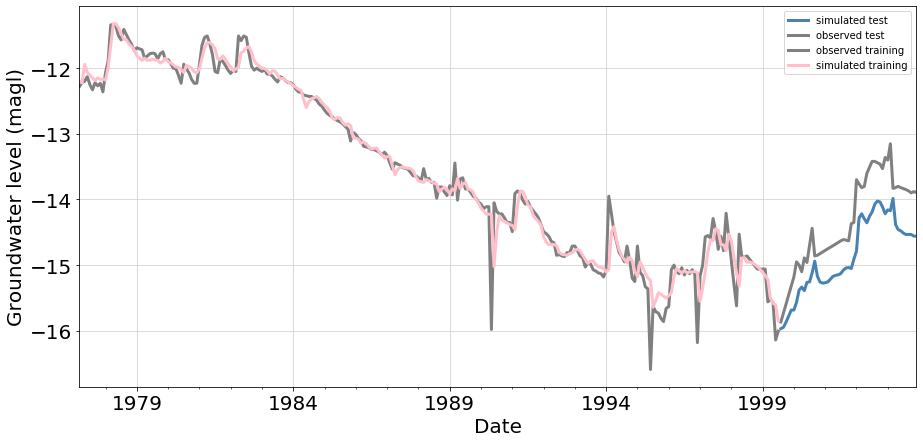

In [75]:
mse_ff = summary['mse_ff'].mean(axis=0)
rmse_ff= summary['rmse_ff'].mean(axis=0)
mae_ff = summary['mae_ff'].mean(axis=0)
r2_ff  = summary['r2_ff'].mean(axis=0)
stdv_ff= stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_ff, 3))
print("Mean squared error is:",round(mse_ff,3))
print("Root mean squared error is:",round(rmse_ff, 3))
print("Mean absolute error is:",round(mae_ff,3))
print(round(stdv_lstm,3))


df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[269:322].index)
df1['observed test']      = pima.iloc[269:322, 0].values

df2 = pd.DataFrame(pima.iloc[0:269, 0].values, columns = ['observed training'],index =pima.iloc[0:269].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=3)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=3)
out_df['observed training'].plot(color='grey', linewidth=3)
out_df['simulated training'].plot(color='pink', linewidth=3)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(15,7)

In [76]:
y_ff = out_df['simulated test']

## Static Models

In [77]:
pima2  = pima[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2','D4N0141']]

In [78]:
X = pima2[['Discharge_log' ,'precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']].values
y = pima2['D4N0141'].values
y = y.reshape(-1,1)

In [79]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 5)
for train_index, test_index in tss.split(X):
    X_train, X_test = X[train_index, :], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(269, 6) (269, 1)
(53, 6) (53, 1)


In [80]:
def forecast(model, test_forecast, gwl, steps_ahead):
    y_pred = []
    current_output = gwl
    for step in range(steps_ahead):
        #print(test_forecast[step])
        input_test = np.concatenate([test_forecast[step][:-1], [current_output]])
        #input_test = [test_forecast[0][0][:-1], gwl]
        #print(input_test)
        pred = model.fit(input_test.reshape(1,1,6))
        y_pred.append(pred[0][0])
        #print(pred)
        current_output = pred[0][0]
    return y_pred

### Decision Tree

In [81]:
from sklearn.metrics import *
import numpy as np
import csv  

from sklearn.tree import DecisionTreeRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_dc', 'rmse_dc', 'r2_dc','mae_dc'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    regressor = DecisionTreeRegressor(max_features='auto') #random state is so i get same results whenever i run the regressor
    regressor.fit(X_train,y_train)
    y_dc = regressor.predict(X_test)

    #metrics for test
    y_dc = y_dc
    test_pred.append(y_dc)
    mse_dc = mean_squared_error(y_test, y_dc)
    rmse_dc = np.sqrt(mse_dc)
    r2_dc = r2_score(y_test, y_dc)
    mae_dc = mean_absolute_error(y_test, y_dc)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_dc,Round), round(rmse_dc,Round), round(r2_dc,Round),round(mae_dc,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(269, 6)
Running fold 2
(269, 6)
Running fold 3
(269, 6)
Running fold 4
(269, 6)
Running fold 5
(269, 6)
Running fold 6
(269, 6)
Running fold 7
(269, 6)
Running fold 8
(269, 6)
Running fold 9
(269, 6)
Running fold 10
(269, 6)


In [82]:
summary

Iteration_No  mse_dc  rmse_dc  r2_dc  mae_dc
0   Iteration_1   0.734    0.857 -0.541   0.642
1   Iteration_2   0.727    0.852 -0.526   0.640
2   Iteration_3   0.713    0.844 -0.496   0.632
3   Iteration_4   0.714    0.845 -0.499   0.628
4   Iteration_5   0.725    0.852 -0.522   0.633
5   Iteration_6   0.719    0.848 -0.509   0.640
6   Iteration_7   0.719    0.848 -0.510   0.634
7   Iteration_8   0.713    0.845 -0.498   0.632
8   Iteration_9   0.720    0.849 -0.512   0.637
9  Iteration_10   0.735    0.858 -0.544   0.643

In [83]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:269, 6].values

In [84]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[269:322, 6].values

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.0
Root mean squared error is: 0.0
Mean absolute error is: 0.0
R^2 score is:  1.0

The model performance for the test set
--------------------------------------
R^2 score is:  -0.516
Mean squared error is: 0.722
Root mean squared error is: 0.85
Mean absolute error is: 0.636


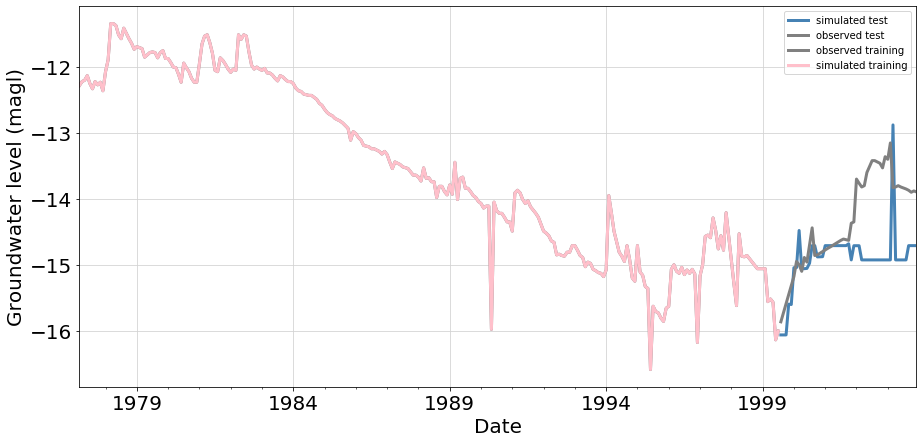

In [85]:
mse_dc = summary['mse_dc'].mean(axis=0)
rmse_dc = summary['rmse_dc'].mean(axis=0)
mae_dc = summary['mae_dc'].mean(axis=0)
r2_dc  = summary['r2_dc'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_dc, 3))
print("Mean squared error is:",round(mse_dc,3))
print("Root mean squared error is:",round(rmse_dc, 3))
print("Mean absolute error is:",round(mae_dc,3))




df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[269:322].index)
df1['observed test']      = pima.iloc[269:322, 0].values

df2 = pd.DataFrame(pima.iloc[0:269, 0].values, columns = ['observed training'],index =pima.iloc[0:269].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=3)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=3)
out_df['observed training'].plot(color='grey', linewidth=3)
out_df['simulated training'].plot(color='pink', linewidth=3)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(15,7)

### SVR

In [86]:
from sklearn.svm import SVR

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_svr', 'rmse_svr', 'r2_svr','mae_svr'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)
    
    regressor = SVR(kernel='rbf', epsilon=0.1, C=1, degree=4 ,gamma='auto') 
    regressor.fit(X_train,y_train)
    y_svr = regressor.predict(X_test)

    #metrics for test
    y_svr = y_svr
    test_pred.append(y_svr)
    mse_svr = mean_squared_error(y_test, y_svr)
    rmse_svr = np.sqrt(mse_svr)
    r2_svr = r2_score(y_test, y_svr)
    mae_svr = mean_absolute_error(y_test, y_svr)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_svr,Round), round(rmse_svr,Round), round(r2_svr,Round),round(mae_svr,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(269, 6)
Running fold 2
(269, 6)
Running fold 3
(269, 6)
Running fold 4
(269, 6)
Running fold 5
(269, 6)
Running fold 6
(269, 6)
Running fold 7
(269, 6)
Running fold 8
(269, 6)
Running fold 9
(269, 6)
Running fold 10
(269, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

In [87]:
summary

Iteration_No  mse_svr  rmse_svr  r2_svr  mae_svr
0   Iteration_1     0.05     0.223   0.895    0.175
1   Iteration_2     0.05     0.223   0.895    0.175
2   Iteration_3     0.05     0.223   0.895    0.175
3   Iteration_4     0.05     0.223   0.895    0.175
4   Iteration_5     0.05     0.223   0.895    0.175
5   Iteration_6     0.05     0.223   0.895    0.175
6   Iteration_7     0.05     0.223   0.895    0.175
7   Iteration_8     0.05     0.223   0.895    0.175
8   Iteration_9     0.05     0.223   0.895    0.175
9  Iteration_10     0.05     0.223   0.895    0.175

In [88]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:269, 6].values

In [89]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.055
Root mean squared error is: 0.234
Mean absolute error is: 0.124
R^2 score is:  0.969

The model performance for the test set
--------------------------------------
R^2 score is:  0.895
Mean squared error is: 0.05
Root mean squared error is: 0.223
Mean absolute error is: 0.175


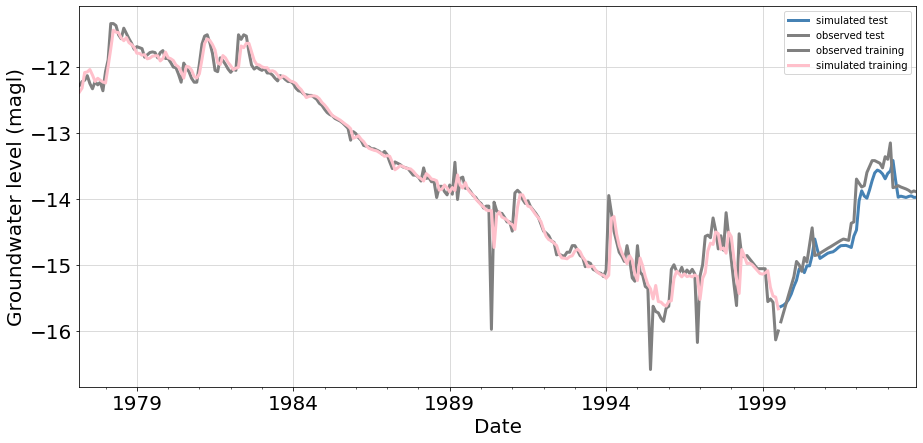

In [90]:
mse_svr  = summary['mse_svr'].mean(axis=0)
rmse_svr = summary['rmse_svr'].mean(axis=0)
mae_svr  = summary['mae_svr'].mean(axis=0)
r2_svr   = summary['r2_svr'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_svr, 3))
print("Mean squared error is:",round(mse_svr,3))
print("Root mean squared error is:",round(rmse_svr, 3))
print("Mean absolute error is:",round(mae_svr,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[269:322].index)
df1['observed test']      = pima.iloc[269:322, 0].values

df2 = pd.DataFrame(pima.iloc[0:269, 0].values, columns = ['observed training'],index =pima.iloc[0:269].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=3)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=3)
out_df['observed training'].plot(color='grey', linewidth=3)
out_df['simulated training'].plot(color='pink', linewidth=3)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(15,7)

### GradientBoostingRegressor

In [91]:
from sklearn.ensemble import GradientBoostingRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_gb', 'rmse_gb', 'r2_gb','mae_gb'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    regressor = GradientBoostingRegressor()
    regressor.fit(X_train,y_train)
    y_gb = regressor.predict(X_test)

    #metrics for test
    y_gb = y_gb
    test_pred.append(y_gb)
    mse_gb = mean_squared_error(y_test, y_gb)
    rmse_gb = np.sqrt(mse_gb)
    r2_gb = r2_score(y_test, y_gb)
    mae_gb = mean_absolute_error(y_test, y_gb)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_gb,Round), round(rmse_gb,Round), round(r2_gb,Round),round(mae_gb,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(269, 6)
Running fold 2
(269, 6)
Running fold 3
(269, 6)
Running fold 4
(269, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

Running fold 5
(269, 6)
Running fold 6
(269, 6)
Running fold 7
(269, 6)
Running fold 8
(269, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

Running fold 9
(269, 6)
Running fold 10
(269, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [92]:
summary

Iteration_No  mse_gb  rmse_gb  r2_gb  mae_gb
0   Iteration_1   0.138    0.372  0.710   0.306
1   Iteration_2   0.141    0.375  0.704   0.310
2   Iteration_3   0.141    0.375  0.704   0.312
3   Iteration_4   0.144    0.379  0.698   0.314
4   Iteration_5   0.145    0.380  0.696   0.314
5   Iteration_6   0.140    0.375  0.705   0.310
6   Iteration_7   0.138    0.372  0.709   0.306
7   Iteration_8   0.134    0.366  0.718   0.304
8   Iteration_9   0.140    0.374  0.706   0.309
9  Iteration_10   0.144    0.379  0.698   0.312

In [93]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:269, 6].values

In [94]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.008
Root mean squared error is: 0.089
Mean absolute error is: 0.059
R^2 score is:  0.996

The model performance for the test set
--------------------------------------
R^2 score is:  0.705
Mean squared error is: 0.141
Root mean squared error is: 0.375
Mean absolute error is: 0.31


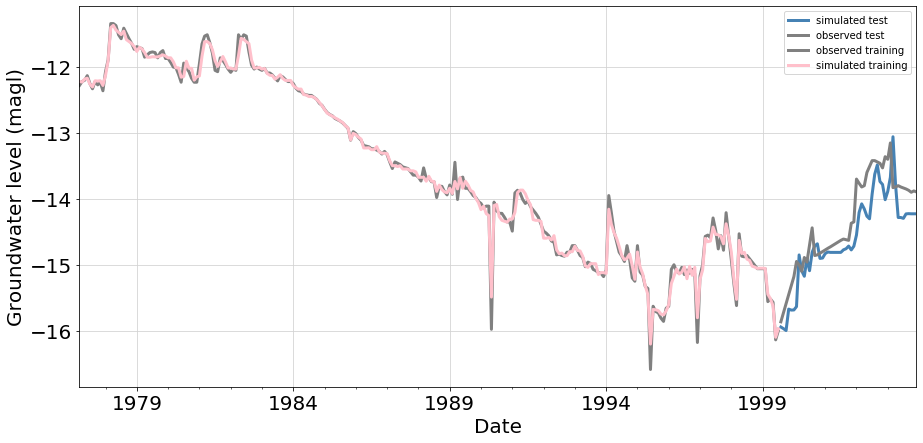

In [95]:
mse_gb  = summary['mse_gb'].mean(axis=0)
rmse_gb = summary['rmse_gb'].mean(axis=0)
mae_gb  = summary['mae_gb'].mean(axis=0)
r2_gb   = summary['r2_gb'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_gb, 3))
print("Mean squared error is:",round(mse_gb,3))
print("Root mean squared error is:",round(rmse_gb, 3))
print("Mean absolute error is:",round(mae_gb,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[269:322].index)
df1['observed test']      = pima.iloc[269:322, 0].values

df2 = pd.DataFrame(pima.iloc[0:269, 0].values, columns = ['observed training'],index =pima.iloc[0:269].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=3)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=3)
out_df['observed training'].plot(color='grey', linewidth=3)
out_df['simulated training'].plot(color='pink', linewidth=3)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(15,7)

### Randon Forest

In [96]:
from sklearn.ensemble import RandomForestRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_rf', 'rmse_rf', 'r2_rf','mae_rf'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)



    rf = RandomForestRegressor(n_estimators=10)
    rf.fit(X_train, y_train)
    y_rf = rf.predict(X_test)

    #metrics for test
    y_rf= y_rf
    test_pred.append(y_rf)
    mse_rf= mean_squared_error(y_test, y_rf)
    rmse_rf= np.sqrt(mse_rf)
    r2_rf= r2_score(y_test, y_rf)
    mae_rf= mean_absolute_error(y_test, y_rf)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_rf,Round), round(rmse_rf,Round), round(r2_rf,Round),round(mae_rf,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(269, 6)
Running fold 2
(269, 6)
Running fold 3
(269, 6)
Running fold 4
(269, 6)
Running fold 5
(269, 6)
Running fold 6
(269, 6)
Running fold 7
(269, 6)
Running fold 8
(269, 6)
Running fold 9
(269, 6)
Running fold 10
(269, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-

In [97]:
summary

Iteration_No  mse_rf  rmse_rf  r2_rf  mae_rf
0   Iteration_1   0.155    0.393  0.675   0.317
1   Iteration_2   0.146    0.383  0.693   0.316
2   Iteration_3   0.175    0.418  0.633   0.333
3   Iteration_4   0.095    0.308  0.801   0.246
4   Iteration_5   0.100    0.315  0.791   0.253
5   Iteration_6   0.257    0.507  0.460   0.397
6   Iteration_7   0.146    0.382  0.693   0.337
7   Iteration_8   0.128    0.358  0.731   0.291
8   Iteration_9   0.181    0.426  0.620   0.357
9  Iteration_10   0.105    0.325  0.779   0.260

In [98]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:269, 6].values

In [99]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.008
Root mean squared error is: 0.089
Mean absolute error is: 0.059
R^2 score is:  0.996

The model performance for the test set
--------------------------------------
R^2 score is:  0.688
Mean squared error is: 0.149
Root mean squared error is: 0.382
Mean absolute error is: 0.311


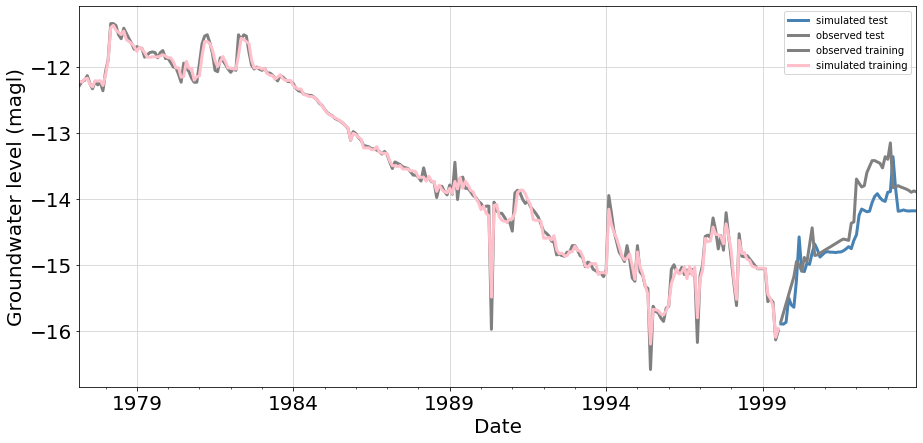

In [100]:
mse_rf  = summary['mse_rf'].mean(axis=0)
rmse_rf = summary['rmse_rf'].mean(axis=0)
mae_rf  = summary['mae_rf'].mean(axis=0)
r2_rf   = summary['r2_rf'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_rf, 3))
print("Mean squared error is:",round(mse_rf,3))
print("Root mean squared error is:",round(rmse_rf, 3))
print("Mean absolute error is:",round(mae_rf,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[269:322].index)
df1['observed test']      = pima.iloc[269:322, 0].values

df2 = pd.DataFrame(pima.iloc[0:269, 0].values, columns = ['observed training'],index =pima.iloc[0:269].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=3)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=3)
out_df['observed training'].plot(color='grey', linewidth=3)
out_df['simulated training'].plot(color='pink', linewidth=3)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(15,7)

In [101]:
vs = pd.DataFrame(pima.iloc[269:322, 0].values, columns = ['Observed'],index =pima.iloc[269:322].index)
vs['FFNN'] = y_svr
vs['GB'] = y_gb
vs['RF'] = y_rf
vs['DC'] = y_dc
vs['LSTM'] = y_lstm
vs['GRU'] = y_gru

Text(0, 0.5, 'Groundwater levels (magl)')

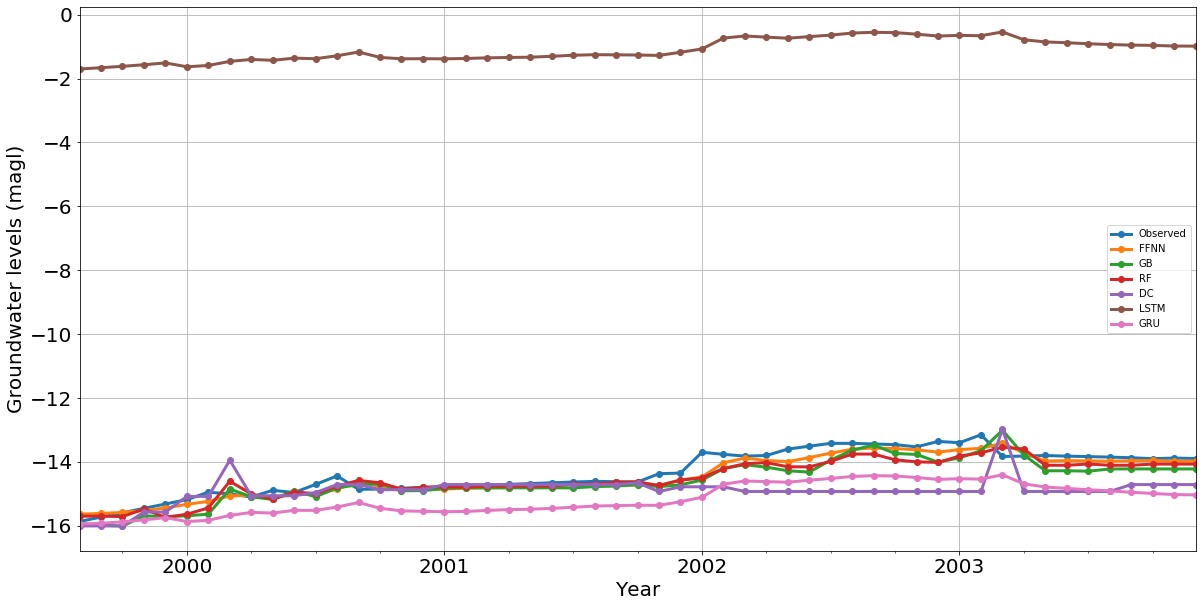

In [102]:
vs.plot(figsize=(20,10), linewidth=3, fontsize = 20, grid=True, marker='o')
plt.xlabel("Year",fontsize=20)
plt.ylabel("Groundwater levels (magl)",fontsize=20)